# Funds exploratory

We are going to perform an EDA on several mutual funds.

## Import libraries

In [2]:
library('reticulate')
library(jsonlite)
source('../src/R/rfunds.R')

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



## Load data

In [2]:
# https://app.myinvestor.es/myinvestor-server/rest/public/fondos/find-fondos?tipo=FONDOS_INDEXADOS&token=a2e8e18ad26a079c576038f0ad4fa18ce0d9e415f5bf6f43f89cf3831a0e4685__
txt<-'[{"idFondo":2730,"codigoIsin":"IE00BFRTD722","nombre":"Vanguard Euro Government Bond Index Fund GBP Hedged Acc","categoria":"Europe Fixed Income","orden":1,"urlKiid":"https://api.fundinfo.com/document/83a0f992876d9c26f81e147421821869_79959/KID_ES_es_IE00BFRTD722_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BFRTD722_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572449&institucion=1854326","ytd":-2.66,"yearUno":-1.89,"yearTres":3.92,"yearCinco":2.06,"volatilidad":7.44,"volatilidadYearUno":7.44,"volatilidadYearTres":8.72,"volatilidadYearCinco":8.72,"activosAcciones":0,"activosObligaciones":99.96,"activosEfectivo":0,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.62,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3606,"codigoIsin":"ES0165265002","nombre":"MyInvestor Nasdaq 100","categoria":"Technology Sector Equity","orden":1,"urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/ES0165265002_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/ES0165265002_inf_semestral_es.pdf","ytd":5.52,"activosAcciones":97.94,"activosObligaciones":58.41,"activosEfectivo":-57.44,"activosOtro":1.09,"impMinPrimeraSubs":"1 EUR","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Tecnología","descripcion":"Replica el índice tecnológico americano, con las menores comisiones de España*.","rentabilidadInicio":1.55,"descatalogado":false,"mercado":"FES","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.59,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0.08"},{"nombre":"Gestión","porcentaje":"0.3"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":18.93,"img":null},{"nombre":"Salud","porcent":6.77,"img":null},{"nombre":"Servicios Públicos","porcent":0.85,"img":null},{"nombre":"Tecnología","porcent":44.38,"img":null},{"nombre":"Servicios Financieros","porcent":2.15,"img":null},{"nombre":"Consumo Defensivo","porcent":4.56,"img":null},{"nombre":"Industria","porcent":3.51,"img":null},{"nombre":"Consumo Cíclico","porcent":16.79,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"MyInvestor","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"0","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":7,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":585,"codigoIsin":"ES0110182039","nombre":"BBVA BOLSA ÍNDICE FI","categoria":"Europe Equity Large Cap","orden":1,"urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/ES0110182039_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/ES0110182039_inf_semestral_es.pdf","ytd":11.91,"yearUno":33.43,"yearTres":2.35,"yearCinco":1.93,"volatilidad":27.08,"volatilidadYearUno":27.08,"volatilidadYearTres":23.14,"volatilidadYearCinco":23.14,"activosAcciones":100.01,"activosObligaciones":0,"activosEfectivo":-0.01,"activosOtro":0,"impMinPrimeraSubs":"600 EUR","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":1.1,"rentabilidadInicio":5.68,"descatalogado":false,"mercado":"FES","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":1.22,"trackingErrorYearUno":0.15,"tipoActivo":"Renta Variable","zonaGeografica":"España","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0.1"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"1.1"},{"nombre":"Gestión por resultado","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":11.97,"img":null},{"nombre":"Salud","porcent":2.43,"img":null},{"nombre":"Servicios Financieros","porcent":24.57,"img":null},{"nombre":"Servicios de Comunicación","porcent":12.51,"img":null},{"nombre":"Tecnología","porcent":4.95,"img":null},{"nombre":"Servicios Públicos","porcent":19.9,"img":null},{"nombre":"Industria","porcent":13.71,"img":null},{"nombre":"Materiales Básicos","porcent":1.87,"img":null},{"nombre":"Inmobiliaria","porcent":1.5,"img":null},{"nombre":"Energía","porcent":2.94,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"BBVA","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"0","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":7,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":547,"codigoIsin":"IE00BD0NCN62","nombre":"iShares Developed World Index (IE) D Acc USD","categoria":"Global Equity Large Cap","orden":1,"urlKiid":"https://api.fundinfo.com/document/55260b50cb1f1801e36c56ff1db44b07_164213/KID_ES_es_IE00BD0NCN62_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00BD0NCN62_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720010&institucion=1854326","ytd":18.72,"yearUno":32.01,"yearTres":17.29,"volatilidad":14.84,"volatilidadYearUno":14.84,"volatilidadYearTres":18.65,"volatilidadYearCinco":18.65,"activosAcciones":100.17,"activosObligaciones":0.01,"activosEfectivo":-0.21,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":10,"rentabilidadInicio":13.11,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.12,"trackingErrorYearUno":1.74,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":9.72,"img":null},{"nombre":"Inmobiliaria","porcent":2.82,"img":null},{"nombre":"Servicios Públicos","porcent":2.74,"img":null},{"nombre":"Salud","porcent":12.88,"img":null},{"nombre":"Servicios Financieros","porcent":14.97,"img":null},{"nombre":"Consumo Defensivo","porcent":7.15,"img":null},{"nombre":"Materiales Básicos","porcent":4.07,"img":null},{"nombre":"Industria","porcent":10.24,"img":null},{"nombre":"Consumo Cíclico","porcent":11.28,"img":null},{"nombre":"Energía","porcent":2.86,"img":null},{"nombre":"Tecnología","porcent":21.2,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":605,"codigoIsin":"ES0149051007","nombre":"IMANTIA IBEX 35 FI","categoria":"Europe Equity Large Cap","orden":1,"urlKiid":"https://api.fundinfo.com/document/3719b99d64dd608eeeb2e4cf80e77b33_187136/KID_ES_es_ES0149051007_YES_2021-05-26.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f89d229cfc545130717a3c703c19b320_503725/SAR_ES_es_ES0149051007_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","ytd":11.97,"yearUno":32.35,"yearTres":3.77,"yearCinco":2.25,"volatilidad":27.2,"volatilidadYearUno":27.2,"volatilidadYearTres":23.22,"volatilidadYearCinco":23.22,"activosAcciones":99.93,"activosObligaciones":0,"activosEfectivo":0.07,"activosOtro":0,"impMinPrimeraSubs":"10 EUR","impMinSubsSucesivas":"10 EUR","categoriaMyInvestor":"Países","porcentajeComision":0.46,"rentabilidadInicio":3.68,"descatalogado":false,"mercado":"FES","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.46,"trackingErrorYearUno":0.24,"tipoActivo":"Renta Variable","zonaGeografica":"España","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.35"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Depósito","porcentaje":"0.05"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":3.02,"img":null},{"nombre":"Tecnología","porcent":4.77,"img":null},{"nombre":"Salud","porcent":2.15,"img":null},{"nombre":"Servicios Públicos","porcent":15.25,"img":null},{"nombre":"Materiales Básicos","porcent":1.54,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.32,"img":null},{"nombre":"Industria","porcent":12.56,"img":null},{"nombre":"Consumo Cíclico","porcent":11.44,"img":null},{"nombre":"Servicios Financieros","porcent":22.08,"img":null},{"nombre":"Inmobiliaria","porcent":1.2,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Imantia","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"0","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":6,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2752,"codigoIsin":"IE00BDFB7639","nombre":"Vanguard Global Short-Term Corporate Bond Index Fund GBP Hedged Acc","categoria":"Global Fixed Income","orden":1,"urlKiid":"https://api.fundinfo.com/document/730cf0eafeafb9a8f50fcbf6369c46ee_77879/KID_ES_es_IE00BDFB7639_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BDFB7639_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=622578&institucion=1854326","ytd":-0.16,"yearUno":0.59,"yearTres":2.51,"volatilidad":0.85,"volatilidadYearUno":0.85,"volatilidadYearTres":3.15,"volatilidadYearCinco":3.15,"activosAcciones":0,"activosObligaciones":92.83,"activosEfectivo":0.04,"activosOtro":7.13,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":1.82,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.18,"trackingErrorYearUno":3.04,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.18"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2728,"codigoIsin":"IE00B76VTM04","nombre":"Vanguard ESG Developed World All Cap Equity Index Fund GBP Dist","categoria":"Global Equity Large Cap","orden":1,"urlKiid":"https://api.fundinfo.com/document/099c3126adadcb53eff6bef71899173e_83934/KID_ES_es_IE00B76VTM04_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B76VTM04_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572436&institucion=1854326","ytd":17.03,"yearUno":24.17,"yearTres":15.9,"yearCinco":12.26,"volatilidad":14.6,"volatilidadYearUno":14.6,"volatilidadYearTres":18.48,"volatilidadYearCinco":18.48,"activosAcciones":99.96,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.2,"rentabilidadInicio":13.42,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.2,"trackingErrorYearUno":1.51,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.2"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":8.05,"img":null},{"nombre":"Inmobiliaria","porcent":4.24,"img":null},{"nombre":"Servicios Públicos","porcent":1.11,"img":null},{"nombre":"Salud","porcent":13.97,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.38,"img":null},{"nombre":"Consumo Defensivo","porcent":6.11,"img":null},{"nombre":"Materiales Básicos","porcent":3.56,"img":null},{"nombre":"Energía","porcent":0.05,"img":null},{"nombre":"Tecnología","porcent":23.87,"img":null},{"nombre":"Consumo Cíclico","porcent":12.36,"img":null},{"nombre":"Servicios Financieros","porcent":16.22,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":true},{"idFondo":2726,"codigoIsin":"IE00B51KVT96","nombre":"Vanguard Emerging Markets Stock Index Fund GBP Dist","categoria":"Global Emerging Markets Equity","orden":1,"urlKiid":"https://api.fundinfo.com/document/9198d468c33c0976e80632e91deca27a_80636/KID_ES_es_IE00B51KVT96_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B51KVT96_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=564194&institucion=1854326","ytd":1.21,"yearUno":9.65,"yearTres":10.53,"yearCinco":6.62,"volatilidad":15.32,"volatilidadYearUno":15.32,"volatilidadYearTres":19.36,"volatilidadYearCinco":19.36,"activosAcciones":99.95,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.23,"rentabilidadInicio":8.27,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.23,"trackingErrorYearUno":0.73,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.23"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":10.85,"img":null},{"nombre":"Consumo Cíclico","porcent":14.21,"img":null},{"nombre":"Salud","porcent":5.1,"img":null},{"nombre":"Servicios Financieros","porcent":19.44,"img":null},{"nombre":"Energía","porcent":5.96,"img":null},{"nombre":"Consumo Defensivo","porcent":5.69,"img":null},{"nombre":"Materiales Básicos","porcent":8.52,"img":null},{"nombre":"Industria","porcent":4.75,"img":null},{"nombre":"Tecnología","porcent":21.06,"img":null},{"nombre":"Servicios Públicos","porcent":2.21,"img":null},{"nombre":"Inmobiliaria","porcent":2.05,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":false},{"idFondo":2725,"codigoIsin":"IE0031787223","nombre":"Vanguard Emerging Markets Stock Index Fund USD Acc","categoria":"Global Emerging Markets Equity","orden":1,"urlKiid":"https://api.fundinfo.com/document/f0249b7cabedb168378de6ec2e4330e2_79319/KID_ES_es_IE0031787223_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0031787223_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572381&institucion=1854326","ytd":1.95,"yearUno":15.76,"yearTres":13.21,"yearCinco":9.35,"volatilidad":15.32,"volatilidadYearUno":15.32,"volatilidadYearTres":19.36,"volatilidadYearCinco":19.36,"activosAcciones":99.95,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.23,"rentabilidadInicio":5.73,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.23,"trackingErrorYearUno":0.73,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.23"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":10.85,"img":null},{"nombre":"Servicios Financieros","porcent":19.44,"img":null},{"nombre":"Salud","porcent":5.1,"img":null},{"nombre":"Servicios Públicos","porcent":2.21,"img":null},{"nombre":"Industria","porcent":4.75,"img":null},{"nombre":"Consumo Cíclico","porcent":14.21,"img":null},{"nombre":"Tecnología","porcent":21.06,"img":null},{"nombre":"Materiales Básicos","porcent":8.52,"img":null},{"nombre":"Consumo Defensivo","porcent":5.69,"img":null},{"nombre":"Inmobiliaria","porcent":2.05,"img":null},{"nombre":"Energía","porcent":5.96,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2736,"codigoIsin":"IE0008248803","nombre":"Vanguard Eurozone Stock Index Fund EUR Acc","categoria":"Europe Equity Large Cap","orden":1,"urlKiid":"https://api.fundinfo.com/document/3402721961a414ea008ad764b141f3c1_80873/KID_ES_es_IE0008248803_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0008248803_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=463648&institucion=1854326","ytd":19.8,"yearUno":33.46,"yearTres":12.36,"yearCinco":9.42,"volatilidad":19.5,"volatilidadYearUno":19.5,"volatilidadYearTres":19.48,"volatilidadYearCinco":19.48,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":4.76,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.18,"tipoActivo":"Renta Variable","zonaGeografica":"Eurozona","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":8.61,"img":null},{"nombre":"Energía","porcent":3.93,"img":null},{"nombre":"Consumo Cíclico","porcent":15.58,"img":null},{"nombre":"Consumo Defensivo","porcent":7.35,"img":null},{"nombre":"Materiales Básicos","porcent":6.73,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.29,"img":null},{"nombre":"Servicios Financieros","porcent":14.79,"img":null},{"nombre":"Servicios Públicos","porcent":5.58,"img":null},{"nombre":"Tecnología","porcent":14.18,"img":null},{"nombre":"Industria","porcent":14.57,"img":null},{"nombre":"Inmobiliaria","porcent":1.71,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2735,"codigoIsin":"IE0007987708","nombre":"Vanguard European Equity Index Fund","categoria":"Europe Equity Large Cap","orden":1,"urlKiid":"https://api.fundinfo.com/document/ef8306925f531625b3a765f2a60d159b_80617/KID_ES_es_IE0007987708_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007987708_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459323&institucion=1854326","ytd":21.11,"yearUno":33.53,"yearTres":12.2,"yearCinco":9.15,"volatilidad":16.39,"volatilidadYearUno":16.39,"volatilidadYearTres":16.99,"volatilidadYearCinco":16.99,"activosAcciones":99.85,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.15,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.11,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.15,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":14.15,"img":null},{"nombre":"Consumo Defensivo","porcent":12.66,"img":null},{"nombre":"Consumo Cíclico","porcent":10.56,"img":null},{"nombre":"Tecnología","porcent":8.34,"img":null},{"nombre":"Servicios Públicos","porcent":3.89,"img":null},{"nombre":"Materiales Básicos","porcent":7.74,"img":null},{"nombre":"Servicios Financieros","porcent":15.87,"img":null},{"nombre":"Inmobiliaria","porcent":1.31,"img":null},{"nombre":"Energía","porcent":4.89,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.41,"img":null},{"nombre":"Salud","porcent":14.93,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":546,"codigoIsin":"IE00BD0NCM55","nombre":"iShares Developed World Index (IE) D Acc EUR","categoria":"Global Equity Large Cap","orden":2,"urlKiid":"https://api.fundinfo.com/document/7d999ce091fd211685b7c614e308c813_162772/KID_ES_es_IE00BD0NCM55_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00BD0NCM55_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720009&institucion=1854326","ytd":25.39,"yearUno":34.06,"yearTres":16.73,"volatilidad":14.67,"volatilidadYearUno":14.67,"volatilidadYearTres":18.71,"volatilidadYearCinco":18.71,"activosAcciones":100.17,"activosObligaciones":0.01,"activosEfectivo":-0.21,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.1,"rentabilidadInicio":11.49,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":2.05,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":4.07,"img":null},{"nombre":"Consumo Defensivo","porcent":7.15,"img":null},{"nombre":"Energía","porcent":2.86,"img":null},{"nombre":"Servicios Financieros","porcent":14.97,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.72,"img":null},{"nombre":"Salud","porcent":12.88,"img":null},{"nombre":"Inmobiliaria","porcent":2.82,"img":null},{"nombre":"Consumo Cíclico","porcent":11.28,"img":null},{"nombre":"Industria","porcent":10.24,"img":null},{"nombre":"Tecnología","porcent":21.2,"img":null},{"nombre":"Servicios Públicos","porcent":2.74,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3607,"codigoIsin":"ES0165242001","nombre":"MyInvestor S&P500 Equiponderado","categoria":"US Equity Large Cap Blend","orden":2,"urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/ES0165242001_kiid_es.pdf","urlInformeSemestral":"https://myinvestor.es/data/pdf/fondos/Folleto_MyInvestor_SP500_equiponderado.pdf","ytd":7.86,"activosAcciones":94.68,"activosObligaciones":0,"activosEfectivo":1.43,"activosOtro":3.89,"impMinPrimeraSubs":"1 EUR","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","descripcion":"Dota a cada valor del índice americano del mismo peso para evitar concentraciones.","rentabilidadInicio":3.84,"descatalogado":false,"mercado":"FES","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.59,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.3"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0.08"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Financieros","porcent":9.85,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.3,"img":null},{"nombre":"Industria","porcent":12.91,"img":null},{"nombre":"Inmobiliaria","porcent":8.53,"img":null},{"nombre":"Consumo Cíclico","porcent":9.62,"img":null},{"nombre":"Tecnología","porcent":12.49,"img":null},{"nombre":"Servicios Públicos","porcent":7.34,"img":null},{"nombre":"Salud","porcent":13.33,"img":null},{"nombre":"Energía","porcent":3.04,"img":null},{"nombre":"Consumo Defensivo","porcent":8.02,"img":null},{"nombre":"Materiales Básicos","porcent":4.24,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"MyInvestor","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"0","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":7,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3605,"codigoIsin":"ES0184894006","nombre":"MyInvestor Ponderado Economía Mundial","categoria":"Global Equity Large Cap","orden":3,"urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/ES0184894006_kiid_es.pdf","urlInformeSemestral":"https://myinvestor.es/data/pdf/fondos/Folleto_MyInvestor_Ponderado_Economia_Mundial.pdf","ytd":2.7,"activosAcciones":99.8,"activosObligaciones":2.42,"activosEfectivo":-2.29,"activosOtro":0.06,"impMinPrimeraSubs":"1 EUR","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","descripcion":"Otorga a cada país el peso de su PIB para reflejar fielmente la distribución real de la economía global.","rentabilidadInicio":-0.75,"descatalogado":false,"mercado":"FES","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.59,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0.08"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.3"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":9.28,"img":null},{"nombre":"Consumo Defensivo","porcent":7.54,"img":null},{"nombre":"Salud","porcent":9.16,"img":null},{"nombre":"Tecnología","porcent":14.1,"img":null},{"nombre":"Energía","porcent":6.23,"img":null},{"nombre":"Servicios Públicos","porcent":3.41,"img":null},{"nombre":"Consumo Cíclico","porcent":13.23,"img":null},{"nombre":"Inmobiliaria","porcent":2.07,"img":null},{"nombre":"Servicios Financieros","porcent":17.95,"img":null},{"nombre":"Materiales Básicos","porcent":7.21,"img":null},{"nombre":"Industria","porcent":9.37,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"MyInvestor","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"0","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":7,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":451,"codigoIsin":"IE0002639668","nombre":"Vanguard US 500 Stock Index Inv USD Acc","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/2a7df8019e8e711ec8af075cad1f5979_80926/KID_ES_es_IE0002639668_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0002639668_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=499535&institucion=1854326","ytd":22.5,"yearUno":33.05,"yearTres":20.43,"yearCinco":17.66,"volatilidad":13.91,"volatilidadYearUno":13.91,"volatilidadYearTres":18.82,"volatilidadYearCinco":18.82,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.1,"rentabilidadInicio":7.21,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.1,"trackingErrorYearUno":1.27,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":2.58,"img":null},{"nombre":"Industria","porcent":8.38,"img":null},{"nombre":"Servicios Financieros","porcent":14.11,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.29,"img":null},{"nombre":"Tecnología","porcent":24.63,"img":null},{"nombre":"Materiales Básicos","porcent":2.15,"img":null},{"nombre":"Consumo Cíclico","porcent":12.1,"img":null},{"nombre":"Salud","porcent":13.35,"img":null},{"nombre":"Consumo Defensivo","porcent":6.21,"img":null},{"nombre":"Energía","porcent":2.75,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":454,"codigoIsin":"IE0007281425","nombre":"Vanguard Japan Stock Index Inv EUR Acc","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/8937a28cdd1751d983a7bb9e392a4837_80309/KID_ES_es_IE0007281425_YES_2021-06-03.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007281425_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459343&institucion=1854326","ytd":7.67,"yearUno":19,"yearTres":9.52,"yearCinco":6.81,"volatilidad":14.23,"volatilidadYearUno":14.23,"volatilidadYearTres":17.1,"volatilidadYearCinco":17.1,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.16,"rentabilidadInicio":7.2,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.16,"trackingErrorYearUno":1.53,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":15.68,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Servicios Financieros","porcent":9.25,"img":null},{"nombre":"Consumo Defensivo","porcent":6.52,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.56,"img":null},{"nombre":"Servicios Públicos","porcent":0.96,"img":null},{"nombre":"Materiales Básicos","porcent":5.09,"img":null},{"nombre":"Salud","porcent":10.61,"img":null},{"nombre":"Industria","porcent":21.46,"img":null},{"nombre":"Tecnología","porcent":17.9,"img":null},{"nombre":"Energía","porcent":1.47,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":455,"codigoIsin":"IE0007292083","nombre":"Vanguard Japan Stock Index Inv USD Acc","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/ceab66c717bb587d4ba147573212db89_81283/KID_ES_es_IE0007292083_YES_2021-07-27.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007292083_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=535967&institucion=1854326","ytd":2.19,"yearUno":16.77,"yearTres":10.26,"yearCinco":8.25,"volatilidad":14.23,"volatilidadYearUno":14.23,"volatilidadYearTres":17.1,"volatilidadYearCinco":17.1,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.16,"rentabilidadInicio":5.25,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.16,"trackingErrorYearUno":1.53,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":5.09,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.56,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Consumo Defensivo","porcent":6.52,"img":null},{"nombre":"Salud","porcent":10.61,"img":null},{"nombre":"Industria","porcent":21.46,"img":null},{"nombre":"Energía","porcent":1.47,"img":null},{"nombre":"Consumo Cíclico","porcent":15.68,"img":null},{"nombre":"Servicios Financieros","porcent":9.25,"img":null},{"nombre":"Tecnología","porcent":17.9,"img":null},{"nombre":"Servicios Públicos","porcent":0.96,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":456,"codigoIsin":"IE0007471695","nombre":"Vanguard US Government Bond Idx Inv USD Acc","categoria":"US Fixed Income","urlKiid":"https://api.fundinfo.com/document/6483d27da3888dda0506a9ade5f5edb5_77407/KID_ES_es_IE0007471695_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007471695_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=535966&institucion=1854326","ytd":-3.01,"yearUno":-2.9,"yearTres":4.6,"yearCinco":2.08,"volatilidad":3.39,"volatilidadYearUno":3.39,"volatilidadYearTres":4.42,"volatilidadYearCinco":4.42,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.69,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.12,"trackingErrorYearUno":0.12,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":457,"codigoIsin":"IE0007472115","nombre":"Vanguard Euro Government Bond Index Inv EUR Acc","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/6cd61cb9decee4a898fd30d4ef1740cf_77915/KID_ES_es_IE0007472115_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007472115_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459347&institucion=1854326","ytd":-3.16,"yearUno":-2.49,"yearTres":2.99,"yearCinco":1.21,"volatilidad":3.36,"volatilidadYearUno":3.36,"volatilidadYearTres":4.01,"volatilidadYearCinco":4.01,"activosAcciones":0,"activosObligaciones":99.96,"activosEfectivo":0,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":4.1,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.02,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":458,"codigoIsin":"IE0007987690","nombre":"Vanguard European Stock Index Inv EUR Acc","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/0dc53e74dbf48d9827f1f2f3c3df0cb9_80366/KID_ES_es_IE0007987690_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007987690_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459320&institucion=1854326","ytd":21.11,"yearUno":33.53,"yearTres":12.18,"yearCinco":9.12,"volatilidad":16.39,"volatilidadYearUno":16.39,"volatilidadYearTres":16.99,"volatilidadYearCinco":16.99,"activosAcciones":99.85,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.15,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":4.04,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.15,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Gestión por resultado","porcentaje":"0%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":12.66,"img":null},{"nombre":"Servicios Financieros","porcent":15.87,"img":null},{"nombre":"Industria","porcent":14.15,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.41,"img":null},{"nombre":"Consumo Cíclico","porcent":10.56,"img":null},{"nombre":"Salud","porcent":14.93,"img":null},{"nombre":"Tecnología","porcent":8.34,"img":null},{"nombre":"Servicios Públicos","porcent":3.89,"img":null},{"nombre":"Inmobiliaria","porcent":1.31,"img":null},{"nombre":"Energía","porcent":4.89,"img":null},{"nombre":"Materiales Básicos","porcent":7.74,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":459,"codigoIsin":"IE0009591805","nombre":"Vanguard Euro Investment Grade Bond Index Inv EUR Acc","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/6a6f0f2c2b6c8f914edf8912cf44d3f6_78589/KID_ES_es_IE0009591805_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0009591805_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459349&institucion=1854326","ytd":-1.68,"yearUno":-0.84,"yearTres":1.97,"yearCinco":1.08,"volatilidad":2.14,"volatilidadYearUno":2.14,"volatilidadYearTres":4.02,"volatilidadYearCinco":4.02,"activosAcciones":0,"activosObligaciones":97.1,"activosEfectivo":0,"activosOtro":2.9,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.81,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.43,"tipoActivo":"Renta Fija","subtipoActivo":"Corporate","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":461,"codigoIsin":"IE0031786142","nombre":"Vanguard Emerging Markets Stock Index Inv EUR Acc","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/49633c0e3565b607fa5e9b0347db3795_80584/KID_ES_es_IE0031786142_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0031786142_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459317&institucion=1854326","ytd":7.42,"yearUno":17.98,"yearTres":12.4,"yearCinco":7.81,"volatilidad":15.32,"volatilidadYearUno":15.32,"volatilidadYearTres":19.36,"volatilidadYearCinco":19.36,"activosAcciones":99.95,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.23,"rentabilidadInicio":6.38,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.23,"trackingErrorYearUno":0.73,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.23"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":21.06,"img":null},{"nombre":"Servicios Públicos","porcent":2.21,"img":null},{"nombre":"Consumo Cíclico","porcent":14.21,"img":null},{"nombre":"Inmobiliaria","porcent":2.05,"img":null},{"nombre":"Industria","porcent":4.75,"img":null},{"nombre":"Materiales Básicos","porcent":8.52,"img":null},{"nombre":"Servicios Financieros","porcent":19.44,"img":null},{"nombre":"Consumo Defensivo","porcent":5.69,"img":null},{"nombre":"Energía","porcent":5.96,"img":null},{"nombre":"Salud","porcent":5.1,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.85,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":464,"codigoIsin":"IE00B03HCZ61","nombre":"Vanguard Global Stock Index Inv EUR Acc","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/db6209f162da8e804ed13714db165f6d_81181/KID_ES_es_IE00B03HCZ61_YES_2021-04-01.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B03HCZ61_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459341&institucion=1854326","ytd":25.16,"yearUno":34.3,"yearTres":17.41,"yearCinco":13.51,"volatilidad":14.91,"volatilidadYearUno":14.91,"volatilidadYearTres":18.48,"volatilidadYearCinco":18.48,"activosAcciones":99.97,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":4.53,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.18,"trackingErrorYearUno":1.75,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.18"},{"nombre":"Gestión por resultado","porcentaje":"0%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":9.57,"img":null},{"nombre":"Industria","porcent":10.18,"img":null},{"nombre":"Servicios Financieros","porcent":15.33,"img":null},{"nombre":"Tecnología","porcent":20.89,"img":null},{"nombre":"Energía","porcent":3.28,"img":null},{"nombre":"Materiales Básicos","porcent":3.92,"img":null},{"nombre":"Consumo Cíclico","porcent":11.44,"img":null},{"nombre":"Consumo Defensivo","porcent":7.18,"img":null},{"nombre":"Salud","porcent":12.74,"img":null},{"nombre":"Servicios Públicos","porcent":2.66,"img":null},{"nombre":"Inmobiliaria","porcent":2.78,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":465,"codigoIsin":"IE00B03HD084","nombre":"Vanguard Global Stock Index Inv USD Acc","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/7d3616b2f12b0421f2c26b00d81ba83d_81259/KID_ES_es_IE00B03HD084_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B03HD084_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572386&institucion=1854326","ytd":18.8,"yearUno":31.77,"yearTres":18.21,"yearCinco":15.04,"volatilidad":14.91,"volatilidadYearUno":14.91,"volatilidadYearTres":18.48,"volatilidadYearCinco":18.48,"activosAcciones":99.97,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":6.39,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.18,"trackingErrorYearUno":1.75,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.18"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":12.74,"img":null},{"nombre":"Inmobiliaria","porcent":2.78,"img":null},{"nombre":"Consumo Defensivo","porcent":7.18,"img":null},{"nombre":"Materiales Básicos","porcent":3.92,"img":null},{"nombre":"Tecnología","porcent":20.89,"img":null},{"nombre":"Energía","porcent":3.28,"img":null},{"nombre":"Servicios Financieros","porcent":15.33,"img":null},{"nombre":"Servicios Públicos","porcent":2.66,"img":null},{"nombre":"Consumo Cíclico","porcent":11.44,"img":null},{"nombre":"Industria","porcent":10.18,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.57,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":466,"codigoIsin":"IE00B04GQQ17","nombre":"Vanguard Eurozone Inflation-Linked Bond Idx Inv EUR Acc","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/310b91695a705d528c79446eff7c951c_79067/KID_ES_es_IE00B04GQQ17_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B04GQQ17_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459351&institucion=1854326","ytd":7.04,"yearUno":9.31,"yearTres":6.16,"yearCinco":3.26,"volatilidad":4.25,"volatilidadYearUno":4.25,"volatilidadYearTres":5.89,"volatilidadYearCinco":5.89,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.88,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.39,"tipoActivo":"Renta Fija","subtipoActivo":"Ligados a inflación","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":467,"codigoIsin":"IE00B04GQT48","nombre":"Vanguard US Investment Grade Credit Idex Inv EUR Acc","categoria":"US Fixed Income","urlKiid":"https://api.fundinfo.com/document/03d794c60d7e140cf5f57686b1a5fff7_80126/KID_ES_es_IE00B04GQT48_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B04GQT48_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=463654&institucion=1854326","ytd":3.83,"yearUno":2.91,"yearTres":6.09,"yearCinco":2.66,"volatilidad":4.3,"volatilidadYearUno":4.3,"volatilidadYearTres":6.15,"volatilidadYearCinco":6.15,"activosAcciones":0,"activosObligaciones":97,"activosEfectivo":0.08,"activosOtro":2.92,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":7.6,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":1.11,"tipoActivo":"Renta Fija","subtipoActivo":"Corporate","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":470,"codigoIsin":"IE00B1W56J03","nombre":"iShares US Index (IE) Instl Acc USD","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/5240950ba40c6f9cfa8d26826615c4c8_172020/KID_ES_es_IE00B1W56J03_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B1W56J03_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=703248&institucion=1854326","ytd":22.57,"yearUno":32.58,"yearTres":19.93,"yearCinco":17.95,"volatilidad":13.76,"volatilidadYearUno":13.76,"volatilidadYearTres":18.96,"volatilidadYearCinco":18.96,"activosAcciones":100.01,"activosObligaciones":0.1,"activosEfectivo":-0.11,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":9.42,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.17,"trackingErrorYearUno":1.75,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":8.53,"img":null},{"nombre":"Consumo Defensivo","porcent":6.2,"img":null},{"nombre":"Servicios Públicos","porcent":2.5,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.47,"img":null},{"nombre":"Salud","porcent":13.48,"img":null},{"nombre":"Servicios Financieros","porcent":13.88,"img":null},{"nombre":"Tecnología","porcent":25.01,"img":null},{"nombre":"Energía","porcent":2.41,"img":null},{"nombre":"Consumo Cíclico","porcent":11.68,"img":null},{"nombre":"Materiales Básicos","porcent":2.22,"img":null},{"nombre":"Inmobiliaria","porcent":2.63,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":471,"codigoIsin":"IE00B1W56M32","nombre":"iShares Japan Index (IE) Instl Acc USD","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/1c8789ab1283b3032ffeff48c6288101_167573/KID_ES_es_IE00B1W56M32_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B1W56M32_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720022&institucion=1854326","ytd":2.61,"yearUno":17.7,"yearTres":8.51,"yearCinco":8.46,"volatilidad":14.29,"volatilidadYearUno":14.29,"volatilidadYearTres":17.26,"volatilidadYearCinco":17.26,"activosAcciones":100.42,"activosObligaciones":0,"activosEfectivo":-0.42,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.15,"rentabilidadInicio":6.84,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.17,"trackingErrorYearUno":1.95,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.15"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":1.43,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.5,"img":null},{"nombre":"Industria","porcent":21.72,"img":null},{"nombre":"Salud","porcent":10.65,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Materiales Básicos","porcent":5.24,"img":null},{"nombre":"Consumo Cíclico","porcent":15.61,"img":null},{"nombre":"Consumo Defensivo","porcent":6.59,"img":null},{"nombre":"Servicios Públicos","porcent":1,"img":null},{"nombre":"Servicios Financieros","porcent":9.03,"img":null},{"nombre":"Tecnología","porcent":17.7,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":472,"codigoIsin":"IE00B1W56S93","nombre":"iShares Pacific Index (IE) Instl Acc USD","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/e7651a64ad070637ea2ad20d246c87b1_167200/KID_ES_es_IE00B1W56S93_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B1W56S93_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720025&institucion=1854326","ytd":7.91,"yearUno":25.78,"yearTres":10.53,"yearCinco":8.58,"volatilidad":16.81,"volatilidadYearUno":16.81,"volatilidadYearTres":20.83,"volatilidadYearCinco":20.83,"activosAcciones":100.8,"activosObligaciones":0,"activosEfectivo":-0.8,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":6.31,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.18,"trackingErrorYearUno":1.68,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":9.05,"img":null},{"nombre":"Tecnología","porcent":2.64,"img":null},{"nombre":"Energía","porcent":2.06,"img":null},{"nombre":"Consumo Defensivo","porcent":4.61,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.35,"img":null},{"nombre":"Consumo Cíclico","porcent":5.23,"img":null},{"nombre":"Salud","porcent":7.96,"img":null},{"nombre":"Servicios Públicos","porcent":3.59,"img":null},{"nombre":"Inmobiliaria","porcent":10.77,"img":null},{"nombre":"Materiales Básicos","porcent":11.39,"img":null},{"nombre":"Servicios Financieros","porcent":38.95,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":473,"codigoIsin":"IE00B3B2KS38","nombre":"iShares EMU Index (IE) Institutional Acc EUR","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/7893d9337ae922eb0620517374a6e7d6_167011/KID_ES_es_IE00B3B2KS38_YES_2021-07-02.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B3B2KS38_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720012&institucion=1854326","ytd":19.09,"yearUno":34.33,"yearTres":11.82,"yearCinco":9.55,"volatilidad":19.7,"volatilidadYearUno":19.7,"volatilidadYearTres":19.75,"volatilidadYearCinco":19.75,"activosAcciones":100.1,"activosObligaciones":0,"activosEfectivo":-0.11,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":7.26,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.26,"trackingErrorYearUno":1.35,"tipoActivo":"Renta Variable","zonaGeografica":"Eurozona","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.15"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":7.06,"img":null},{"nombre":"Industria","porcent":14.53,"img":null},{"nombre":"Salud","porcent":8.64,"img":null},{"nombre":"Consumo Defensivo","porcent":7.66,"img":null},{"nombre":"Consumo Cíclico","porcent":15.51,"img":null},{"nombre":"Tecnología","porcent":14.62,"img":null},{"nombre":"Servicios Financieros","porcent":14.05,"img":null},{"nombre":"Servicios Públicos","porcent":6.07,"img":null},{"nombre":"Energía","porcent":3.47,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.34,"img":null},{"nombre":"Inmobiliaria","porcent":1.8,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":475,"codigoIsin":"IE00B3D07G23","nombre":"iShares Emerging Markets Index (IE) Instl Acc USD","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/e48e3424f39a565aa1b1d07b8baa1c8f_172685/KID_ES_es_IE00B3D07G23_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B3D07G23_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720013&institucion=1854326","ytd":2.02,"yearUno":15.95,"yearTres":11.85,"yearCinco":9.55,"volatilidad":14.94,"volatilidadYearUno":14.94,"volatilidadYearTres":19.69,"volatilidadYearCinco":19.69,"activosAcciones":100.14,"activosObligaciones":0.01,"activosEfectivo":-0.2,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":5.08,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.31,"trackingErrorYearUno":1.75,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.25"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":11.03,"img":null},{"nombre":"Consumo Defensivo","porcent":5.57,"img":null},{"nombre":"Salud","porcent":5.07,"img":null},{"nombre":"Industria","porcent":4.82,"img":null},{"nombre":"Servicios Financieros","porcent":19.01,"img":null},{"nombre":"Inmobiliaria","porcent":1.99,"img":null},{"nombre":"Consumo Cíclico","porcent":14.91,"img":null},{"nombre":"Tecnología","porcent":21.45,"img":null},{"nombre":"Energía","porcent":5.36,"img":null},{"nombre":"Materiales Básicos","porcent":8.8,"img":null},{"nombre":"Servicios Públicos","porcent":2.13,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":476,"codigoIsin":"IE00B42W3S00","nombre":"Vanguard Global Small-Cap Index Inv EUR Acc","categoria":"Global Equity Mid/Small Cap","urlKiid":"https://api.fundinfo.com/document/ccc547432958a7e8be02c3dc9c3936c8_78856/KID_ES_es_IE00B42W3S00_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B42W3S00_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459334&institucion=1854326","ytd":24.34,"yearUno":40.67,"yearTres":15.88,"yearCinco":12.24,"volatilidad":16.49,"volatilidadYearUno":16.49,"volatilidadYearTres":23.14,"volatilidadYearCinco":23.14,"activosAcciones":99.85,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.15,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Mid/Small cap","porcentajeComision":0.29,"rentabilidadInicio":11.36,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.29,"trackingErrorYearUno":2.38,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.29"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":2.28,"img":null},{"nombre":"Servicios de Comunicación","porcent":3.18,"img":null},{"nombre":"Inmobiliaria","porcent":10.14,"img":null},{"nombre":"Industria","porcent":18.08,"img":null},{"nombre":"Servicios Financieros","porcent":13,"img":null},{"nombre":"Consumo Cíclico","porcent":13.62,"img":null},{"nombre":"Salud","porcent":11.72,"img":null},{"nombre":"Materiales Básicos","porcent":6.01,"img":null},{"nombre":"Consumo Defensivo","porcent":4.5,"img":null},{"nombre":"Energía","porcent":3.66,"img":null},{"nombre":"Tecnología","porcent":13.58,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":477,"codigoIsin":"IE00B4K9F548","nombre":"iShares Europe Index (IE) Instl Acc EUR","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/0d615a2b9c190bacbb32df296607effa_165597/KID_ES_es_IE00B4K9F548_YES_2021-04-23.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B4K9F548_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720017&institucion=1854326","ytd":20.54,"yearUno":34.17,"yearTres":11.66,"yearCinco":9.1,"volatilidad":16.48,"volatilidadYearUno":16.48,"volatilidadYearTres":17.16,"volatilidadYearCinco":17.16,"activosAcciones":100.43,"activosObligaciones":0,"activosEfectivo":-0.59,"activosOtro":0.16,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":8.65,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.29,"trackingErrorYearUno":0.98,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":12.57,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.45,"img":null},{"nombre":"Industria","porcent":14.21,"img":null},{"nombre":"Servicios Públicos","porcent":4.21,"img":null},{"nombre":"Consumo Cíclico","porcent":10.49,"img":null},{"nombre":"Inmobiliaria","porcent":1.37,"img":null},{"nombre":"Servicios Financieros","porcent":15.3,"img":null},{"nombre":"Materiales Básicos","porcent":8.09,"img":null},{"nombre":"Salud","porcent":15.07,"img":null},{"nombre":"Tecnología","porcent":8.65,"img":null},{"nombre":"Energía","porcent":4.2,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":478,"codigoIsin":"IE00B4WXT857","nombre":"iShares Euro Government Inflation-Linked Bond Index Fund (IE) Institutional Acc EUR","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/36e4d4ec92fb35bc41766f46d4d75bdf_171033/KID_ES_es_IE00B4WXT857_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/da28536ecd7ab6d548927a544e8ac8a5_8817537/SAR_ES_en_IE00B4WXT857_YES_2021-01-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=738701&institucion=1854326","ytd":6.43,"yearUno":8.75,"yearTres":5.44,"yearCinco":2.96,"volatilidad":3.93,"volatilidadYearUno":3.93,"volatilidadYearTres":5.48,"volatilidadYearCinco":5.48,"activosAcciones":0,"activosObligaciones":99.8,"activosEfectivo":0.2,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":2.93,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.13,"trackingErrorYearUno":0.19,"tipoActivo":"Renta Fija","subtipoActivo":"Ligados a inflación","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":479,"codigoIsin":"IE00B4XCK338","nombre":"iShares Ultra High Quality Euro Government Bond Index Fund (IE) Institutional Acc EUR","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/b15b5526b144510019eed25d192c5dc6_170987/KID_ES_es_IE00B4XCK338_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/da28536ecd7ab6d548927a544e8ac8a5_8817537/SAR_ES_en_IE00B4XCK338_YES_2021-01-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=738706&institucion=1854326","ytd":-3.4,"yearUno":-3.37,"yearTres":1.32,"yearCinco":0.38,"volatilidad":3.62,"volatilidadYearUno":3.62,"volatilidadYearTres":3.96,"volatilidadYearCinco":3.96,"activosAcciones":0,"activosObligaciones":99.94,"activosEfectivo":0.06,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":1.41,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.13,"trackingErrorYearUno":0.82,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.13"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":480,"codigoIsin":"IE00B56H2V49","nombre":"iShares Pacific Index (IE) Instl Acc EUR","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/19d4f689242be31047bf158ba1d358d3_165770/KID_ES_es_IE00B56H2V49_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B56H2V49_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720026&institucion=1854326","ytd":13.98,"yearUno":27.74,"yearTres":9.97,"yearCinco":7.2,"volatilidad":16.72,"volatilidadYearUno":16.72,"volatilidadYearTres":21.09,"volatilidadYearCinco":21.09,"activosAcciones":100.8,"activosObligaciones":0,"activosEfectivo":-0.8,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":7.26,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.18,"trackingErrorYearUno":1.41,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":5.23,"img":null},{"nombre":"Energía","porcent":2.06,"img":null},{"nombre":"Servicios Financieros","porcent":38.95,"img":null},{"nombre":"Materiales Básicos","porcent":11.39,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.35,"img":null},{"nombre":"Salud","porcent":7.96,"img":null},{"nombre":"Industria","porcent":9.05,"img":null},{"nombre":"Tecnología","porcent":2.64,"img":null},{"nombre":"Inmobiliaria","porcent":10.77,"img":null},{"nombre":"Consumo Defensivo","porcent":4.61,"img":null},{"nombre":"Servicios Públicos","porcent":3.59,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":481,"codigoIsin":"IE00B62C5H76","nombre":"iShares Developed World Index (IE) Instl Acc GBP","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/4e83f23f6ab214a263ed568a8b87e250_169473/KID_ES_es_IE00B62C5H76_YES_2021-04-23.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B62C5H76_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720011&institucion=1854326","ytd":17.28,"yearUno":25.46,"yearTres":14.93,"yearCinco":12.36,"volatilidad":15.02,"volatilidadYearUno":15.02,"volatilidadYearTres":18.74,"volatilidadYearCinco":18.74,"activosAcciones":100.17,"activosObligaciones":0.01,"activosEfectivo":-0.21,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":13.67,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.17,"trackingErrorYearUno":1.84,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":21.2,"img":null},{"nombre":"Industria","porcent":10.24,"img":null},{"nombre":"Consumo Defensivo","porcent":7.15,"img":null},{"nombre":"Inmobiliaria","porcent":2.82,"img":null},{"nombre":"Servicios Públicos","porcent":2.74,"img":null},{"nombre":"Servicios Financieros","porcent":14.97,"img":null},{"nombre":"Consumo Cíclico","porcent":11.28,"img":null},{"nombre":"Energía","porcent":2.86,"img":null},{"nombre":"Materiales Básicos","porcent":4.07,"img":null},{"nombre":"Salud","porcent":12.88,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.72,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":482,"codigoIsin":"IE00B67T5G21","nombre":"iShares Euro InvGrdCorpBdIdx(IE)InstAcc€","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/dbed2929239378e6686b3a87b7bfec99_175122/KID_ES_es_IE00B67T5G21_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/da28536ecd7ab6d548927a544e8ac8a5_8817537/SAR_ES_en_IE00B67T5G21_YES_2021-01-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=738702&institucion=1854326","ytd":-0.95,"yearUno":0.23,"yearTres":2.5,"yearCinco":1.62,"volatilidad":2.14,"volatilidadYearUno":2.14,"volatilidadYearTres":5.28,"volatilidadYearCinco":5.28,"activosAcciones":0,"activosObligaciones":94.93,"activosEfectivo":0.31,"activosOtro":4.76,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":3.55,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":0.02,"tipoActivo":"Renta Fija","subtipoActivo":"Corporate","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":483,"codigoIsin":"IE00B6RVWW34","nombre":"iShares Japan Index (IE) Instl Acc EUR","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/c858e77c204204dbb51731e07bff2518_166996/KID_ES_es_IE00B6RVWW34_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B6RVWW34_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720023&institucion=1854326","ytd":8.38,"yearUno":19.53,"yearTres":7.97,"yearCinco":6.99,"volatilidad":14.26,"volatilidadYearUno":14.26,"volatilidadYearTres":17.42,"volatilidadYearCinco":17.42,"activosAcciones":100.42,"activosObligaciones":0,"activosEfectivo":-0.42,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.15,"rentabilidadInicio":9.68,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.17,"trackingErrorYearUno":2.47,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":1.43,"img":null},{"nombre":"Materiales Básicos","porcent":5.24,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.5,"img":null},{"nombre":"Consumo Defensivo","porcent":6.59,"img":null},{"nombre":"Industria","porcent":21.72,"img":null},{"nombre":"Consumo Cíclico","porcent":15.61,"img":null},{"nombre":"Salud","porcent":10.65,"img":null},{"nombre":"Tecnología","porcent":17.7,"img":null},{"nombre":"Servicios Financieros","porcent":9.03,"img":null},{"nombre":"Servicios Públicos","porcent":1,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":484,"codigoIsin":"IE00B83YJG36","nombre":"iShares Developed Real Estate Index (IE) Instl Acc €","categoria":"Real Estate Sector Equity","urlKiid":"https://api.fundinfo.com/document/6588b9b8dd4b7cd87bf006ed93fe0c16_166345/KID_ES_es_IE00B83YJG36_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B83YJG36_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720006&institucion=1854326","ytd":28.59,"yearUno":37.84,"yearTres":9.18,"yearCinco":5.26,"volatilidad":16.42,"volatilidadYearUno":16.42,"volatilidadYearTres":20.29,"volatilidadYearCinco":20.29,"activosAcciones":99.96,"activosObligaciones":0,"activosEfectivo":-0.88,"activosOtro":0.92,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Inmobiliario","porcentajeComision":0.2,"rentabilidadInicio":7.16,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.22,"trackingErrorYearUno":1.98,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.2"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":98.91,"img":null},{"nombre":"Consumo Cíclico","porcent":0.11,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":485,"codigoIsin":"IE00B89M2V73","nombre":"iShares Developed Real Estate Index (IE) Instl Acc $","categoria":"Real Estate Sector Equity","urlKiid":"https://api.fundinfo.com/document/ec060ecf276e0594779266615c05d1b1_164848/KID_ES_es_IE00B89M2V73_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B89M2V73_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720007&institucion=1854326","ytd":21.75,"yearUno":35.73,"yearTres":9.74,"yearCinco":6.73,"volatilidad":16.5,"volatilidadYearUno":16.5,"volatilidadYearTres":20.24,"volatilidadYearCinco":20.24,"activosAcciones":99.96,"activosObligaciones":0,"activosEfectivo":-0.88,"activosOtro":0.92,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Inmobiliario","porcentajeComision":0.2,"rentabilidadInicio":4.94,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.22,"trackingErrorYearUno":1.67,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.2"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":98.91,"img":null},{"nombre":"Consumo Cíclico","porcent":0.11,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":486,"codigoIsin":"IE00BDFVDR63","nombre":"iShares US Index (IE) Instl Acc EUR","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/4492574d42b38aa61c909dac8faf9b94_165462/KID_ES_es_IE00BDFVDR63_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00BDFVDR63_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=703253&institucion=1854326","ytd":29.45,"yearUno":34.63,"yearTres":19.32,"volatilidad":13.6,"volatilidadYearUno":13.6,"volatilidadYearTres":19.3,"volatilidadYearCinco":19.3,"activosAcciones":100.01,"activosObligaciones":0.1,"activosEfectivo":-0.11,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":15.88,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.17,"trackingErrorYearUno":2.49,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Gestión","porcentaje":"0.15"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":2.63,"img":null},{"nombre":"Industria","porcent":8.53,"img":null},{"nombre":"Servicios Financieros","porcent":13.88,"img":null},{"nombre":"Salud","porcent":13.48,"img":null},{"nombre":"Servicios Públicos","porcent":2.5,"img":null},{"nombre":"Consumo Cíclico","porcent":11.68,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.47,"img":null},{"nombre":"Materiales Básicos","porcent":2.22,"img":null},{"nombre":"Energía","porcent":2.41,"img":null},{"nombre":"Consumo Defensivo","porcent":6.2,"img":null},{"nombre":"Tecnología","porcent":25.01,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":490,"codigoIsin":"IE00BGCZ0826","nombre":"Vanguard Global Bond Index Inv USDH Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/78d3e1ad1827ade2f291161052c78f4a_81451/KID_ES_es_IE00BGCZ0826_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BGCZ0826_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572464&institucion=1854326","ytd":-2.36,"yearUno":-1.4,"yearTres":4.57,"yearCinco":2.82,"volatilidad":2.83,"volatilidadYearUno":2.83,"volatilidadYearTres":3.42,"volatilidadYearCinco":3.42,"activosAcciones":0,"activosObligaciones":98.32,"activosEfectivo":0.52,"activosOtro":1.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":3.08,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.15,"trackingErrorYearUno":0.31,"tipoActivo":"Renta Fija","subtipoActivo":"Aggregate","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":493,"codigoIsin":"IE00BH65QK91","nombre":"Vanguard Global Short Term Bond Ix Inv EURH Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/577a59313c0d12af7b1c7e0f6d3fafd5_79995/KID_ES_es_IE00BH65QK91_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BH65QK91_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459353&institucion=1854326","ytd":-1.19,"yearUno":-1.05,"yearTres":0.86,"yearCinco":0.04,"volatilidad":0.63,"volatilidadYearUno":0.63,"volatilidadYearTres":1.08,"volatilidadYearCinco":1.08,"activosAcciones":0,"activosObligaciones":97.98,"activosEfectivo":0.11,"activosOtro":1.91,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":0.52,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":2.04,"tipoActivo":"Renta Fija","subtipoActivo":"Aggregate","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0%"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":494,"codigoIsin":"LU0389811372","nombre":"Amundi IS MSCI EMU AE-C","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/4f55219b57d83d10f035b9093f3888e1_375216/KID_ES_es_LU0389811372_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0389811372_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&codigoFondo=277366&ext=.pdf&institucion=1854326","ytd":18.36,"yearUno":32.1,"yearTres":11.12,"yearCinco":8.9,"volatilidad":19.42,"volatilidadYearUno":19.42,"volatilidadYearTres":19.9,"volatilidadYearCinco":19.9,"activosAcciones":99.59,"activosObligaciones":0,"activosEfectivo":0.4,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":5.82,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":1.17,"tipoActivo":"Renta Variable","zonaGeografica":"Eurozona","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":11.09,"img":null},{"nombre":"Inmobiliaria","porcent":1.74,"img":null},{"nombre":"Servicios Públicos","porcent":5.31,"img":null},{"nombre":"Industria","porcent":10.94,"img":null},{"nombre":"Consumo Cíclico","porcent":11.12,"img":null},{"nombre":"Servicios de Comunicación","porcent":3.7,"img":null},{"nombre":"Salud","porcent":4.73,"img":null},{"nombre":"Energía","porcent":7.11,"img":null},{"nombre":"Consumo Defensivo","porcent":8.04,"img":null},{"nombre":"Tecnología","porcent":9.99,"img":null},{"nombre":"Servicios Financieros","porcent":21.61,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":495,"codigoIsin":"LU0389811885","nombre":"Amundi IS MSCI Europe AE-C","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/005fb378b7cdedef1ea0f4da8a653951_371599/KID_ES_es_LU0389811885_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0389811885_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&codigoFondo=241315&ext=.pdf&institucion=1854326","ytd":21.05,"yearUno":34.39,"yearTres":11.65,"yearCinco":8.96,"volatilidad":16.45,"volatilidadYearUno":16.45,"volatilidadYearTres":17.59,"volatilidadYearCinco":17.59,"activosAcciones":98.05,"activosObligaciones":0,"activosEfectivo":1.79,"activosOtro":0.16,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":6.6,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":0.47,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":4.8,"img":null},{"nombre":"Inmobiliaria","porcent":1.28,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.31,"img":null},{"nombre":"Servicios Financieros","porcent":15.57,"img":null},{"nombre":"Tecnología","porcent":8.22,"img":null},{"nombre":"Consumo Defensivo","porcent":11.84,"img":null},{"nombre":"Industria","porcent":13.83,"img":null},{"nombre":"Materiales Básicos","porcent":7.08,"img":null},{"nombre":"Consumo Cíclico","porcent":10.36,"img":null},{"nombre":"Salud","porcent":14.67,"img":null},{"nombre":"Servicios Públicos","porcent":3.72,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":496,"codigoIsin":"LU0389812933","nombre":"Amundi IS JP Morgan GBI Glbl Gvs AHE-C","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/10f551d4d5764707560a8a96768b893c_375280/KID_ES_es_LU0389812933_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0389812933_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&codigoFondo=296822&ext=.pdf&institucion=1854326","ytd":-3.77,"yearUno":-3.45,"yearTres":2.33,"yearCinco":0.27,"volatilidad":3.15,"volatilidadYearUno":3.15,"volatilidadYearTres":3.62,"volatilidadYearCinco":3.62,"activosAcciones":0,"activosObligaciones":100.03,"activosEfectivo":-0.03,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":2.66,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.35,"trackingErrorYearUno":0.76,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.175"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":497,"codigoIsin":"LU0390717543","nombre":"Amundi IS MSCI Pacific ex Japan AE-C EUR","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/815ea63e4e4f4c65025852246665605b_376780/KID_ES_es_LU0390717543_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0390717543_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&codigoFondo=241316&ext=.pdf&institucion=1854326","ytd":13.14,"yearUno":23.03,"yearTres":8.43,"yearCinco":6.2,"volatilidad":16.55,"volatilidadYearUno":16.55,"volatilidadYearTres":20.94,"volatilidadYearCinco":20.94,"activosAcciones":98.49,"activosObligaciones":0,"activosEfectivo":1.51,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":7.91,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":5.84,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":15.04,"img":null},{"nombre":"Energía","porcent":1.18,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.67,"img":null},{"nombre":"Salud","porcent":6.78,"img":null},{"nombre":"Consumo Defensivo","porcent":4.02,"img":null},{"nombre":"Materiales Básicos","porcent":10.59,"img":null},{"nombre":"Tecnología","porcent":3.28,"img":null},{"nombre":"Servicios Públicos","porcent":2.67,"img":null},{"nombre":"Inmobiliaria","porcent":13.1,"img":null},{"nombre":"Servicios Financieros","porcent":35.11,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":498,"codigoIsin":"LU0836513266","nombre":"iShares Euro Government Bond Index (LU) A2 EUR","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/ddc6d779817c57b53cd79e0775dae1f1_90461/KID_ES_es_LU0836513266_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836513266_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=481191&institucion=1854326","ytd":-3.71,"yearUno":-3.01,"yearTres":2.86,"yearCinco":0.93,"volatilidad":3.61,"volatilidadYearUno":3.61,"volatilidadYearTres":4.18,"volatilidadYearCinco":4.18,"activosAcciones":0,"activosObligaciones":99.9,"activosEfectivo":0.1,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.45,"rentabilidadInicio":3.06,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.53,"trackingErrorYearUno":0.44,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.45"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":499,"codigoIsin":"LU0836513423","nombre":"iShares Euro Aggregate Bond Index (LU) A2 EUR","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/f292594700ffde1664d6a4203ba6fd0b_90682/KID_ES_es_LU0836513423_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836513423_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=489385&institucion=1854326","ytd":-3.04,"yearUno":-2.31,"yearTres":2.31,"yearCinco":0.82,"volatilidad":2.99,"volatilidadYearUno":2.99,"volatilidadYearTres":3.86,"volatilidadYearCinco":3.86,"activosAcciones":0,"activosObligaciones":99.22,"activosEfectivo":0.07,"activosOtro":0.72,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.45,"rentabilidadInicio":2.35,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.53,"trackingErrorYearUno":0.32,"tipoActivo":"Renta Fija","subtipoActivo":"Aggregate","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.45"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":500,"codigoIsin":"LU0836513696","nombre":"iShares Emerging Markets Government Bond Index (LU) A2 USD","categoria":"Emerging Markets Fixed Income","urlKiid":"https://api.fundinfo.com/document/f4619f18dc25b50964765fdf600729a2_93298/KID_ES_es_LU0836513696_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836513696_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=559317&institucion=1854326","ytd":-2.19,"yearUno":2.89,"yearTres":5.7,"yearCinco":3.34,"volatilidad":6.33,"volatilidadYearUno":6.33,"volatilidadYearTres":9.75,"volatilidadYearCinco":9.75,"activosAcciones":0,"activosObligaciones":99.47,"activosEfectivo":0.53,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.45,"rentabilidadInicio":4.17,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.52,"trackingErrorYearUno":0.32,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.45"},{"nombre":"Gestión por resultado","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":501,"codigoIsin":"LU0836513852","nombre":"iShares Global Government Bond Index (LU) A2 USD","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/4a4bb186ed1c8550b616187ebb9d8b05_90656/KID_ES_es_LU0836513852_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836513852_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=481193&institucion=1854326","ytd":-6.83,"yearUno":-4.41,"yearTres":3.35,"yearCinco":1.36,"volatilidad":5.5,"volatilidadYearUno":5.5,"volatilidadYearTres":5,"volatilidadYearCinco":5,"activosAcciones":0,"activosObligaciones":99.67,"activosEfectivo":0.33,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.45,"rentabilidadInicio":0.36,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.53,"trackingErrorYearUno":1.34,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.45"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":502,"codigoIsin":"LU0996176912","nombre":"Amundi IS MSCI Emerging Markets AU-C","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/f408eb654d51178b9ea6bd3987c477b0_372759/KID_ES_es_LU0996176912_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996176912_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418077&institucion=1854326","ytd":1.73,"yearUno":15.66,"yearTres":11.54,"yearCinco":9.15,"volatilidad":15.56,"volatilidadYearUno":15.56,"volatilidadYearTres":19.43,"volatilidadYearCinco":19.43,"activosAcciones":98.38,"activosObligaciones":0,"activosEfectivo":1.56,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.28,"rentabilidadInicio":4.73,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.45,"trackingErrorYearUno":1.03,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.275"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":2.2,"img":null},{"nombre":"Industria","porcent":4.69,"img":null},{"nombre":"Tecnología","porcent":20.77,"img":null},{"nombre":"Materiales Básicos","porcent":8.4,"img":null},{"nombre":"Consumo Cíclico","porcent":13.99,"img":null},{"nombre":"Salud","porcent":5.07,"img":null},{"nombre":"Inmobiliaria","porcent":2,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.68,"img":null},{"nombre":"Energía","porcent":5.87,"img":null},{"nombre":"Consumo Defensivo","porcent":5.62,"img":null},{"nombre":"Servicios Financieros","porcent":19.14,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"2","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":503,"codigoIsin":"LU0996177134","nombre":"Amundi IS MSCI Emerging Markets AE-C","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/71e4f203046313d2bfaa64f6568f89aa_372912/KID_ES_es_LU0996177134_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996177134_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=396505&institucion=1854326","ytd":6.88,"yearUno":17.47,"yearTres":10.97,"yearCinco":7.65,"volatilidad":15.56,"volatilidadYearUno":15.56,"volatilidadYearTres":19.48,"volatilidadYearCinco":19.48,"activosAcciones":98.38,"activosObligaciones":0,"activosEfectivo":1.56,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.28,"rentabilidadInicio":7.1,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.45,"trackingErrorYearUno":1.04,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.275"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":4.69,"img":null},{"nombre":"Inmobiliaria","porcent":2,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.68,"img":null},{"nombre":"Consumo Defensivo","porcent":5.62,"img":null},{"nombre":"Tecnología","porcent":20.77,"img":null},{"nombre":"Materiales Básicos","porcent":8.4,"img":null},{"nombre":"Consumo Cíclico","porcent":13.99,"img":null},{"nombre":"Energía","porcent":5.87,"img":null},{"nombre":"Salud","porcent":5.07,"img":null},{"nombre":"Servicios Públicos","porcent":2.2,"img":null},{"nombre":"Servicios Financieros","porcent":19.14,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":504,"codigoIsin":"LU0996178884","nombre":"Amundi IS S&P 500 AU-C","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/670a55da29082efb136cff7d0d23b7b6_374614/KID_ES_es_LU0996178884_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996178884_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418110&institucion=1854326","ytd":24.05,"yearUno":33.25,"yearTres":19.66,"yearCinco":17.61,"volatilidad":13.6,"volatilidadYearUno":13.6,"volatilidadYearTres":19.03,"volatilidadYearCinco":19.03,"activosAcciones":99.88,"activosObligaciones":0,"activosEfectivo":0.12,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":13.05,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.3,"trackingErrorYearUno":2.47,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":2.6,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.22,"img":null},{"nombre":"Servicios Públicos","porcent":1.52,"img":null},{"nombre":"Materiales Básicos","porcent":2.23,"img":null},{"nombre":"Consumo Cíclico","porcent":14.01,"img":null},{"nombre":"Industria","porcent":6.51,"img":null},{"nombre":"Tecnología","porcent":27.99,"img":null},{"nombre":"Consumo Defensivo","porcent":5.78,"img":null},{"nombre":"Energía","porcent":3.06,"img":null},{"nombre":"Salud","porcent":12.77,"img":null},{"nombre":"Servicios Financieros","porcent":13.19,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":505,"codigoIsin":"LU0996179007","nombre":"Amundi IS S&P 500 AE-C","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/4fa2de7a2ec7deceace3e05d4b529369_374400/KID_ES_es_LU0996179007_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996179007_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=396509&institucion=1854326","ytd":31.01,"yearUno":35.32,"yearTres":19.05,"yearCinco":16,"volatilidad":13.49,"volatilidadYearUno":13.49,"volatilidadYearTres":19.01,"volatilidadYearCinco":19.01,"activosAcciones":99.88,"activosObligaciones":0,"activosEfectivo":0.12,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":15.8,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":3.04,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Gestión por resultado","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":10.22,"img":null},{"nombre":"Consumo Defensivo","porcent":5.78,"img":null},{"nombre":"Consumo Cíclico","porcent":14.01,"img":null},{"nombre":"Energía","porcent":3.06,"img":null},{"nombre":"Materiales Básicos","porcent":2.23,"img":null},{"nombre":"Industria","porcent":6.51,"img":null},{"nombre":"Salud","porcent":12.77,"img":null},{"nombre":"Inmobiliaria","porcent":2.6,"img":null},{"nombre":"Tecnología","porcent":27.99,"img":null},{"nombre":"Servicios Públicos","porcent":1.52,"img":null},{"nombre":"Servicios Financieros","porcent":13.19,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":506,"codigoIsin":"LU0996180864","nombre":"Amundi IS MSCI Japan AE-C EUR","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/97b358c7f621fc71f40b7714ff4ea788_372012/KID_ES_es_LU0996180864_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996180864_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=396513&institucion=1854326","ytd":7.72,"yearUno":19.4,"yearTres":7.81,"yearCinco":6.78,"volatilidad":14.25,"volatilidadYearUno":14.25,"volatilidadYearTres":17.37,"volatilidadYearCinco":17.37,"activosAcciones":98.98,"activosObligaciones":0,"activosEfectivo":1.02,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.15,"rentabilidadInicio":8.33,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":1.56,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":0.95,"img":null},{"nombre":"Materiales Básicos","porcent":5.24,"img":null},{"nombre":"Industria","porcent":21.24,"img":null},{"nombre":"Inmobiliaria","porcent":3.48,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.49,"img":null},{"nombre":"Salud","porcent":10.5,"img":null},{"nombre":"Consumo Defensivo","porcent":6.45,"img":null},{"nombre":"Servicios Financieros","porcent":9.16,"img":null},{"nombre":"Energía","porcent":1.45,"img":null},{"nombre":"Consumo Cíclico","porcent":15.3,"img":null},{"nombre":"Tecnología","porcent":17.72,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":507,"codigoIsin":"LU0996182308","nombre":"Amundi IS MSCI World AU-C","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/65a814a48844f6d323aac50dd340446b_372689/KID_ES_es_LU0996182308_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996182308_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418120&institucion=1854326","ytd":18.39,"yearUno":31.73,"yearTres":17.15,"yearCinco":14.95,"volatilidad":14.87,"volatilidadYearUno":14.87,"volatilidadYearTres":18.69,"volatilidadYearCinco":18.69,"activosAcciones":99.57,"activosObligaciones":0,"activosEfectivo":0.4,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":10.28,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.3,"trackingErrorYearUno":1.74,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":7.03,"img":null},{"nombre":"Consumo Cíclico","porcent":11.39,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.52,"img":null},{"nombre":"Tecnología","porcent":20.84,"img":null},{"nombre":"Energía","porcent":3.26,"img":null},{"nombre":"Servicios Públicos","porcent":2.61,"img":null},{"nombre":"Industria","porcent":10.05,"img":null},{"nombre":"Materiales Básicos","porcent":3.84,"img":null},{"nombre":"Inmobiliaria","porcent":2.78,"img":null},{"nombre":"Salud","porcent":12.71,"img":null},{"nombre":"Servicios Financieros","porcent":15.3,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":509,"codigoIsin":"LU1050470373","nombre":"Amundi IS JP Morgan EMU Govies AE-C","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/baf6a2ec5c961fc908fb33ebacde78f0_375310/KID_ES_es_LU1050470373_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1050470373_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=396462&institucion=1854326","ytd":-3.61,"yearUno":-2.7,"yearTres":3.21,"yearCinco":1.59,"volatilidad":3.47,"volatilidadYearUno":3.47,"volatilidadYearTres":4.17,"volatilidadYearCinco":4.17,"activosAcciones":0,"activosObligaciones":99.89,"activosEfectivo":0.11,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":2.62,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.35,"trackingErrorYearUno":0.23,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.175"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":510,"codigoIsin":"LU1328852659","nombre":"Amundi IS FTSE EPRA NAREIT Global AE-C","categoria":"Real Estate Sector Equity","urlKiid":"https://api.fundinfo.com/document/e3140064b3a86df5e3d9313176c7841d_373392/KID_ES_es_LU1328852659_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1328852659_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=578985&institucion=1854326","ytd":27.53,"yearUno":37.56,"yearTres":9.07,"yearCinco":5.08,"volatilidad":16.51,"volatilidadYearUno":16.51,"volatilidadYearTres":20.14,"volatilidadYearCinco":20.14,"activosAcciones":98.77,"activosObligaciones":0,"activosEfectivo":0.39,"activosOtro":0.84,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Inmobiliario","porcentajeComision":0.12,"rentabilidadInicio":4.9,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.34,"trackingErrorYearUno":1.72,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":0.09,"img":null},{"nombre":"Inmobiliaria","porcent":98.65,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":511,"codigoIsin":"LU1373035580","nombre":"iShares Emerging Markets Government Bond Index (LU) A2 EURH","categoria":"Emerging Markets Fixed Income","urlKiid":"https://api.fundinfo.com/document/0f598450c8e92716858ce675ba426463_90729/KID_ES_es_LU1373035580_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU1373035580_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=559315&institucion=1854326","ytd":-2.84,"yearUno":1.95,"yearTres":3.51,"yearCinco":1.08,"volatilidad":6.31,"volatilidadYearUno":6.31,"volatilidadYearTres":9.92,"volatilidadYearCinco":9.92,"activosAcciones":0,"activosObligaciones":99.47,"activosEfectivo":0.53,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.45,"rentabilidadInicio":2.45,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.52,"trackingErrorYearUno":0.32,"tipoActivo":"Renta Fija","subtipoActivo":"Gubernamental","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.45"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2185,"codigoIsin":"IE0007471471","nombre":"Vanguard US Government Bond Index Fund EUR Hedged","categoria":"US Fixed Income","urlKiid":"https://api.fundinfo.com/document/7968cd97d17de39955260f756373e401_73736/KID_ES_es_IE0007471471_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007471471_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=501404&institucion=1854326","ytd":-3.68,"yearUno":-3.77,"yearTres":2.74,"yearCinco":0.12,"volatilidad":8.92,"volatilidadYearUno":8.92,"volatilidadYearTres":7.87,"volatilidadYearCinco":7.87,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":0.24,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2304,"codigoIsin":"LU0261952682","nombre":"FF EURO STOXX50 FUND A ACC EUR","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/8096e3872798c17bbcfe865829cde492_105773/KID_ES_es_LU0261952682_YES_2021-02-17.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/38c0a828f2fc1a3fbf046d72e7344c6a_13864013/SAR_ES_es_LU0261952682_YES_2020-10-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&codigoFondo=52468&ext=.pdf&institucion=1854326","ytd":20.87,"yearUno":33.83,"yearTres":12.62,"yearCinco":9.18,"volatilidad":21.58,"volatilidadYearUno":21.58,"volatilidadYearTres":19.84,"volatilidadYearCinco":19.84,"activosAcciones":100.01,"activosObligaciones":0.08,"activosEfectivo":-0.09,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":3.35,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":2.81,"tipoActivo":"Renta Variable","zonaGeografica":"Eurozona","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.2"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Financieros","porcent":14.57,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.51,"img":null},{"nombre":"Tecnología","porcent":16.89,"img":null},{"nombre":"Consumo Defensivo","porcent":7.8,"img":null},{"nombre":"Servicios Públicos","porcent":3.38,"img":null},{"nombre":"Industria","porcent":14.21,"img":null},{"nombre":"Inmobiliaria","porcent":0.89,"img":null},{"nombre":"Energía","porcent":4.57,"img":null},{"nombre":"Materiales Básicos","porcent":9.61,"img":null},{"nombre":"Consumo Cíclico","porcent":16.07,"img":null},{"nombre":"Salud","porcent":7.49,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2279,"codigoIsin":"LU1049757120","nombre":"AMUNDI INDEX MSCI NORTH AMERICA  AHE","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/cc13154561738ea44eb1cb0cd8dd6b25_372051/KID_ES_es_LU1049757120_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1049757120_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418100&institucion=1854326","ytd":20.47,"yearUno":31.84,"yearTres":17.28,"yearCinco":15,"volatilidad":19,"volatilidadYearUno":19,"volatilidadYearTres":22.81,"volatilidadYearCinco":22.81,"activosAcciones":99.8,"activosObligaciones":-0.03,"activosEfectivo":0.23,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":13.31,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.125"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":8,"img":null},{"nombre":"Energía","porcent":3.05,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Inmobiliaria","porcent":2.73,"img":null},{"nombre":"Consumo Cíclico","porcent":11.58,"img":null},{"nombre":"Consumo Defensivo","porcent":5.93,"img":null},{"nombre":"Salud","porcent":12.61,"img":null},{"nombre":"Tecnología","porcent":25.25,"img":null},{"nombre":"Materiales Básicos","porcent":2.52,"img":null},{"nombre":"Servicios Financieros","porcent":14.59,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.1,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2282,"codigoIsin":"IE00B03HD191","nombre":"VANGUARD GLOBAL STOCK INDEX EUR INS","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/34f71fbe9c02a4703128e33aded5a8a0_81137/KID_ES_es_IE00B03HD191_YES_2021-04-01.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B03HD191_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459342&institucion=1854326","ytd":25.16,"yearUno":34.3,"yearTres":17.43,"yearCinco":13.55,"volatilidad":14.91,"volatilidadYearUno":14.91,"volatilidadYearTres":18.48,"volatilidadYearCinco":18.48,"activosAcciones":99.97,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":8.36,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.18,"trackingErrorYearUno":1.75,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.18"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":3.92,"img":null},{"nombre":"Salud","porcent":12.74,"img":null},{"nombre":"Servicios Públicos","porcent":2.66,"img":null},{"nombre":"Industria","porcent":10.18,"img":null},{"nombre":"Tecnología","porcent":20.89,"img":null},{"nombre":"Consumo Cíclico","porcent":11.44,"img":null},{"nombre":"Inmobiliaria","porcent":2.78,"img":null},{"nombre":"Energía","porcent":3.28,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.57,"img":null},{"nombre":"Servicios Financieros","porcent":15.33,"img":null},{"nombre":"Consumo Defensivo","porcent":7.18,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2945,"codigoIsin":"IE00BKV0W243","nombre":"Vanguard ESG Emerging Markets All Cap Equity Index Fund EUR Acc","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/6d7791d79574b5f13b28481792a907c7_72219/KID_ES_es_IE00BKV0W243_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BKV0W243_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=756344&institucion=1854326","ytd":7.72,"yearUno":15.27,"volatilidad":14.05,"volatilidadYearUno":14.05,"activosAcciones":99.95,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.25,"rentabilidadInicio":17.04,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.25,"trackingErrorYearUno":3.09,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.25"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":7.66,"img":null},{"nombre":"Servicios Públicos","porcent":2.66,"img":null},{"nombre":"Consumo Cíclico","porcent":15.57,"img":null},{"nombre":"Consumo Defensivo","porcent":5.07,"img":null},{"nombre":"Salud","porcent":6.11,"img":null},{"nombre":"Industria","porcent":5.82,"img":null},{"nombre":"Energía","porcent":0.07,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.38,"img":null},{"nombre":"Servicios Financieros","porcent":22.72,"img":null},{"nombre":"Inmobiliaria","porcent":3.43,"img":null},{"nombre":"Tecnología","porcent":19.31,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2947,"codigoIsin":"IE00BDCXSH02","nombre":"Vanguard Global Small-Cap Index Fund EUR Dist","categoria":"Global Equity Mid/Small Cap","urlKiid":"https://api.fundinfo.com/document/c53db882a8303684bfc38400def40ab2_74845/KID_ES_es_IE00BDCXSH02_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BDCXSH02_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=756347&institucion=1854326","ytd":24.34,"yearUno":40.67,"yearTres":15.89,"volatilidad":16.49,"volatilidadYearUno":16.49,"volatilidadYearTres":23.14,"volatilidadYearCinco":23.14,"activosAcciones":99.85,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.15,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Mid/Small cap","porcentajeComision":0,"rentabilidadInicio":11.83,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.29,"trackingErrorYearUno":2.38,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.29"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":4.5,"img":null},{"nombre":"Servicios de Comunicación","porcent":3.18,"img":null},{"nombre":"Industria","porcent":18.08,"img":null},{"nombre":"Salud","porcent":11.72,"img":null},{"nombre":"Energía","porcent":3.66,"img":null},{"nombre":"Servicios Públicos","porcent":2.28,"img":null},{"nombre":"Materiales Básicos","porcent":6.01,"img":null},{"nombre":"Inmobiliaria","porcent":10.14,"img":null},{"nombre":"Servicios Financieros","porcent":13,"img":null},{"nombre":"Consumo Cíclico","porcent":13.62,"img":null},{"nombre":"Tecnología","porcent":13.58,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":4,"fondoDistribucion":true,"socialmenteResponsable":false},{"idFondo":2925,"codigoIsin":"LU0836512706","nombre":"iShares Europe Equity Index Fund (LU) A2 EUR","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/07474ac2fe508ff4df612729ee844976_90541/KID_ES_es_LU0836512706_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836512706_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=481190&institucion=1854326","ytd":19.85,"yearUno":32.52,"yearTres":11.77,"yearCinco":8.7,"volatilidad":18.46,"volatilidadYearUno":18.46,"volatilidadYearTres":18.03,"volatilidadYearCinco":18.03,"activosAcciones":99.95,"activosObligaciones":0,"activosEfectivo":-0.11,"activosOtro":0.16,"impMinPrimeraSubs":"5000 EUR","impMinSubsSucesivas":"1000 EUR","categoriaMyInvestor":"Otros","porcentajeComision":0.56,"rentabilidadInicio":8.2,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.56,"trackingErrorYearUno":2.59,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.45"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":12.56,"img":null},{"nombre":"Tecnología","porcent":8.65,"img":null},{"nombre":"Salud","porcent":15.08,"img":null},{"nombre":"Materiales Básicos","porcent":8.1,"img":null},{"nombre":"Industria","porcent":14.22,"img":null},{"nombre":"Servicios Financieros","porcent":15.31,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.44,"img":null},{"nombre":"Consumo Cíclico","porcent":10.49,"img":null},{"nombre":"Energía","porcent":4.2,"img":null},{"nombre":"Inmobiliaria","porcent":1.37,"img":null},{"nombre":"Servicios Públicos","porcent":4.2,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2926,"codigoIsin":"LU0836512888","nombre":"iShares Japan Equity Index Fund (LU) A2 USD","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/82c29c2c5dc46be9bda97a90276bf7dd_91927/KID_ES_es_LU0836512888_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836512888_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=559312&institucion=1854326","ytd":1.02,"yearUno":15.84,"yearTres":9.42,"yearCinco":7.55,"volatilidad":14.08,"volatilidadYearUno":14.08,"volatilidadYearTres":17.76,"volatilidadYearCinco":17.76,"activosAcciones":101.56,"activosObligaciones":0,"activosEfectivo":-1.56,"activosOtro":0,"impMinPrimeraSubs":"5000 EUR","impMinSubsSucesivas":"1000 EUR","categoriaMyInvestor":"Países","porcentajeComision":0,"rentabilidadInicio":8.67,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.54,"trackingErrorYearUno":2.83,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.45"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":6.57,"img":null},{"nombre":"Energía","porcent":1.44,"img":null},{"nombre":"Inmobiliaria","porcent":3.53,"img":null},{"nombre":"Industria","porcent":21.73,"img":null},{"nombre":"Servicios Públicos","porcent":1,"img":null},{"nombre":"Consumo Cíclico","porcent":15.61,"img":null},{"nombre":"Tecnología","porcent":17.68,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.5,"img":null},{"nombre":"Salud","porcent":10.63,"img":null},{"nombre":"Materiales Básicos","porcent":5.21,"img":null},{"nombre":"Servicios Financieros","porcent":9.03,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2927,"codigoIsin":"LU0836513001","nombre":"iShares North America Equity Index Fund (LU) A2 USD","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/73d28854673fc4b3c5374bc07d5c1f56_93297/KID_ES_es_LU0836513001_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836513001_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=460641&institucion=1854326","ytd":22.13,"yearUno":33.1,"yearTres":20.85,"yearCinco":17.27,"volatilidad":14.36,"volatilidadYearUno":14.36,"volatilidadYearTres":19.1,"volatilidadYearCinco":19.1,"activosAcciones":100.34,"activosObligaciones":0,"activosEfectivo":-0.34,"activosOtro":0,"impMinPrimeraSubs":"5000 EUR","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":14.04,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.52,"trackingErrorYearUno":3.29,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.45"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":25.94,"img":null},{"nombre":"Inmobiliaria","porcent":2.82,"img":null},{"nombre":"Servicios Financieros","porcent":14.46,"img":null},{"nombre":"Energía","porcent":2.68,"img":null},{"nombre":"Consumo Defensivo","porcent":6.02,"img":null},{"nombre":"Servicios Públicos","porcent":2.53,"img":null},{"nombre":"Consumo Cíclico","porcent":11.55,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.48,"img":null},{"nombre":"Industria","porcent":7.32,"img":null},{"nombre":"Materiales Básicos","porcent":2.61,"img":null},{"nombre":"Salud","porcent":12.94,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2928,"codigoIsin":"LU0836512961","nombre":"iShares Pacific ex Japan Equity Index Fund (LU) A2 USD","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/0b3e3870193bfa102bfbeef3d1f29dec_90955/KID_ES_es_LU0836512961_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836512961_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=521162&institucion=1854326","ytd":8.81,"yearUno":25.61,"yearTres":11.6,"yearCinco":8.04,"volatilidad":16.53,"volatilidadYearUno":16.53,"volatilidadYearTres":20.08,"volatilidadYearCinco":20.08,"activosAcciones":101.48,"activosObligaciones":0,"activosEfectivo":-1.48,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":4.83,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.55,"trackingErrorYearUno":0.9,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.45"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":4.38,"img":null},{"nombre":"Materiales Básicos","porcent":11.48,"img":null},{"nombre":"Energía","porcent":2.08,"img":null},{"nombre":"Servicios Financieros","porcent":39.16,"img":null},{"nombre":"Salud","porcent":8.02,"img":null},{"nombre":"Consumo Cíclico","porcent":5.25,"img":null},{"nombre":"Industria","porcent":9.08,"img":null},{"nombre":"Tecnología","porcent":2.65,"img":null},{"nombre":"Consumo Defensivo","porcent":4.63,"img":null},{"nombre":"Servicios Públicos","porcent":3.61,"img":null},{"nombre":"Inmobiliaria","porcent":10.79,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":3185,"codigoIsin":"IE00B02JYG83","nombre":"VANGUARD EUROZONE STOCK INDEX USD INS","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/3fbfc40fb1bced21d1ecd80677160899_78461/KID_ES_es_IE00B02JYG83_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B02JYG83_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572401&institucion=1854326","ytd":13.71,"yearUno":30.95,"yearTres":13.12,"yearCinco":10.9,"volatilidad":19.5,"volatilidadYearUno":19.5,"volatilidadYearTres":19.48,"volatilidadYearCinco":19.48,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":4.92,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.12,"trackingErrorYearUno":0.18,"tipoActivo":"Renta Variable","zonaGeografica":"Eurozona","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":6.73,"img":null},{"nombre":"Energía","porcent":3.93,"img":null},{"nombre":"Tecnología","porcent":14.18,"img":null},{"nombre":"Consumo Defensivo","porcent":7.35,"img":null},{"nombre":"Industria","porcent":14.57,"img":null},{"nombre":"Inmobiliaria","porcent":1.71,"img":null},{"nombre":"Servicios Financieros","porcent":14.79,"img":null},{"nombre":"Salud","porcent":8.61,"img":null},{"nombre":"Consumo Cíclico","porcent":15.58,"img":null},{"nombre":"Servicios Públicos","porcent":5.58,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.29,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":3006,"codigoIsin":"IE00B1G3DH73","nombre":"Vanguard US Equity Index Fund EUR Hedged","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/9f32318dbf20892aa5d7394ef648d536_81703/KID_ES_es_IE00B1G3DH73_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B1G3DH73_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=463647&institucion=1854326","ytd":21.77,"yearUno":31.81,"yearTres":18.02,"yearCinco":15.26,"volatilidad":18.45,"volatilidadYearUno":18.45,"volatilidadYearTres":22.05,"volatilidadYearCinco":22.05,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.1,"rentabilidadInicio":7.76,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.1,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":13.35,"img":null},{"nombre":"Inmobiliaria","porcent":2.58,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Materiales Básicos","porcent":2.15,"img":null},{"nombre":"Consumo Cíclico","porcent":12.1,"img":null},{"nombre":"Servicios Financieros","porcent":14.11,"img":null},{"nombre":"Consumo Defensivo","porcent":6.21,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.29,"img":null},{"nombre":"Energía","porcent":2.75,"img":null},{"nombre":"Tecnología","porcent":24.63,"img":null},{"nombre":"Industria","porcent":8.38,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2904,"codigoIsin":"LU1861136833","nombre":"Amundi IS Amundi MSCI Europe SRI AE C","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/c596c0fbab1e17e0fe0bcc4d00466b78_371574/KID_ES_es_LU1861136833_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1861136833_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=751643&institucion=1854326","ytd":21.14,"yearUno":33.59,"volatilidad":16.9,"volatilidadYearUno":16.9,"activosAcciones":98.82,"activosObligaciones":0,"activosEfectivo":1.18,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":15.3,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.35,"trackingErrorYearUno":3.96,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.175"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":1.49,"img":null},{"nombre":"Servicios Públicos","porcent":2.9,"img":null},{"nombre":"Consumo Cíclico","porcent":9.52,"img":null},{"nombre":"Materiales Básicos","porcent":7.7,"img":null},{"nombre":"Servicios Financieros","porcent":15.29,"img":null},{"nombre":"Industria","porcent":12.65,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.66,"img":null},{"nombre":"Energía","porcent":1.29,"img":null},{"nombre":"Tecnología","porcent":10.08,"img":null},{"nombre":"Consumo Defensivo","porcent":10.41,"img":null},{"nombre":"Salud","porcent":18.29,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2905,"codigoIsin":"LU1328852220","nombre":"Amundi Index Solutions - Amundi Index FTSE EPRA NAREIT Global AU-C","categoria":"Real Estate Sector Equity","urlKiid":"https://api.fundinfo.com/document/7e49945efe524ffe37a0747d3a4255e4_373292/KID_ES_es_LU1328852220_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1328852220_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=617296&institucion=1854326","ytd":21.4,"yearUno":35.45,"yearTres":9.66,"yearCinco":6.61,"volatilidad":16.5,"volatilidadYearUno":16.5,"volatilidadYearTres":20.14,"volatilidadYearCinco":20.14,"activosAcciones":98.77,"activosObligaciones":0,"activosEfectivo":0.39,"activosOtro":0.84,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Inmobiliario","porcentajeComision":0.34,"rentabilidadInicio":4.88,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.34,"trackingErrorYearUno":1.72,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":0.09,"img":null},{"nombre":"Inmobiliaria","porcent":98.65,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2906,"codigoIsin":"LU1328852147","nombre":"Amundi Index Solutions - Amundi Index FTSE EPRA NAREIT Global AU-D","categoria":"Real Estate Sector Equity","urlKiid":"https://api.fundinfo.com/document/7e49945efe524ffe37a0747d3a4255e4_373292/KID_ES_es_LU1328852147_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1328852147_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=617297&institucion=1854326","ytd":21.39,"yearUno":35.42,"yearTres":9.76,"yearCinco":6.65,"volatilidad":16.49,"volatilidadYearUno":16.49,"volatilidadYearTres":20.14,"volatilidadYearCinco":20.14,"activosAcciones":98.77,"activosObligaciones":0,"activosEfectivo":0.39,"activosOtro":0.84,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Inmobiliario","porcentajeComision":0,"rentabilidadInicio":4.9,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.34,"trackingErrorYearUno":1.72,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":0.09,"img":null},{"nombre":"Inmobiliaria","porcent":98.65,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2907,"codigoIsin":"LU1861138375","nombre":"Amundi Index Solutions - Amundi Index MSCI Emerging Markets SRI AE C","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/e7b82cd7484f868d09b38e4c4af778ac_373747/KID_ES_es_LU1861138375_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1861138375_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=705521&institucion=1854326","ytd":9.61,"yearUno":25.96,"volatilidad":18.45,"volatilidadYearUno":18.45,"activosAcciones":98.91,"activosObligaciones":0,"activosEfectivo":1.08,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":8.45,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.5,"trackingErrorYearUno":6.01,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Gestión","porcentaje":"0.325"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":7.84,"img":null},{"nombre":"Tecnología","porcent":6.44,"img":null},{"nombre":"Consumo Cíclico","porcent":20.3,"img":null},{"nombre":"Salud","porcent":8.49,"img":null},{"nombre":"Inmobiliaria","porcent":2.32,"img":null},{"nombre":"Servicios Financieros","porcent":27.12,"img":null},{"nombre":"Servicios Públicos","porcent":1.01,"img":null},{"nombre":"Energía","porcent":1.04,"img":null},{"nombre":"Consumo Defensivo","porcent":8.01,"img":null},{"nombre":"Industria","porcent":5.03,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.37,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2908,"codigoIsin":"LU0836513183","nombre":"iShares Emerging Markets Equity Index Fund (LU) A2 USD","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/59360c552ac4e71f88d39e8689c00b0e_92714/KID_ES_es_LU0836513183_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836513183_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=460640&institucion=1854326","ytd":1.22,"yearUno":15.46,"yearTres":12.64,"yearCinco":8.88,"volatilidad":15.28,"volatilidadYearUno":15.28,"volatilidadYearTres":19.35,"volatilidadYearCinco":19.35,"activosAcciones":99.32,"activosObligaciones":0.01,"activosEfectivo":0.62,"activosOtro":0.04,"impMinPrimeraSubs":"5000 EUR","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":4.71,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.63,"trackingErrorYearUno":1.58,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.5"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":1.97,"img":null},{"nombre":"Tecnología","porcent":21.31,"img":null},{"nombre":"Servicios Públicos","porcent":2.11,"img":null},{"nombre":"Salud","porcent":5.04,"img":null},{"nombre":"Servicios Financieros","porcent":18.87,"img":null},{"nombre":"Materiales Básicos","porcent":8.73,"img":null},{"nombre":"Energía","porcent":5.29,"img":null},{"nombre":"Consumo Cíclico","porcent":14.8,"img":null},{"nombre":"Industria","porcent":4.77,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.91,"img":null},{"nombre":"Consumo Defensivo","porcent":5.53,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3046,"codigoIsin":"IE00BJN4RG66","nombre":"iShares ESG Screened Global Corporate Bond Index Fund EUR Hedged","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/0acdfee2c96020d7fd36f5c8d4c3260a_162862/KID_ES_es_IE00BJN4RG66_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/da28536ecd7ab6d548927a544e8ac8a5_8817537/SAR_ES_en_IE00BJN4RG66_YES_2021-01-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=786727&institucion=1854326","ytd":-2.01,"yearUno":0.19,"volatilidad":3.75,"volatilidadYearUno":3.75,"activosAcciones":0,"activosObligaciones":93.78,"activosEfectivo":1.33,"activosOtro":4.9,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":1.69,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.16,"trackingErrorYearUno":0.22,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2886,"codigoIsin":"LU1437019307","nombre":"Amundi IS EqGlb MltSmrtAllScBt AE-C EUR","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/932e8a8f0cdb7d305345afecd191286d_373943/KID_ES_es_LU1437019307_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1437019307_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=617290&institucion=1854326","ytd":22.51,"yearUno":29.58,"volatilidad":13.14,"volatilidadYearUno":13.14,"activosAcciones":98.91,"activosObligaciones":0,"activosEfectivo":1.01,"activosOtro":0.08,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.5,"rentabilidadInicio":9.51,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.5,"trackingErrorYearUno":3.16,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.335"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":13.94,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.04,"img":null},{"nombre":"Energía","porcent":2.81,"img":null},{"nombre":"Consumo Cíclico","porcent":9.92,"img":null},{"nombre":"Salud","porcent":10.98,"img":null},{"nombre":"Industria","porcent":12.69,"img":null},{"nombre":"Inmobiliaria","porcent":4.86,"img":null},{"nombre":"Servicios Públicos","porcent":5.87,"img":null},{"nombre":"Servicios Financieros","porcent":15.89,"img":null},{"nombre":"Materiales Básicos","porcent":6.72,"img":null},{"nombre":"Consumo Defensivo","porcent":9.03,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2887,"codigoIsin":"LU1050470456","nombre":"Amundi IS JP Morgan EMU Govies AE-D","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/baf6a2ec5c961fc908fb33ebacde78f0_375310/KID_ES_es_LU1050470456_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1050470456_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","ytd":-3.62,"yearUno":-2.71,"yearTres":3.17,"yearCinco":1.52,"volatilidad":3.47,"volatilidadYearUno":3.47,"volatilidadYearTres":4.17,"volatilidadYearCinco":4.17,"activosAcciones":0,"activosObligaciones":99.89,"activosEfectivo":0.11,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.35,"rentabilidadInicio":2.43,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.35,"trackingErrorYearUno":0.23,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.175"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2888,"codigoIsin":"LU0442407853","nombre":"Amundi IS MSCI North America AU-C","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/222e7bd11513f20e3a257e369986306c_372902/KID_ES_es_LU0442407853_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0442407853_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&codigoFondo=299783&ext=.pdf&institucion=1854326","ytd":21.53,"yearUno":33.53,"yearTres":20.04,"yearCinco":17.61,"volatilidad":14.29,"volatilidadYearUno":14.29,"volatilidadYearTres":19.52,"volatilidadYearCinco":19.52,"activosAcciones":99.8,"activosObligaciones":-0.03,"activosEfectivo":0.23,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":13.06,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.3,"trackingErrorYearUno":0.45,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Servicios Financieros","porcent":14.59,"img":null},{"nombre":"Energía","porcent":3.05,"img":null},{"nombre":"Salud","porcent":12.61,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.1,"img":null},{"nombre":"Consumo Defensivo","porcent":5.93,"img":null},{"nombre":"Tecnología","porcent":25.25,"img":null},{"nombre":"Inmobiliaria","porcent":2.73,"img":null},{"nombre":"Materiales Básicos","porcent":2.52,"img":null},{"nombre":"Consumo Cíclico","porcent":11.58,"img":null},{"nombre":"Industria","porcent":8,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2889,"codigoIsin":"LU0996182647","nombre":"Amundi IS MSCI World AE-D","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/60025ef2f627aecffaa0f68f3f742bd6_373002/KID_ES_es_LU0996182647_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996182647_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","ytd":24.39,"yearUno":33.79,"yearTres":16.55,"yearCinco":13.44,"volatilidad":14.86,"volatilidadYearUno":14.86,"volatilidadYearTres":18.7,"volatilidadYearCinco":18.7,"activosAcciones":99.57,"activosObligaciones":0,"activosEfectivo":0.4,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":12.6,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":1.73,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":7.03,"img":null},{"nombre":"Industria","porcent":10.05,"img":null},{"nombre":"Servicios Financieros","porcent":15.3,"img":null},{"nombre":"Materiales Básicos","porcent":3.84,"img":null},{"nombre":"Servicios Públicos","porcent":2.61,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.52,"img":null},{"nombre":"Inmobiliaria","porcent":2.78,"img":null},{"nombre":"Energía","porcent":3.26,"img":null},{"nombre":"Consumo Cíclico","porcent":11.39,"img":null},{"nombre":"Tecnología","porcent":20.84,"img":null},{"nombre":"Salud","porcent":12.71,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2890,"codigoIsin":"LU0996179189","nombre":"Amundi IS S&P 500 AE-D","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/4fa2de7a2ec7deceace3e05d4b529369_374400/KID_ES_es_LU0996179189_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996179189_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418109&institucion=1854326","ytd":31.01,"yearUno":35.32,"yearTres":19.05,"yearCinco":16.05,"volatilidad":13.5,"volatilidadYearUno":13.5,"volatilidadYearTres":19.01,"volatilidadYearCinco":19.01,"activosAcciones":99.88,"activosObligaciones":0,"activosEfectivo":0.12,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":15.79,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":3.03,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":3.06,"img":null},{"nombre":"Servicios Públicos","porcent":1.52,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.22,"img":null},{"nombre":"Consumo Defensivo","porcent":5.78,"img":null},{"nombre":"Inmobiliaria","porcent":2.6,"img":null},{"nombre":"Salud","porcent":12.77,"img":null},{"nombre":"Consumo Cíclico","porcent":14.01,"img":null},{"nombre":"Tecnología","porcent":27.99,"img":null},{"nombre":"Materiales Básicos","porcent":2.23,"img":null},{"nombre":"Servicios Financieros","porcent":13.19,"img":null},{"nombre":"Industria","porcent":6.51,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2891,"codigoIsin":"LU0996178967","nombre":"Amundi IS S&P 500 AU-D","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/670a55da29082efb136cff7d0d23b7b6_374614/KID_ES_es_LU0996178967_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996178967_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418111&institucion=1854326","ytd":24.05,"yearUno":33.26,"yearTres":21.86,"yearCinco":8.36,"volatilidad":13.59,"volatilidadYearUno":13.59,"volatilidadYearTres":18.02,"volatilidadYearCinco":18.02,"activosAcciones":99.88,"activosObligaciones":0,"activosEfectivo":0.12,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":7.01,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.3,"trackingErrorYearUno":2.49,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":5.78,"img":null},{"nombre":"Consumo Cíclico","porcent":14.01,"img":null},{"nombre":"Energía","porcent":3.06,"img":null},{"nombre":"Servicios Públicos","porcent":1.52,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.22,"img":null},{"nombre":"Tecnología","porcent":27.99,"img":null},{"nombre":"Materiales Básicos","porcent":2.23,"img":null},{"nombre":"Inmobiliaria","porcent":2.6,"img":null},{"nombre":"Salud","porcent":12.77,"img":null},{"nombre":"Industria","porcent":6.51,"img":null},{"nombre":"Servicios Financieros","porcent":13.19,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2892,"codigoIsin":"LU0389813071","nombre":"Amundi IS JP Morgan GBI Glbl Gvs AHE-D","categoria":"Global Fixed Income","urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/LU0389813071_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/1495_inf_semestral_en.pdf","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418128&institucion=1854326","ytd":-3.77,"yearUno":-3.44,"yearTres":2.34,"yearCinco":0.27,"volatilidad":3.15,"volatilidadYearUno":3.15,"volatilidadYearTres":3.62,"volatilidadYearCinco":3.62,"activosAcciones":0,"activosObligaciones":100.03,"activosEfectivo":-0.03,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.35,"rentabilidadInicio":2.01,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.35,"trackingErrorYearUno":0.76,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.175"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2893,"codigoIsin":"LU0996177217","nombre":"Amundi IS MSCI Emerging Markets AE-D","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/71e4f203046313d2bfaa64f6568f89aa_372912/KID_ES_es_LU0996177217_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996177217_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","ytd":6.88,"yearUno":17.46,"yearTres":10.96,"yearCinco":7.7,"volatilidad":15.56,"volatilidadYearUno":15.56,"volatilidadYearTres":19.49,"volatilidadYearCinco":19.49,"activosAcciones":98.38,"activosObligaciones":0,"activosEfectivo":1.56,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.45,"rentabilidadInicio":7.08,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.45,"trackingErrorYearUno":1.04,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.275"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"4,5"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":10.68,"img":null},{"nombre":"Servicios Financieros","porcent":19.14,"img":null},{"nombre":"Consumo Defensivo","porcent":5.62,"img":null},{"nombre":"Consumo Cíclico","porcent":13.99,"img":null},{"nombre":"Industria","porcent":4.69,"img":null},{"nombre":"Servicios Públicos","porcent":2.2,"img":null},{"nombre":"Salud","porcent":5.07,"img":null},{"nombre":"Inmobiliaria","porcent":2,"img":null},{"nombre":"Tecnología","porcent":20.77,"img":null},{"nombre":"Materiales Básicos","porcent":8.4,"img":null},{"nombre":"Energía","porcent":5.87,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"2","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2894,"codigoIsin":"LU0389811455","nombre":"Amundi IS MSCI EMU AE-D","categoria":"Europe Equity Large Cap","ytd":18.35,"yearUno":32.1,"yearTres":11.12,"yearCinco":8.9,"volatilidad":19.43,"volatilidadYearUno":19.43,"volatilidadYearTres":19.9,"volatilidadYearCinco":19.9,"activosAcciones":99.59,"activosObligaciones":0,"activosEfectivo":0.4,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":8.41,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":1.17,"tipoActivo":"Renta Variable","zonaGeografica":"Eurozona","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Gestión","porcentaje":"0.125"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":10.94,"img":null},{"nombre":"Servicios Financieros","porcent":21.61,"img":null},{"nombre":"Consumo Defensivo","porcent":8.04,"img":null},{"nombre":"Consumo Cíclico","porcent":11.12,"img":null},{"nombre":"Salud","porcent":4.73,"img":null},{"nombre":"Tecnología","porcent":9.99,"img":null},{"nombre":"Servicios Públicos","porcent":5.31,"img":null},{"nombre":"Energía","porcent":7.11,"img":null},{"nombre":"Inmobiliaria","porcent":1.74,"img":null},{"nombre":"Servicios de Comunicación","porcent":3.7,"img":null},{"nombre":"Materiales Básicos","porcent":11.09,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2895,"codigoIsin":"LU0389811968","nombre":"Amundi IS MSCI Europe AE-D","categoria":"Europe Equity Large Cap","urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/LU0389811968_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/1495_inf_semestral_en.pdf","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418088&institucion=1854326","ytd":21.05,"yearUno":34.39,"yearTres":11.65,"yearCinco":8.95,"volatilidad":16.45,"volatilidadYearUno":16.45,"volatilidadYearTres":17.59,"volatilidadYearCinco":17.59,"activosAcciones":98.05,"activosObligaciones":0,"activosEfectivo":1.79,"activosOtro":0.16,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":8.27,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":0.47,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":3.72,"img":null},{"nombre":"Salud","porcent":14.67,"img":null},{"nombre":"Servicios Financieros","porcent":15.57,"img":null},{"nombre":"Inmobiliaria","porcent":1.28,"img":null},{"nombre":"Consumo Defensivo","porcent":11.84,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.31,"img":null},{"nombre":"Tecnología","porcent":8.22,"img":null},{"nombre":"Materiales Básicos","porcent":7.08,"img":null},{"nombre":"Consumo Cíclico","porcent":10.36,"img":null},{"nombre":"Industria","porcent":13.83,"img":null},{"nombre":"Energía","porcent":4.8,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2896,"codigoIsin":"LU0996180948","nombre":"Amundi IS MSCI Japan AE-D EUR","categoria":"Japan Equity","urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/LU0996180948_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/1495_inf_semestral_en.pdf","ytd":7.72,"yearUno":19.39,"yearTres":7.81,"yearCinco":6.78,"volatilidad":14.25,"volatilidadYearUno":14.25,"volatilidadYearTres":17.37,"volatilidadYearCinco":17.37,"activosAcciones":98.98,"activosObligaciones":0,"activosEfectivo":1.02,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.3,"rentabilidadInicio":10.68,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":1.55,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":10.5,"img":null},{"nombre":"Consumo Cíclico","porcent":15.3,"img":null},{"nombre":"Inmobiliaria","porcent":3.48,"img":null},{"nombre":"Industria","porcent":21.24,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.49,"img":null},{"nombre":"Energía","porcent":1.45,"img":null},{"nombre":"Consumo Defensivo","porcent":6.45,"img":null},{"nombre":"Materiales Básicos","porcent":5.24,"img":null},{"nombre":"Servicios Financieros","porcent":9.16,"img":null},{"nombre":"Servicios Públicos","porcent":0.95,"img":null},{"nombre":"Tecnología","porcent":17.72,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2897,"codigoIsin":"LU0389812420","nombre":"Amundi IS MSCI North America AE-D","categoria":"US Equity Large Cap Blend","ytd":27.67,"yearUno":35.6,"yearTres":19.43,"yearCinco":16.04,"volatilidad":14.29,"volatilidadYearUno":14.29,"volatilidadYearTres":19.53,"volatilidadYearCinco":19.53,"activosAcciones":99.8,"activosObligaciones":-0.03,"activosEfectivo":0.23,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":15.6,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":0.45,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":12.61,"img":null},{"nombre":"Consumo Defensivo","porcent":5.93,"img":null},{"nombre":"Energía","porcent":3.05,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.1,"img":null},{"nombre":"Inmobiliaria","porcent":2.73,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Consumo Cíclico","porcent":11.58,"img":null},{"nombre":"Tecnología","porcent":25.25,"img":null},{"nombre":"Materiales Básicos","porcent":2.52,"img":null},{"nombre":"Industria","porcent":8,"img":null},{"nombre":"Servicios Financieros","porcent":14.59,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2898,"codigoIsin":"LU1049756585","nombre":"Amundi IS MSCI North America AU-D","categoria":"US Equity Large Cap Blend","ytd":21.53,"yearUno":33.51,"yearTres":20.04,"yearCinco":17.65,"volatilidad":14.29,"volatilidadYearUno":14.29,"volatilidadYearTres":19.52,"volatilidadYearCinco":19.52,"activosAcciones":99.8,"activosObligaciones":-0.03,"activosEfectivo":0.23,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":15.88,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.3,"trackingErrorYearUno":0.46,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Financieros","porcent":14.59,"img":null},{"nombre":"Inmobiliaria","porcent":2.73,"img":null},{"nombre":"Energía","porcent":3.05,"img":null},{"nombre":"Materiales Básicos","porcent":2.52,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.1,"img":null},{"nombre":"Consumo Defensivo","porcent":5.93,"img":null},{"nombre":"Salud","porcent":12.61,"img":null},{"nombre":"Industria","porcent":8,"img":null},{"nombre":"Tecnología","porcent":25.25,"img":null},{"nombre":"Consumo Cíclico","porcent":11.58,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2899,"codigoIsin":"LU0390718277","nombre":"Amundi IS MSCI Pacific ex Jpn AE-D EUR","categoria":"Asia ex-Japan Equity","urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/LU0390718277_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/1495_inf_semestral_en.pdf","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418106&institucion=1854326","ytd":13.14,"yearUno":23.02,"yearTres":8.43,"yearCinco":6.2,"volatilidad":16.55,"volatilidadYearUno":16.55,"volatilidadYearTres":20.94,"volatilidadYearCinco":20.94,"activosAcciones":98.49,"activosObligaciones":0,"activosEfectivo":1.51,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":6.88,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":5.84,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":4.02,"img":null},{"nombre":"Tecnología","porcent":3.28,"img":null},{"nombre":"Servicios Públicos","porcent":2.67,"img":null},{"nombre":"Salud","porcent":6.78,"img":null},{"nombre":"Inmobiliaria","porcent":13.1,"img":null},{"nombre":"Servicios Financieros","porcent":35.11,"img":null},{"nombre":"Industria","porcent":15.04,"img":null},{"nombre":"Energía","porcent":1.18,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.67,"img":null},{"nombre":"Materiales Básicos","porcent":10.59,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2902,"codigoIsin":"LU1437020222","nombre":"Amundi Index Solutions - Amundi Index MSCI Europe Climate Change AE-C","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/43132f69c5d2f6ae0c1935638b4ec79b_372313/KID_ES_es_LU1437020222_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1437020222_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=617279&institucion=1854326","ytd":20.46,"yearUno":32.73,"yearTres":11.48,"volatilidad":20.14,"volatilidadYearUno":20.14,"volatilidadYearTres":20.05,"volatilidadYearCinco":20.05,"activosAcciones":98.39,"activosObligaciones":0,"activosEfectivo":1.25,"activosOtro":0.36,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Temáticos","porcentajeComision":0,"rentabilidadInicio":7.96,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.5,"trackingErrorYearUno":6.33,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.395"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":9.32,"img":null},{"nombre":"Energía","porcent":0.36,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.69,"img":null},{"nombre":"Inmobiliaria","porcent":1.93,"img":null},{"nombre":"Consumo Defensivo","porcent":10.11,"img":null},{"nombre":"Materiales Básicos","porcent":6.18,"img":null},{"nombre":"Tecnología","porcent":8.97,"img":null},{"nombre":"Servicios Financieros","porcent":16.01,"img":null},{"nombre":"Servicios Públicos","porcent":3.79,"img":null},{"nombre":"Industria","porcent":17.96,"img":null},{"nombre":"Salud","porcent":18.17,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2903,"codigoIsin":"LU1437021204","nombre":"Amundi Index MSCI Global Climate Change - AE","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/e0c763b903e07b163ead58e3a0c08148_375355/KID_ES_es_LU1437021204_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1437021204_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=617284&institucion=1854326","ytd":24.15,"yearUno":33.77,"yearTres":17.02,"volatilidad":15.13,"volatilidadYearUno":15.13,"volatilidadYearTres":19,"volatilidadYearCinco":19,"activosAcciones":99.14,"activosObligaciones":0,"activosEfectivo":0.8,"activosOtro":0.06,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0,"rentabilidadInicio":11.91,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.5,"trackingErrorYearUno":2.34,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.345"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":5.96,"img":null},{"nombre":"Industria","porcent":10.35,"img":null},{"nombre":"Salud","porcent":14.46,"img":null},{"nombre":"Materiales Básicos","porcent":2.61,"img":null},{"nombre":"Tecnología","porcent":24.28,"img":null},{"nombre":"Energía","porcent":0.47,"img":null},{"nombre":"Servicios Financieros","porcent":14.56,"img":null},{"nombre":"Consumo Cíclico","porcent":13.1,"img":null},{"nombre":"Servicios Públicos","porcent":1.41,"img":null},{"nombre":"Servicios de Comunicación","porcent":8.49,"img":null},{"nombre":"Inmobiliaria","porcent":3.25,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3047,"codigoIsin":"LU0996182563","nombre":"INDEX MSCI WORLD AE ACC EUR","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/60025ef2f627aecffaa0f68f3f742bd6_373002/KID_ES_es_LU0996182563_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996182563_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=396306&institucion=1854326","ytd":24.38,"yearUno":33.79,"yearTres":16.55,"yearCinco":13.37,"volatilidad":14.86,"volatilidadYearUno":14.86,"volatilidadYearTres":18.7,"volatilidadYearCinco":18.7,"activosAcciones":99.57,"activosObligaciones":0,"activosEfectivo":0.4,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":12.59,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":1.73,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":2.61,"img":null},{"nombre":"Materiales Básicos","porcent":3.84,"img":null},{"nombre":"Energía","porcent":3.26,"img":null},{"nombre":"Consumo Cíclico","porcent":11.39,"img":null},{"nombre":"Industria","porcent":10.05,"img":null},{"nombre":"Inmobiliaria","porcent":2.78,"img":null},{"nombre":"Servicios Financieros","porcent":15.3,"img":null},{"nombre":"Tecnología","porcent":20.84,"img":null},{"nombre":"Consumo Defensivo","porcent":7.03,"img":null},{"nombre":"Salud","porcent":12.71,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.52,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3145,"codigoIsin":"IE00B3D07F16","nombre":"ISHRS EMERG MARKT INDX IE EU A","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/7c3f2583bc3b6ade5907bc044b716e4a_172617/KID_ES_es_IE00B3D07F16_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00B3D07F16_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=711956&institucion=1854326","ytd":7.75,"yearUno":17.75,"yearTres":11.3,"yearCinco":8.07,"volatilidad":14.81,"volatilidadYearUno":14.81,"volatilidadYearTres":19.77,"volatilidadYearCinco":19.77,"activosAcciones":100.14,"activosObligaciones":0.01,"activosEfectivo":-0.2,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":7.78,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.31,"trackingErrorYearUno":1.62,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.25"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":5.57,"img":null},{"nombre":"Industria","porcent":4.82,"img":null},{"nombre":"Materiales Básicos","porcent":8.8,"img":null},{"nombre":"Salud","porcent":5.07,"img":null},{"nombre":"Consumo Cíclico","porcent":14.91,"img":null},{"nombre":"Inmobiliaria","porcent":1.99,"img":null},{"nombre":"Tecnología","porcent":21.45,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.03,"img":null},{"nombre":"Energía","porcent":5.36,"img":null},{"nombre":"Servicios Públicos","porcent":2.13,"img":null},{"nombre":"Servicios Financieros","porcent":19.01,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":null,"resaltado":null,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2901,"codigoIsin":"IE0007472990","nombre":"Vanguard Euro Government Bond Index Fund EUR Acc","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/08574b839bec391e4621f5fce1d49a16_78310/KID_ES_es_IE0007472990_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007472990_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459348&institucion=1854326","ytd":-3.16,"yearUno":-2.49,"yearTres":3,"yearCinco":1.24,"volatilidad":3.36,"volatilidadYearUno":3.36,"volatilidadYearTres":4.01,"volatilidadYearCinco":4.01,"activosAcciones":0,"activosObligaciones":99.96,"activosEfectivo":0,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":4.29,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.02,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1993,"codigoIsin":"IE00BYX5NX33","nombre":"Fidelity MSCI World Index Fund P-ACC-EUR","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/2e97e8e7876d21352c345e97d0921461_80881/KID_ES_es_IE00BYX5NX33_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5NX33_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643579&institucion=1854326","ytd":25.14,"yearUno":34.22,"yearTres":17.44,"volatilidad":14.88,"volatilidadYearUno":14.88,"volatilidadYearTres":18.42,"volatilidadYearCinco":18.42,"activosAcciones":98.3,"activosObligaciones":0,"activosEfectivo":1.67,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":14.29,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":1.72,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":11.33,"img":null},{"nombre":"Materiales Básicos","porcent":3.86,"img":null},{"nombre":"Industria","porcent":10,"img":null},{"nombre":"Energía","porcent":3.35,"img":null},{"nombre":"Inmobiliaria","porcent":2.76,"img":null},{"nombre":"Consumo Defensivo","porcent":6.9,"img":null},{"nombre":"Servicios Públicos","porcent":2.62,"img":null},{"nombre":"Servicios Financieros","porcent":15.18,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.16,"img":null},{"nombre":"Salud","porcent":12.3,"img":null},{"nombre":"Tecnología","porcent":20.84,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1994,"codigoIsin":"IE00BYX5NK04","nombre":"Fidelity MSCI World Index Fund P-ACC-USD","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/e98380d55afda67905f993c1629f068d_80926/KID_ES_es_IE00BYX5NK04_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5NK04_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643580&institucion=1854326","ytd":18.77,"yearUno":31.69,"yearTres":18.24,"volatilidad":14.88,"volatilidadYearUno":14.88,"volatilidadYearTres":18.42,"volatilidadYearCinco":18.42,"activosAcciones":98.3,"activosObligaciones":0,"activosEfectivo":1.67,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":12.45,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.12,"trackingErrorYearUno":1.72,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":3.86,"img":null},{"nombre":"Tecnología","porcent":20.84,"img":null},{"nombre":"Servicios Públicos","porcent":2.62,"img":null},{"nombre":"Consumo Cíclico","porcent":11.33,"img":null},{"nombre":"Industria","porcent":10,"img":null},{"nombre":"Salud","porcent":12.3,"img":null},{"nombre":"Inmobiliaria","porcent":2.76,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.16,"img":null},{"nombre":"Servicios Financieros","porcent":15.18,"img":null},{"nombre":"Consumo Defensivo","porcent":6.9,"img":null},{"nombre":"Energía","porcent":3.35,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1995,"codigoIsin":"IE00BYX5MX67","nombre":"Fidelity S&P 500 Index Fund P-ACC-EUR","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/8171f805b859a21e0341711b5644b15c_80880/KID_ES_es_IE00BYX5MX67_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5MX67_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643582&institucion=1854326","ytd":29.05,"yearUno":35.57,"yearTres":19.63,"volatilidad":13.9,"volatilidadYearUno":13.9,"volatilidadYearTres":18.8,"volatilidadYearCinco":18.8,"activosAcciones":99.56,"activosObligaciones":0,"activosEfectivo":0.44,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.06,"rentabilidadInicio":17.16,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.06,"trackingErrorYearUno":1.27,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.06"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":2.61,"img":null},{"nombre":"Tecnología","porcent":24.79,"img":null},{"nombre":"Salud","porcent":13.02,"img":null},{"nombre":"Servicios Públicos","porcent":2.44,"img":null},{"nombre":"Materiales Básicos","porcent":2.19,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.71,"img":null},{"nombre":"Industria","porcent":8.47,"img":null},{"nombre":"Energía","porcent":2.9,"img":null},{"nombre":"Consumo Defensivo","porcent":6.1,"img":null},{"nombre":"Servicios Financieros","porcent":14.18,"img":null},{"nombre":"Consumo Cíclico","porcent":12.15,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2009,"codigoIsin":"IE00BYX5N110","nombre":"Fidelity S&P 500 Index Fund P-ACC-EUR (hedged)","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/9b514ab8916f5adda0af5c0ec651f5eb_80982/KID_ES_es_IE00BYX5N110_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5N110_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643584&institucion=1854326","ytd":21.77,"yearUno":31.82,"yearTres":17.94,"volatilidad":18.51,"volatilidadYearUno":18.51,"volatilidadYearTres":22.18,"volatilidadYearCinco":22.18,"activosAcciones":99.56,"activosObligaciones":0,"activosEfectivo":0.44,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":12.65,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":6.1,"img":null},{"nombre":"Tecnología","porcent":24.79,"img":null},{"nombre":"Inmobiliaria","porcent":2.61,"img":null},{"nombre":"Servicios Financieros","porcent":14.18,"img":null},{"nombre":"Consumo Cíclico","porcent":12.15,"img":null},{"nombre":"Servicios Públicos","porcent":2.44,"img":null},{"nombre":"Industria","porcent":8.47,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.71,"img":null},{"nombre":"Salud","porcent":13.02,"img":null},{"nombre":"Materiales Básicos","porcent":2.19,"img":null},{"nombre":"Energía","porcent":2.9,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1996,"codigoIsin":"IE00BYX5MS15","nombre":"Fidelity S&P 500 Index Fund P-ACC-USD","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/70d0182bd24c271bab7766274cfb737e_80894/KID_ES_es_IE00BYX5MS15_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5MS15_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643583&institucion=1854326","ytd":22.49,"yearUno":33.02,"yearTres":20.44,"volatilidad":13.9,"volatilidadYearUno":13.9,"volatilidadYearTres":18.8,"volatilidadYearCinco":18.8,"activosAcciones":99.56,"activosObligaciones":0,"activosEfectivo":0.44,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.06,"rentabilidadInicio":15.28,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.06,"trackingErrorYearUno":1.27,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Gestión","porcentaje":"0.06"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":2.61,"img":null},{"nombre":"Tecnología","porcent":24.79,"img":null},{"nombre":"Consumo Cíclico","porcent":12.15,"img":null},{"nombre":"Servicios Financieros","porcent":14.18,"img":null},{"nombre":"Salud","porcent":13.02,"img":null},{"nombre":"Industria","porcent":8.47,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.71,"img":null},{"nombre":"Energía","porcent":2.9,"img":null},{"nombre":"Materiales Básicos","porcent":2.19,"img":null},{"nombre":"Consumo Defensivo","porcent":6.1,"img":null},{"nombre":"Servicios Públicos","porcent":2.44,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1537,"codigoIsin":"LU0625737910","nombre":"Pictet-China Index P EUR","categoria":"Greater China Equity","urlKiid":"https://api.fundinfo.com/document/1c4a8bd2ccefb33a83c5ea57a420a9d7_94156/KID_ES_es_LU0625737910_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ce5f6226560be18635e8416b5421b66b_6992738/SAR_ES_es_LU0625737910_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=538396&institucion=1854326","ytd":-6.05,"yearUno":-5,"yearTres":10.33,"yearCinco":8.53,"volatilidad":19.64,"volatilidadYearUno":19.64,"volatilidadYearTres":21.73,"volatilidadYearCinco":21.73,"activosAcciones":99.89,"activosObligaciones":0,"activosEfectivo":0.11,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.72,"rentabilidadInicio":7.23,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.72,"trackingErrorYearUno":1.67,"tipoActivo":"Renta Variable","zonaGeografica":"China","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.5"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":1.77,"img":null},{"nombre":"Servicios de Comunicación","porcent":17.52,"img":null},{"nombre":"Consumo Cíclico","porcent":31.15,"img":null},{"nombre":"Servicios Públicos","porcent":2.32,"img":null},{"nombre":"Consumo Defensivo","porcent":5.35,"img":null},{"nombre":"Servicios Financieros","porcent":13.84,"img":null},{"nombre":"Inmobiliaria","porcent":4.37,"img":null},{"nombre":"Tecnología","porcent":6.71,"img":null},{"nombre":"Materiales Básicos","porcent":2.99,"img":null},{"nombre":"Salud","porcent":8.48,"img":null},{"nombre":"Industria","porcent":5.39,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1607,"codigoIsin":"ES0114105036","nombre":"Bankinter EE.UU. Nasdaq 100 R FI","categoria":"Technology Sector Equity","urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/ES0114105036_kiid_es.pdf","urlInformeSemestral":"https://api.fundinfo.com/document/d956594bcfd867c5c8f2c83df83c9ee6_552123/SAR_ES_es_ES0114105036_YES_2020-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","ytd":18.93,"yearUno":29.31,"yearTres":25.82,"yearCinco":22.45,"volatilidad":18.74,"volatilidadYearUno":18.74,"volatilidadYearTres":23.55,"volatilidadYearCinco":23.55,"activosAcciones":98.94,"activosObligaciones":25.21,"activosEfectivo":-24.15,"activosOtro":0,"impMinPrimeraSubs":"1 EUR","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Tecnología","porcentajeComision":1.3,"rentabilidadInicio":9.18,"descatalogado":false,"mercado":"FES","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":1.46,"trackingErrorYearUno":5.47,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0.1"},{"nombre":"Gestión","porcentaje":"1.15"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":16.96,"img":null},{"nombre":"Tecnología","porcent":44.83,"img":null},{"nombre":"Servicios de Comunicación","porcent":19.12,"img":null},{"nombre":"Industria","porcent":3.55,"img":null},{"nombre":"Salud","porcent":6.84,"img":null},{"nombre":"Servicios Financieros","porcent":2.17,"img":null},{"nombre":"Consumo Defensivo","porcent":4.61,"img":null},{"nombre":"Servicios Públicos","porcent":0.86,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Bankinter","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"0","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1845,"codigoIsin":"LU1328852493","nombre":"Amundi Index Solutions - Amundi Index FTSE EPRA NAREIT Global AE-D","categoria":"Real Estate Sector Equity","urlKiid":"https://api.fundinfo.com/document/e3140064b3a86df5e3d9313176c7841d_373392/KID_ES_es_LU1328852493_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1328852493_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=617295&institucion=1854326","ytd":27.54,"yearUno":37.55,"yearTres":9.07,"yearCinco":5.13,"volatilidad":16.49,"volatilidadYearUno":16.49,"volatilidadYearTres":20.14,"volatilidadYearCinco":20.14,"activosAcciones":98.77,"activosObligaciones":0,"activosEfectivo":0.39,"activosOtro":0.84,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Inmobiliario","porcentajeComision":0.12,"rentabilidadInicio":4.34,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.34,"trackingErrorYearUno":1.73,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":0.09,"img":null},{"nombre":"Inmobiliaria","porcent":98.65,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1588,"codigoIsin":"LU1811365292","nombre":"iShares EM Government Bond Index Fund","categoria":"Emerging Markets Fixed Income","urlKiid":"https://api.fundinfo.com/document/0c90b36b6e498ec66eb9c639fb288642_89223/KID_ES_es_LU1811365292_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU1811365292_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=673534&institucion=1854326","ytd":3.54,"yearUno":5.14,"yearTres":5.23,"activosAcciones":0,"activosObligaciones":99.47,"activosEfectivo":0.53,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.27,"rentabilidadInicio":6.29,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.27,"tipoActivo":"Renta Fija","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.2"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1705,"codigoIsin":"IE00B246KL88","nombre":"Vanguard 20+ Year Euro Treasury Index Fund","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/bbb40fc09affc965dcf06ebe10619c80_80974/KID_ES_es_IE00B246KL88_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B246KL88_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572447&institucion=1854326","ytd":-9.95,"yearUno":-9.28,"yearTres":6.17,"yearCinco":2.69,"volatilidad":10.63,"volatilidadYearUno":10.63,"volatilidadYearTres":12.31,"volatilidadYearCinco":12.31,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.16,"rentabilidadInicio":6.53,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.16,"trackingErrorYearUno":3.58,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1990,"codigoIsin":"IE00BYX5MD61","nombre":"Fidelity MSCI Europe Index Fund P-ACC-EUR","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/44a9931a3321585dc1f17d61ca353981_80910/KID_ES_es_IE00BYX5MD61_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5MD61_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643571&institucion=1854326","ytd":21.06,"yearUno":33.46,"yearTres":12.15,"volatilidad":16.44,"volatilidadYearUno":16.44,"volatilidadYearTres":17,"volatilidadYearCinco":17,"activosAcciones":98.8,"activosObligaciones":0,"activosEfectivo":1.05,"activosOtro":0.16,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.1,"rentabilidadInicio":8.06,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.1,"trackingErrorYearUno":0.21,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":8.36,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.96,"img":null},{"nombre":"Servicios Financieros","porcent":15.9,"img":null},{"nombre":"Materiales Básicos","porcent":7.55,"img":null},{"nombre":"Consumo Cíclico","porcent":10.56,"img":null},{"nombre":"Salud","porcent":14.83,"img":null},{"nombre":"Industria","porcent":14.1,"img":null},{"nombre":"Energía","porcent":4.96,"img":null},{"nombre":"Consumo Defensivo","porcent":12.4,"img":null},{"nombre":"Inmobiliaria","porcent":1.14,"img":null},{"nombre":"Servicios Públicos","porcent":4.03,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1991,"codigoIsin":"IE00BYX5ML46","nombre":"Fidelity MSCI Europe Index Fund P-ACC-EUR (hedged)","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/60dbd1056cb2d30f2582413b945e6f2d_80932/KID_ES_es_IE00BYX5ML46_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5ML46_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643572&institucion=1854326","ytd":18.8,"yearUno":30.42,"yearTres":11.04,"volatilidad":20.46,"volatilidadYearUno":20.46,"volatilidadYearTres":18.95,"volatilidadYearCinco":18.95,"activosAcciones":98.8,"activosObligaciones":0,"activosEfectivo":1.05,"activosOtro":0.16,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.2,"rentabilidadInicio":7.34,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.2,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.2"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":10.56,"img":null},{"nombre":"Inmobiliaria","porcent":1.14,"img":null},{"nombre":"Industria","porcent":14.1,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.96,"img":null},{"nombre":"Salud","porcent":14.83,"img":null},{"nombre":"Servicios Financieros","porcent":15.9,"img":null},{"nombre":"Consumo Defensivo","porcent":12.4,"img":null},{"nombre":"Materiales Básicos","porcent":7.55,"img":null},{"nombre":"Tecnología","porcent":8.36,"img":null},{"nombre":"Servicios Públicos","porcent":4.03,"img":null},{"nombre":"Energía","porcent":4.96,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1992,"codigoIsin":"IE00BYX5NH74","nombre":"Fidelity MSCI Japan Index Fund P-ACC-EUR (hedged)","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/44339ebeaa4e3bbcaf537897b89778e8_80882/KID_ES_es_IE00BYX5NH74_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5NH74_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643577&institucion=1854326","ytd":11.65,"yearUno":25.46,"yearTres":9.49,"volatilidad":16.9,"volatilidadYearUno":16.9,"volatilidadYearTres":19.21,"volatilidadYearCinco":19.21,"activosAcciones":98.46,"activosObligaciones":0,"activosEfectivo":1.54,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.2,"rentabilidadInicio":6.96,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.2,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.2"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":21.27,"img":null},{"nombre":"Energía","porcent":1.54,"img":null},{"nombre":"Tecnología","porcent":17.72,"img":null},{"nombre":"Salud","porcent":10.11,"img":null},{"nombre":"Consumo Cíclico","porcent":15.36,"img":null},{"nombre":"Consumo Defensivo","porcent":6.32,"img":null},{"nombre":"Inmobiliaria","porcent":3.53,"img":null},{"nombre":"Servicios Financieros","porcent":9.21,"img":null},{"nombre":"Materiales Básicos","porcent":5.02,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.45,"img":null},{"nombre":"Servicios Públicos","porcent":0.91,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2749,"codigoIsin":"IE00BH65QH62","nombre":"Vanguard Global Short-Term Bond Index Fund GBP Hedged Dist","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/57652b3ead790a43b4511dcf60a69298_80147/KID_ES_es_IE00BH65QH62_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BH65QH62_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572467&institucion=1854326","ytd":-0.68,"yearUno":-0.42,"yearTres":1.81,"yearCinco":0.99,"volatilidad":0.63,"volatilidadYearUno":0.63,"volatilidadYearTres":1.09,"volatilidadYearCinco":1.09,"activosAcciones":0,"activosObligaciones":97.98,"activosEfectivo":0.11,"activosOtro":1.91,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":1.34,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.15,"trackingErrorYearUno":2.02,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":false},{"idFondo":2753,"codigoIsin":"IE00B3X1LS57","nombre":"Vanguard Global Small-Cap Index Fund GBP Dist","categoria":"Global Equity Mid/Small Cap","urlKiid":"https://api.fundinfo.com/document/05ad75b015778db2bf6d09321393532b_78967/KID_ES_es_IE00B3X1LS57_YES_2021-10-25.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B3X1LS57_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572406&institucion=1854326","ytd":17.16,"yearUno":30.74,"yearTres":13.91,"yearCinco":10.93,"volatilidad":16.49,"volatilidadYearUno":16.49,"volatilidadYearTres":23.14,"volatilidadYearCinco":23.14,"activosAcciones":99.85,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.15,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Mid/Small cap","porcentajeComision":0.29,"rentabilidadInicio":12.5,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.29,"trackingErrorYearUno":2.38,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.29"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":10.14,"img":null},{"nombre":"Industria","porcent":18.08,"img":null},{"nombre":"Servicios Financieros","porcent":13,"img":null},{"nombre":"Servicios Públicos","porcent":2.28,"img":null},{"nombre":"Tecnología","porcent":13.58,"img":null},{"nombre":"Energía","porcent":3.66,"img":null},{"nombre":"Salud","porcent":11.72,"img":null},{"nombre":"Servicios de Comunicación","porcent":3.18,"img":null},{"nombre":"Consumo Cíclico","porcent":13.62,"img":null},{"nombre":"Consumo Defensivo","porcent":4.5,"img":null},{"nombre":"Materiales Básicos","porcent":6.01,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":false},{"idFondo":2741,"codigoIsin":"IE0033862917","nombre":"Vanguard Japan Stock Index Fund JPY Acc","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/b9a34e0ba84a74bfcfc28cd1e55eef0c_77972/KID_ES_es_IE0033862917_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0033862917_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572413&institucion=1854326","ytd":12.48,"yearUno":26.57,"yearTres":10.64,"yearCinco":10.1,"volatilidad":14.23,"volatilidadYearUno":14.23,"volatilidadYearTres":17.1,"volatilidadYearCinco":17.1,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.16,"rentabilidadInicio":6.31,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"JPY","nombre":"YEN","nombreIngles":"Japanese Yen","simbolo":"¥"},"ter":0.16,"trackingErrorYearUno":1.53,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":10.61,"img":null},{"nombre":"Industria","porcent":21.46,"img":null},{"nombre":"Materiales Básicos","porcent":5.09,"img":null},{"nombre":"Consumo Defensivo","porcent":6.52,"img":null},{"nombre":"Energía","porcent":1.47,"img":null},{"nombre":"Servicios Financieros","porcent":9.25,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.56,"img":null},{"nombre":"Tecnología","porcent":17.9,"img":null},{"nombre":"Servicios Públicos","porcent":0.96,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Consumo Cíclico","porcent":15.68,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2742,"codigoIsin":"IE00B523L313","nombre":"Vanguard Pacific ex-Japan Stock Index Fund GBP Acc","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/5ae6bff896bddc5517e3be5bf1da781a_81030/KID_ES_es_IE00B523L313_YES_2021-09-14.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B523L313_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572420&institucion=1854326","ytd":8.56,"yearUno":19.49,"yearTres":9.48,"yearCinco":5.77,"volatilidad":16.31,"volatilidadYearUno":16.31,"volatilidadYearTres":20.9,"volatilidadYearCinco":20.9,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.16,"rentabilidadInicio":10.05,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.16,"trackingErrorYearUno":0.13,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.16"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":4.47,"img":null},{"nombre":"Servicios Públicos","porcent":3.58,"img":null},{"nombre":"Industria","porcent":8.96,"img":null},{"nombre":"Inmobiliaria","porcent":10.63,"img":null},{"nombre":"Tecnología","porcent":2.19,"img":null},{"nombre":"Servicios Financieros","porcent":40.64,"img":null},{"nombre":"Energía","porcent":2.6,"img":null},{"nombre":"Materiales Básicos","porcent":9.95,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.5,"img":null},{"nombre":"Salud","porcent":7.7,"img":null},{"nombre":"Consumo Cíclico","porcent":4.79,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2755,"codigoIsin":"IE00B76VTL96","nombre":"Vanguard SRI European Stock Fund GBP Acc","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/ee43c8afbe7786e98a7af9583e69578a_80506/KID_ES_es_IE00B76VTL96_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B76VTL96_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572428&institucion=1854326","ytd":14.47,"yearUno":24.63,"yearTres":11.1,"yearCinco":8.13,"volatilidad":16.4,"volatilidadYearUno":16.4,"volatilidadYearTres":17.24,"volatilidadYearCinco":17.24,"activosAcciones":99.83,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.14,"rentabilidadInicio":9.06,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.14,"trackingErrorYearUno":0.52,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.14"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":4.98,"img":null},{"nombre":"Consumo Defensivo","porcent":11.86,"img":null},{"nombre":"Consumo Cíclico","porcent":10.74,"img":null},{"nombre":"Salud","porcent":14.17,"img":null},{"nombre":"Industria","porcent":14.85,"img":null},{"nombre":"Materiales Básicos","porcent":7.46,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.47,"img":null},{"nombre":"Servicios Financieros","porcent":16.23,"img":null},{"nombre":"Inmobiliaria","porcent":1.72,"img":null},{"nombre":"Tecnología","porcent":8.32,"img":null},{"nombre":"Servicios Públicos","porcent":3.93,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2756,"codigoIsin":"IE00B76VTR58","nombre":"Vanguard SRI European Stock Fund GBP Dist","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/0ef13eae0b56642997adc75a926965c3_80531/KID_ES_es_IE00B76VTR58_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B76VTR58_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572429&institucion=1854326","ytd":14.47,"yearUno":24.63,"yearTres":11.1,"yearCinco":8.13,"volatilidad":16.4,"volatilidadYearUno":16.4,"volatilidadYearTres":17.24,"volatilidadYearCinco":17.24,"activosAcciones":99.83,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.14,"rentabilidadInicio":9.02,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.14,"trackingErrorYearUno":0.52,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.14"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":14.85,"img":null},{"nombre":"Materiales Básicos","porcent":7.46,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.47,"img":null},{"nombre":"Consumo Defensivo","porcent":11.86,"img":null},{"nombre":"Energía","porcent":4.98,"img":null},{"nombre":"Servicios Financieros","porcent":16.23,"img":null},{"nombre":"Consumo Cíclico","porcent":10.74,"img":null},{"nombre":"Servicios Públicos","porcent":3.93,"img":null},{"nombre":"Tecnología","porcent":8.32,"img":null},{"nombre":"Salud","porcent":14.17,"img":null},{"nombre":"Inmobiliaria","porcent":1.72,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":true},{"idFondo":2757,"codigoIsin":"IE00B526YN16","nombre":"Vanguard SRI European Stock Fund EUR Acc","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/c74e647ded8e0de2e61fd6a477348b60_80824/KID_ES_es_IE00B526YN16_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B526YN16_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572430&institucion=1854326","ytd":21.49,"yearUno":34.09,"yearTres":13.03,"yearCinco":9.43,"volatilidad":16.4,"volatilidadYearUno":16.4,"volatilidadYearTres":17.24,"volatilidadYearCinco":17.24,"activosAcciones":99.83,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.14,"rentabilidadInicio":8.31,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.14,"trackingErrorYearUno":0.51,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.14"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":1.72,"img":null},{"nombre":"Consumo Cíclico","porcent":10.74,"img":null},{"nombre":"Salud","porcent":14.17,"img":null},{"nombre":"Consumo Defensivo","porcent":11.86,"img":null},{"nombre":"Servicios Financieros","porcent":16.23,"img":null},{"nombre":"Materiales Básicos","porcent":7.46,"img":null},{"nombre":"Servicios Públicos","porcent":3.93,"img":null},{"nombre":"Tecnología","porcent":8.32,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.47,"img":null},{"nombre":"Energía","porcent":4.98,"img":null},{"nombre":"Industria","porcent":14.85,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2758,"codigoIsin":"IE00B4Z8LP80","nombre":"Vanguard SRI European Stock Fund USD Acc","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/d2626aef429755ed010737087d2a33b9_79359/KID_ES_es_IE00B4Z8LP80_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B4Z8LP80_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572431&institucion=1854326","ytd":15.31,"yearUno":31.57,"yearTres":13.8,"yearCinco":10.9,"volatilidad":16.4,"volatilidadYearUno":16.4,"volatilidadYearTres":17.24,"volatilidadYearCinco":17.24,"activosAcciones":99.83,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.14,"rentabilidadInicio":4.81,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.14,"trackingErrorYearUno":0.51,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.14"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":11.86,"img":null},{"nombre":"Consumo Cíclico","porcent":10.74,"img":null},{"nombre":"Servicios Públicos","porcent":3.93,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.47,"img":null},{"nombre":"Servicios Financieros","porcent":16.23,"img":null},{"nombre":"Inmobiliaria","porcent":1.72,"img":null},{"nombre":"Tecnología","porcent":8.32,"img":null},{"nombre":"Energía","porcent":4.98,"img":null},{"nombre":"Salud","porcent":14.17,"img":null},{"nombre":"Industria","porcent":14.85,"img":null},{"nombre":"Materiales Básicos","porcent":7.46,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2759,"codigoIsin":"IE0002639775","nombre":"Vanguard U.S. 500 Stock Index Fund USD Acc","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/fe7a6c554293e73024c7d2a392653a02_80761/KID_ES_es_IE0002639775_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0002639775_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=535958&institucion=1854326","ytd":22.5,"yearUno":33.05,"yearTres":20.49,"yearCinco":17.77,"volatilidad":13.91,"volatilidadYearUno":13.91,"volatilidadYearTres":18.81,"volatilidadYearCinco":18.81,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.1,"rentabilidadInicio":7.3,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.1,"trackingErrorYearUno":1.27,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":2.75,"img":null},{"nombre":"Inmobiliaria","porcent":2.58,"img":null},{"nombre":"Salud","porcent":13.35,"img":null},{"nombre":"Industria","porcent":8.38,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.29,"img":null},{"nombre":"Consumo Defensivo","porcent":6.21,"img":null},{"nombre":"Servicios Financieros","porcent":14.11,"img":null},{"nombre":"Materiales Básicos","porcent":2.15,"img":null},{"nombre":"Tecnología","porcent":24.63,"img":null},{"nombre":"Consumo Cíclico","porcent":12.1,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2760,"codigoIsin":"IE0032126645","nombre":"Vanguard U.S. 500 Stock Index Fund EUR Acc","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/5135c99c381cbc334012be0f2f8914a0_80534/KID_ES_es_IE0032126645_YES_2021-08-20.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0032126645_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459346&institucion=1854326","ytd":29.06,"yearUno":35.6,"yearTres":19.68,"yearCinco":16.2,"volatilidad":13.91,"volatilidadYearUno":13.91,"volatilidadYearTres":18.81,"volatilidadYearCinco":18.81,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.1,"rentabilidadInicio":9.23,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.1,"trackingErrorYearUno":1.27,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":13.35,"img":null},{"nombre":"Consumo Defensivo","porcent":6.21,"img":null},{"nombre":"Industria","porcent":8.38,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.29,"img":null},{"nombre":"Consumo Cíclico","porcent":12.1,"img":null},{"nombre":"Materiales Básicos","porcent":2.15,"img":null},{"nombre":"Servicios Financieros","porcent":14.11,"img":null},{"nombre":"Tecnología","porcent":24.63,"img":null},{"nombre":"Inmobiliaria","porcent":2.58,"img":null},{"nombre":"Energía","porcent":2.75,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2761,"codigoIsin":"IE0007471927","nombre":"Vanguard U.S. Government Bond Index Fund USD Acc","categoria":"US Fixed Income","urlKiid":"https://api.fundinfo.com/document/e54012e71176515411d90c9a00e76a03_77327/KID_ES_es_IE0007471927_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007471927_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=196981&institucion=1854326","ytd":-3.01,"yearUno":-2.9,"yearTres":4.61,"yearCinco":2.11,"volatilidad":3.39,"volatilidadYearUno":3.39,"volatilidadYearTres":4.43,"volatilidadYearCinco":4.43,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.76,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.12,"trackingErrorYearUno":0.12,"tipoActivo":"Renta Fija","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2762,"codigoIsin":"IE00BD6D4566","nombre":"Vanguard U.S. Government Bond Index Fund GBP Dist","categoria":"US Fixed Income","urlKiid":"https://api.fundinfo.com/document/d4a3e04e067878d375f5fcc3a8840fff_77965/KID_ES_es_IE00BD6D4566_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BD6D4566_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=622580&institucion=1854326","ytd":-3.71,"yearUno":-8.02,"yearTres":2.12,"volatilidad":3.4,"volatilidadYearUno":3.4,"volatilidadYearTres":4.42,"volatilidadYearCinco":4.42,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.01,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"trackingErrorYearUno":0.12,"tipoActivo":"Renta Fija","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":false},{"idFondo":2763,"codigoIsin":"IE00BFRTDB69","nombre":"Vanguard U.S. Government Bond Index Fund GBP Hedged Acc","categoria":"US Fixed Income","urlKiid":"https://api.fundinfo.com/document/8c69582a93b90b7311725fc7bcde32a8_80574/KID_ES_es_IE00BFRTDB69_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BFRTDB69_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572497&institucion=1854326","ytd":-3.11,"yearUno":-3.09,"yearTres":3.79,"yearCinco":1.06,"volatilidad":7.89,"volatilidadYearUno":7.89,"volatilidadYearTres":8.4,"volatilidadYearCinco":8.4,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":1.83,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2737,"codigoIsin":"IE00B18GCB14","nombre":"Vanguard Global Bond Index Fund USD Hedged Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/8a812c7070c4155ab07cf7cae0d89dd2_79423/KID_ES_es_IE00B18GCB14_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B18GCB14_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572456&institucion=1854326","ytd":-2.36,"yearUno":-1.4,"yearTres":4.58,"yearCinco":2.85,"volatilidad":2.83,"volatilidadYearUno":2.83,"volatilidadYearTres":3.43,"volatilidadYearCinco":3.43,"activosAcciones":0,"activosObligaciones":98.32,"activosEfectivo":0.52,"activosOtro":1.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":3.84,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.15,"trackingErrorYearUno":0.31,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2738,"codigoIsin":"IE00B50W2R13","nombre":"Vanguard Global Bond Index Fund GBP Hedged Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/74ac5c226d2676bad78188676df8e97b_83195/KID_ES_es_IE00B50W2R13_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B50W2R13_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572454&institucion=1854326","ytd":-2.44,"yearUno":-1.59,"yearTres":3.68,"yearCinco":1.81,"volatilidad":2.81,"volatilidadYearUno":2.81,"volatilidadYearTres":3.36,"volatilidadYearCinco":3.36,"activosAcciones":0,"activosObligaciones":98.32,"activosEfectivo":0.52,"activosOtro":1.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":3.93,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.15,"trackingErrorYearUno":0.31,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2739,"codigoIsin":"IE00B2RHVP93","nombre":"Vanguard Global Bond Index Fund GBP Hedged Dist","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/972081e393fc04ca79e73e041af2dbe9_83065/KID_ES_es_IE00B2RHVP93_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B2RHVP93_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572455&institucion=1854326","ytd":-2.44,"yearUno":-1.59,"yearTres":3.68,"yearCinco":1.81,"volatilidad":2.81,"volatilidadYearUno":2.81,"volatilidadYearTres":3.36,"volatilidadYearCinco":3.36,"activosAcciones":0,"activosObligaciones":98.32,"activosEfectivo":0.52,"activosOtro":1.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":3.92,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.15,"trackingErrorYearUno":0.31,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":false},{"idFondo":2745,"codigoIsin":"IE00BDFB5M56","nombre":"Vanguard Global Corporate Bond Index Fund GBP Hedged Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/3389be8f9ea8b8eaae11cd67c61bcdde_76475/KID_ES_es_IE00BDFB5M56_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BDFB5M56_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=622573&institucion=1854326","ytd":-1.55,"yearUno":0.72,"yearTres":5.02,"volatilidad":3.89,"volatilidadYearUno":3.89,"volatilidadYearTres":6.57,"volatilidadYearCinco":6.57,"activosAcciones":0,"activosObligaciones":95.39,"activosEfectivo":0.05,"activosOtro":4.56,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":3.38,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.18,"trackingErrorYearUno":0.89,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.18"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2746,"codigoIsin":"IE00B50MZ948","nombre":"Vanguard Japan Stock Index Fund GBP Acc","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/6ae0633af010b509bf538605dac95a6d_81693/KID_ES_es_IE00B50MZ948_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B50MZ948_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572411&institucion=1854326","ytd":1.45,"yearUno":10.61,"yearTres":7.68,"yearCinco":5.59,"volatilidad":14.23,"volatilidadYearUno":14.23,"volatilidadYearTres":17.1,"volatilidadYearCinco":17.1,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.16,"rentabilidadInicio":8.85,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.16,"trackingErrorYearUno":1.53,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Financieros","porcent":9.25,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Industria","porcent":21.46,"img":null},{"nombre":"Servicios Públicos","porcent":0.96,"img":null},{"nombre":"Tecnología","porcent":17.9,"img":null},{"nombre":"Materiales Básicos","porcent":5.09,"img":null},{"nombre":"Energía","porcent":1.47,"img":null},{"nombre":"Consumo Defensivo","porcent":6.52,"img":null},{"nombre":"Salud","porcent":10.61,"img":null},{"nombre":"Consumo Cíclico","porcent":15.68,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.56,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2774,"codigoIsin":"IE00BH65QQ53","nombre":"Vanguard Global Short-Term Bond Index Fund CHF Hedged Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/91d924d20c72b258700d55192acc3266_79458/KID_ES_es_IE00BH65QQ53_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BH65QQ53_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572469&institucion=1854326","ytd":-1.36,"yearUno":-1.27,"yearTres":0.53,"yearCinco":-0.35,"volatilidad":0.63,"volatilidadYearUno":0.63,"volatilidadYearTres":1.06,"volatilidadYearCinco":1.06,"activosAcciones":0,"activosObligaciones":97.98,"activosEfectivo":0.11,"activosOtro":1.91,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":0.02,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"CHF","nombre":"FRANCO SUIZO","nombreIngles":"Swiss Franc","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":2.05,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2743,"codigoIsin":"IE00B523L081","nombre":"Vanguard Pacific ex-Japan Stock Index Fund GBP Dist","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/42da8c4ac502dbdc212eb9f55bfa7660_81339/KID_ES_es_IE00B523L081_YES_2021-09-14.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B523L081_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572421&institucion=1854326","ytd":8.56,"yearUno":19.49,"yearTres":9.48,"yearCinco":5.77,"volatilidad":16.31,"volatilidadYearUno":16.31,"volatilidadYearTres":20.9,"volatilidadYearCinco":20.9,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.16,"rentabilidadInicio":10.03,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.16,"trackingErrorYearUno":0.13,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":4.79,"img":null},{"nombre":"Materiales Básicos","porcent":9.95,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.5,"img":null},{"nombre":"Industria","porcent":8.96,"img":null},{"nombre":"Energía","porcent":2.6,"img":null},{"nombre":"Servicios Financieros","porcent":40.64,"img":null},{"nombre":"Inmobiliaria","porcent":10.63,"img":null},{"nombre":"Tecnología","porcent":2.19,"img":null},{"nombre":"Salud","porcent":7.7,"img":null},{"nombre":"Servicios Públicos","porcent":3.58,"img":null},{"nombre":"Consumo Defensivo","porcent":4.47,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":true},{"idFondo":2754,"codigoIsin":"IE00BYSX5D68","nombre":"Vanguard SRI Euro Investment Grade Bond Index Fund EUR Acc","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/76b9c9a4b1cb66175236fa95ded2f4d6_78970/KID_ES_es_IE00BYSX5D68_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BYSX5D68_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=622579&institucion=1854326","ytd":-1.75,"yearUno":-0.95,"yearTres":1.94,"volatilidad":2.12,"volatilidadYearUno":2.12,"volatilidadYearTres":4.05,"volatilidadYearCinco":4.05,"activosAcciones":0,"activosObligaciones":97.3,"activosEfectivo":0.02,"activosOtro":2.67,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.16,"rentabilidadInicio":1.64,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.16,"trackingErrorYearUno":0.44,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2744,"codigoIsin":"IE00BFRTDC76","nombre":"Vanguard U.S. Investment Grade Credit Index Fund GBP Hedged Acc","categoria":"US Fixed Income","urlKiid":"https://api.fundinfo.com/document/67cb1ff4b76f505420784a9e7a5c7f7a_77654/KID_ES_es_IE00BFRTDC76_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BFRTDC76_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572387&institucion=1854326","ytd":-1.55,"yearUno":0.72,"yearTres":5.76,"yearCinco":2.79,"volatilidad":8.92,"volatilidadYearUno":8.92,"volatilidadYearTres":11.56,"volatilidadYearCinco":11.56,"activosAcciones":0,"activosObligaciones":97,"activosEfectivo":0.08,"activosOtro":2.92,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.5,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2766,"codigoIsin":"IE00B1S75820","nombre":"Vanguard U.K. Government Bond Index Fund GBP Dist","categoria":"Sterling Fixed Income","urlKiid":"https://api.fundinfo.com/document/6d6315db50aec83ddea2eaab5c6d800f_78523/KID_ES_es_IE00B1S75820_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B1S75820_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572485&institucion=1854326","ytd":-8.15,"yearUno":-6.57,"yearTres":3.02,"yearCinco":1.75,"volatilidad":8.69,"volatilidadYearUno":8.69,"volatilidadYearTres":8.02,"volatilidadYearCinco":8.02,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.12,"rentabilidadInicio":4.42,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"trackingErrorYearUno":0.8,"tipoActivo":"Renta Fija","zonaGeografica":"Reino Unido","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":false},{"idFondo":2767,"codigoIsin":"IE00B1S74Q32","nombre":"Vanguard U.K. Investment Grade Bond Index Fund GBP Acc","categoria":"Sterling Fixed Income","urlKiid":"https://api.fundinfo.com/document/cc469fb158b7f64262af8ed1060aa79d_80236/KID_ES_es_IE00B1S74Q32_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B1S74Q32_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572489&institucion=1854326","ytd":-4.06,"yearUno":-1.18,"yearTres":4.02,"yearCinco":2.92,"volatilidad":4.45,"volatilidadYearUno":4.45,"volatilidadYearTres":5.9,"volatilidadYearCinco":5.9,"activosAcciones":0,"activosObligaciones":97.26,"activosEfectivo":0,"activosOtro":2.74,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.12,"rentabilidadInicio":4.78,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"trackingErrorYearUno":1.35,"tipoActivo":"Renta Fija","zonaGeografica":"Reino Unido","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2768,"codigoIsin":"IE00B1S74W91","nombre":"Vanguard U.K. Investment Grade Bond Index Fund GBP Dist","categoria":"Sterling Fixed Income","urlKiid":"https://api.fundinfo.com/document/ee4aa4a383e7fe6521d83d081fe7b634_80399/KID_ES_es_IE00B1S74W91_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B1S74W91_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572490&institucion=1854326","ytd":-4.06,"yearUno":-1.18,"yearTres":4.02,"yearCinco":2.92,"volatilidad":4.45,"volatilidadYearUno":4.45,"volatilidadYearTres":5.9,"volatilidadYearCinco":5.9,"activosAcciones":0,"activosObligaciones":97.26,"activosEfectivo":0,"activosOtro":2.74,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.12,"rentabilidadInicio":4.84,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"trackingErrorYearUno":1.35,"tipoActivo":"Renta Fija","zonaGeografica":"Reino Unido","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":true},{"idFondo":2769,"codigoIsin":"IE00B9M1BB17","nombre":"Vanguard U.K. Short-Term Investment Grade Bond Index Fund GBP Acc","categoria":"Sterling Fixed Income","urlKiid":"https://api.fundinfo.com/document/49cc72961e8c393fe600591d0c20aba7_79624/KID_ES_es_IE00B9M1BB17_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B9M1BB17_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572493&institucion=1854326","ytd":-0.76,"yearUno":0.1,"yearTres":1.77,"yearCinco":1.49,"volatilidad":0.84,"volatilidadYearUno":0.84,"volatilidadYearTres":2.16,"volatilidadYearCinco":2.16,"activosAcciones":0,"activosObligaciones":95.9,"activosEfectivo":0,"activosOtro":4.1,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.12,"rentabilidadInicio":1.81,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"trackingErrorYearUno":0.5,"tipoActivo":"Renta Fija","zonaGeografica":"Reino Unido","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2765,"codigoIsin":"IE00B1S75374","nombre":"Vanguard U.K. Government Bond Index Fund GBP Acc","categoria":"Sterling Fixed Income","urlKiid":"https://api.fundinfo.com/document/eed7b2638e134b5716e909d4618014e2_78199/KID_ES_es_IE00B1S75374_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B1S75374_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572484&institucion=1854326","ytd":-8.15,"yearUno":-6.57,"yearTres":3.02,"yearCinco":1.75,"volatilidad":8.69,"volatilidadYearUno":8.69,"volatilidadYearTres":8.02,"volatilidadYearCinco":8.02,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.12,"rentabilidadInicio":4.46,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"trackingErrorYearUno":0.8,"tipoActivo":"Renta Fija","zonaGeografica":"Reino Unido","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2770,"codigoIsin":"IE00B95W7137","nombre":"Vanguard U.K. Short-Term Investment Grade Bond Index Fund GBP Dist","categoria":"Sterling Fixed Income","urlKiid":"https://api.fundinfo.com/document/5a790797f5e838ed4f15d3f03767f01f_79517/KID_ES_es_IE00B95W7137_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B95W7137_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572494&institucion=1854326","ytd":-0.76,"yearUno":0.1,"yearTres":1.77,"yearCinco":1.49,"volatilidad":0.84,"volatilidadYearUno":0.84,"volatilidadYearTres":2.16,"volatilidadYearCinco":2.16,"activosAcciones":0,"activosObligaciones":95.9,"activosEfectivo":0,"activosOtro":4.1,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.12,"rentabilidadInicio":1.8,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.12,"trackingErrorYearUno":0.5,"tipoActivo":"Renta Fija","zonaGeografica":"Reino Unido","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":true},{"idFondo":2771,"codigoIsin":"IE00B03HD209","nombre":"Vanguard Global Stock Index Fund USD Acc","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/02b4b657e298aebe86dc267ef7726d4a_81118/KID_ES_es_IE00B03HD209_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B03HD209_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=521158&institucion=1854326","ytd":18.79,"yearUno":31.77,"yearTres":18.23,"yearCinco":15.08,"volatilidad":14.91,"volatilidadYearUno":14.91,"volatilidadYearTres":18.48,"volatilidadYearCinco":18.48,"activosAcciones":99.97,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":6.37,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.18,"trackingErrorYearUno":1.75,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.18"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":3.92,"img":null},{"nombre":"Inmobiliaria","porcent":2.78,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.57,"img":null},{"nombre":"Consumo Defensivo","porcent":7.18,"img":null},{"nombre":"Energía","porcent":3.28,"img":null},{"nombre":"Servicios Públicos","porcent":2.66,"img":null},{"nombre":"Servicios Financieros","porcent":15.33,"img":null},{"nombre":"Tecnología","porcent":20.89,"img":null},{"nombre":"Consumo Cíclico","porcent":11.44,"img":null},{"nombre":"Industria","porcent":10.18,"img":null},{"nombre":"Salud","porcent":12.74,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2773,"codigoIsin":"IE00B2RHVR18","nombre":"Vanguard Global Bond Index Fund CHF Hedged Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/a9d553fd9017d4767d29affc7838413d_78589/KID_ES_es_IE00B2RHVR18_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B2RHVR18_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572457&institucion=1854326","ytd":-3.21,"yearUno":-2.51,"yearTres":2.33,"yearCinco":0.43,"volatilidad":2.84,"volatilidadYearUno":2.84,"volatilidadYearTres":3.32,"volatilidadYearCinco":3.32,"activosAcciones":0,"activosObligaciones":98.32,"activosEfectivo":0.52,"activosOtro":1.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":2.47,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"CHF","nombre":"FRANCO SUIZO","nombreIngles":"Swiss Franc","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":0.31,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2775,"codigoIsin":"IE0007292422","nombre":"Vanguard Japan Stock Index Fund USD Acc","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/45c33cabb610f6970ef278e6674ce11f_80951/KID_ES_es_IE0007292422_YES_2021-07-27.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007292422_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=535969&institucion=1854326","ytd":2.19,"yearUno":16.77,"yearTres":10.29,"yearCinco":8.3,"volatilidad":14.23,"volatilidadYearUno":14.23,"volatilidadYearTres":17.1,"volatilidadYearCinco":17.1,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.16,"rentabilidadInicio":5.16,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.16,"trackingErrorYearUno":1.53,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":15.68,"img":null},{"nombre":"Servicios Financieros","porcent":9.25,"img":null},{"nombre":"Industria","porcent":21.46,"img":null},{"nombre":"Tecnología","porcent":17.9,"img":null},{"nombre":"Materiales Básicos","porcent":5.09,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.56,"img":null},{"nombre":"Consumo Defensivo","porcent":6.52,"img":null},{"nombre":"Salud","porcent":10.61,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Energía","porcent":1.47,"img":null},{"nombre":"Servicios Públicos","porcent":0.96,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2727,"codigoIsin":"IE00B76VTN11","nombre":"Vanguard ESG Developed World All Cap Equity Index Fund GBP Acc","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/a0f2f4eb835683c51fcd37f3fea2244d_83568/KID_ES_es_IE00B76VTN11_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B76VTN11_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572435&institucion=1854326","ytd":17.03,"yearUno":24.17,"yearTres":15.9,"yearCinco":12.26,"volatilidad":14.6,"volatilidadYearUno":14.6,"volatilidadYearTres":18.48,"volatilidadYearCinco":18.48,"activosAcciones":99.96,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.2,"rentabilidadInicio":13.44,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.2,"trackingErrorYearUno":1.51,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.2"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":4.24,"img":null},{"nombre":"Tecnología","porcent":23.87,"img":null},{"nombre":"Materiales Básicos","porcent":3.56,"img":null},{"nombre":"Salud","porcent":13.97,"img":null},{"nombre":"Energía","porcent":0.05,"img":null},{"nombre":"Servicios Públicos","porcent":1.11,"img":null},{"nombre":"Industria","porcent":8.05,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.38,"img":null},{"nombre":"Consumo Cíclico","porcent":12.36,"img":null},{"nombre":"Servicios Financieros","porcent":16.22,"img":null},{"nombre":"Consumo Defensivo","porcent":6.11,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2729,"codigoIsin":"IE00B505V954","nombre":"Vanguard ESG Developed World All Cap Equity Index Fund USD Acc","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/abf4b250d3cc151c9fc2556884050a94_82416/KID_ES_es_IE00B505V954_YES_2021-03-04.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B505V954_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572438&institucion=1854326","ytd":17.89,"yearUno":31.09,"yearTres":18.71,"yearCinco":15.14,"volatilidad":14.6,"volatilidadYearUno":14.6,"volatilidadYearTres":18.48,"volatilidadYearCinco":18.48,"activosAcciones":99.96,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.2,"rentabilidadInicio":9.77,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.2,"trackingErrorYearUno":1.51,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.2"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Financieros","porcent":16.22,"img":null},{"nombre":"Materiales Básicos","porcent":3.56,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.38,"img":null},{"nombre":"Consumo Cíclico","porcent":12.36,"img":null},{"nombre":"Salud","porcent":13.97,"img":null},{"nombre":"Tecnología","porcent":23.87,"img":null},{"nombre":"Energía","porcent":0.05,"img":null},{"nombre":"Servicios Públicos","porcent":1.11,"img":null},{"nombre":"Inmobiliaria","porcent":4.24,"img":null},{"nombre":"Industria","porcent":8.05,"img":null},{"nombre":"Consumo Defensivo","porcent":6.11,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2747,"codigoIsin":"IE00B51KW525","nombre":"Vanguard Japan Stock Index Fund GBP Dist","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/fe4c02937e4d00f3f6994cfdfe3fba55_80991/KID_ES_es_IE00B51KW525_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B51KW525_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572412&institucion=1854326","ytd":1.45,"yearUno":10.61,"yearTres":7.68,"yearCinco":5.59,"volatilidad":14.23,"volatilidadYearUno":14.23,"volatilidadYearTres":17.1,"volatilidadYearCinco":17.1,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.16,"rentabilidadInicio":8.85,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.16,"trackingErrorYearUno":1.53,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":6.52,"img":null},{"nombre":"Tecnología","porcent":17.9,"img":null},{"nombre":"Materiales Básicos","porcent":5.09,"img":null},{"nombre":"Energía","porcent":1.47,"img":null},{"nombre":"Industria","porcent":21.46,"img":null},{"nombre":"Servicios Públicos","porcent":0.96,"img":null},{"nombre":"Consumo Cíclico","porcent":15.68,"img":null},{"nombre":"Salud","porcent":10.61,"img":null},{"nombre":"Servicios Financieros","porcent":9.25,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.56,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":true,"socialmenteResponsable":true},{"idFondo":2748,"codigoIsin":"IE00BH65QG55","nombre":"Vanguard Global Short-Term Bond Index Fund GBP Hedged Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/c394d0b79574667021845d03e75d9d79_80222/KID_ES_es_IE00BH65QG55_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BH65QG55_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572466&institucion=1854326","ytd":-0.68,"yearUno":-0.42,"yearTres":1.81,"yearCinco":0.99,"volatilidad":0.63,"volatilidadYearUno":0.63,"volatilidadYearTres":1.1,"volatilidadYearCinco":1.1,"activosAcciones":0,"activosObligaciones":97.98,"activosEfectivo":0.11,"activosOtro":1.91,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":1.34,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"GBP","nombre":"LIBRA ESTERLINA","nombreIngles":"Pound Sterling","simbolo":"£"},"ter":0.15,"trackingErrorYearUno":2.02,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2750,"codigoIsin":"IE0007286036","nombre":"Vanguard Japan Stock Index Fund EUR Acc","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/78e888bc0b7109dd8c1510fb8d7f8de4_80396/KID_ES_es_IE0007286036_YES_2021-06-03.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007286036_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459344&institucion=1854326","ytd":7.67,"yearUno":19,"yearTres":9.54,"yearCinco":6.85,"volatilidad":14.22,"volatilidadYearUno":14.22,"volatilidadYearTres":17.1,"volatilidadYearCinco":17.1,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.16,"rentabilidadInicio":3.33,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.16,"trackingErrorYearUno":1.53,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.16"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":0.96,"img":null},{"nombre":"Industria","porcent":21.46,"img":null},{"nombre":"Materiales Básicos","porcent":5.09,"img":null},{"nombre":"Salud","porcent":10.61,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.56,"img":null},{"nombre":"Tecnología","porcent":17.9,"img":null},{"nombre":"Servicios Financieros","porcent":9.25,"img":null},{"nombre":"Energía","porcent":1.47,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Consumo Defensivo","porcent":6.52,"img":null},{"nombre":"Consumo Cíclico","porcent":15.68,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2751,"codigoIsin":"IE00BH65QP47","nombre":"Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/4ff57fcaeaa6d98a382e78884483ee66_79592/KID_ES_es_IE00BH65QP47_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BH65QP47_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459354&institucion=1854326","ytd":-1.19,"yearUno":-1.05,"yearTres":0.88,"yearCinco":0.07,"volatilidad":0.63,"volatilidadYearUno":0.63,"volatilidadYearTres":1.08,"volatilidadYearCinco":1.08,"activosAcciones":0,"activosObligaciones":97.98,"activosEfectivo":0.11,"activosOtro":1.91,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":0.55,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":2.04,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2740,"codigoIsin":"IE00B42W4L06","nombre":"Vanguard Global Small-Cap Index Fund EUR Acc","categoria":"Global Equity Mid/Small Cap","urlKiid":"https://api.fundinfo.com/document/487e39e0efb59291b1e58ff6451b2fb1_80126/KID_ES_es_IE00B42W4L06_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B42W4L06_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459336&institucion=1854326","ytd":24.34,"yearUno":40.67,"yearTres":15.89,"yearCinco":12.26,"volatilidad":16.49,"volatilidadYearUno":16.49,"volatilidadYearTres":23.14,"volatilidadYearCinco":23.14,"activosAcciones":99.85,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.15,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Mid/Small cap","porcentajeComision":0.29,"rentabilidadInicio":13.17,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.29,"trackingErrorYearUno":2.38,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.29"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":11.72,"img":null},{"nombre":"Inmobiliaria","porcent":10.14,"img":null},{"nombre":"Servicios Públicos","porcent":2.28,"img":null},{"nombre":"Servicios Financieros","porcent":13,"img":null},{"nombre":"Materiales Básicos","porcent":6.01,"img":null},{"nombre":"Consumo Defensivo","porcent":4.5,"img":null},{"nombre":"Industria","porcent":18.08,"img":null},{"nombre":"Consumo Cíclico","porcent":13.62,"img":null},{"nombre":"Tecnología","porcent":13.58,"img":null},{"nombre":"Energía","porcent":3.66,"img":null},{"nombre":"Servicios de Comunicación","porcent":3.18,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":525,"codigoIsin":"IE00BDZS0987","nombre":"iShares US Equity Index Fund","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/14c1e9a44d7dfc10cdc07c72d7001ddf_165379/KID_ES_es_IE00BDZS0987_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00BDZS0987_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720029&institucion=1854326","ytd":29.55,"yearUno":34.75,"yearTres":19.33,"volatilidad":13.6,"volatilidadYearUno":13.6,"volatilidadYearTres":19.3,"volatilidadYearCinco":19.3,"activosAcciones":100.01,"activosObligaciones":0.1,"activosEfectivo":-0.11,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.08,"rentabilidadInicio":16.41,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.08,"trackingErrorYearUno":2.49,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.08"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":2.41,"img":null},{"nombre":"Servicios Financieros","porcent":13.88,"img":null},{"nombre":"Materiales Básicos","porcent":2.22,"img":null},{"nombre":"Tecnología","porcent":25.01,"img":null},{"nombre":"Salud","porcent":13.48,"img":null},{"nombre":"Consumo Defensivo","porcent":6.2,"img":null},{"nombre":"Consumo Cíclico","porcent":11.68,"img":null},{"nombre":"Servicios Públicos","porcent":2.5,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.47,"img":null},{"nombre":"Industria","porcent":8.53,"img":null},{"nombre":"Inmobiliaria","porcent":2.63,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":526,"codigoIsin":"IE00BDRK7T12","nombre":"iShares Japan Equity Index Fund","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/1fc2250be465edb3e395b18120c234a4_161726/KID_ES_es_IE00BDRK7T12_YES_2021-04-23.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00BDRK7T12_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720024&institucion=1854326","ytd":8.41,"yearUno":19.56,"yearTres":7.99,"volatilidad":14.25,"volatilidadYearUno":14.25,"volatilidadYearTres":17.41,"volatilidadYearCinco":17.41,"activosAcciones":100.42,"activosObligaciones":0,"activosEfectivo":-0.42,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.3,"rentabilidadInicio":7.28,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.16,"trackingErrorYearUno":2.47,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.3"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":17.7,"img":null},{"nombre":"Servicios Financieros","porcent":9.03,"img":null},{"nombre":"Consumo Defensivo","porcent":6.59,"img":null},{"nombre":"Inmobiliaria","porcent":3.52,"img":null},{"nombre":"Salud","porcent":10.65,"img":null},{"nombre":"Energía","porcent":1.43,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.5,"img":null},{"nombre":"Materiales Básicos","porcent":5.24,"img":null},{"nombre":"Industria","porcent":21.72,"img":null},{"nombre":"Servicios Públicos","porcent":1,"img":null},{"nombre":"Consumo Cíclico","porcent":15.61,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":527,"codigoIsin":"IE00BDRK7R97","nombre":"iShares Pacific ex Japan Equity Index Fund","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/899a924a9a6f144e56b86918e173bbcd_161697/KID_ES_es_IE00BDRK7R97_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00BDRK7R97_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=720027&institucion=1854326","ytd":14.02,"yearUno":27.79,"yearTres":9.98,"volatilidad":16.72,"volatilidadYearUno":16.72,"volatilidadYearTres":21.07,"volatilidadYearCinco":21.07,"activosAcciones":100.8,"activosObligaciones":0,"activosEfectivo":-0.8,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":6.19,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.16,"trackingErrorYearUno":1.41,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":10.77,"img":null},{"nombre":"Energía","porcent":2.06,"img":null},{"nombre":"Servicios Financieros","porcent":38.95,"img":null},{"nombre":"Materiales Básicos","porcent":11.39,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.35,"img":null},{"nombre":"Tecnología","porcent":2.64,"img":null},{"nombre":"Salud","porcent":7.96,"img":null},{"nombre":"Industria","porcent":9.05,"img":null},{"nombre":"Consumo Cíclico","porcent":5.23,"img":null},{"nombre":"Servicios Públicos","porcent":3.59,"img":null},{"nombre":"Consumo Defensivo","porcent":4.61,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1099,"codigoIsin":"LU0836512615","nombre":"iShares World Equity Index Fund (LU) A2 US","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/a9c7ccf255e7fa482b0b1a95b84bfb2e_92287/KID_ES_es_LU0836512615_YES_2021-02-15.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/0430d66afc4bea67acb5cdf157402c11_734272/SAR_ES_en_LU0836512615_YES_2020-09-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=481192&institucion=1854326","ytd":18.52,"yearUno":31.02,"yearTres":17.9,"yearCinco":14.6,"volatilidad":15.37,"volatilidadYearUno":15.37,"volatilidadYearTres":18.44,"volatilidadYearCinco":18.44,"activosAcciones":98.95,"activosObligaciones":0.02,"activosEfectivo":1,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.53,"rentabilidadInicio":11.45,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.53,"trackingErrorYearUno":3.22,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.45"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":12.83,"img":null},{"nombre":"Consumo Cíclico","porcent":11.21,"img":null},{"nombre":"Energía","porcent":2.84,"img":null},{"nombre":"Consumo Defensivo","porcent":7.1,"img":null},{"nombre":"Inmobiliaria","porcent":2.81,"img":null},{"nombre":"Servicios Públicos","porcent":2.74,"img":null},{"nombre":"Materiales Básicos","porcent":4.04,"img":null},{"nombre":"Tecnología","porcent":21.12,"img":null},{"nombre":"Industria","porcent":9.49,"img":null},{"nombre":"Servicios Financieros","porcent":14.86,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.69,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2005,"codigoIsin":"IE00BYX5M476","nombre":"Fidelity MSCI Emerging Markets Index Fund P-ACC-EUR","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/0d74eb0462d2f7ab0299ce1792c1bfcd_81228/KID_ES_es_IE00BYX5M476_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5M476_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643569&institucion=1854326","ytd":7.35,"yearUno":17.82,"yearTres":12.25,"volatilidad":14.85,"volatilidadYearUno":14.85,"volatilidadYearTres":19.27,"volatilidadYearCinco":19.27,"activosAcciones":96.91,"activosObligaciones":0,"activosEfectivo":3.05,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","textoAviso":"FONDO NO TRASPASABLE","porcentajeComision":0.2,"rentabilidadInicio":4.69,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.2,"trackingErrorYearUno":0.33,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.2"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":4.43,"img":null},{"nombre":"Servicios Financieros","porcent":18.44,"img":null},{"nombre":"Servicios Públicos","porcent":1.94,"img":null},{"nombre":"Industria","porcent":4.24,"img":null},{"nombre":"Tecnología","porcent":19.21,"img":null},{"nombre":"Materiales Básicos","porcent":8.02,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.67,"img":null},{"nombre":"Consumo Defensivo","porcent":5.21,"img":null},{"nombre":"Energía","porcent":5.59,"img":null},{"nombre":"Consumo Cíclico","porcent":14.56,"img":null},{"nombre":"Inmobiliaria","porcent":1.99,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2006,"codigoIsin":"IE00BYX5M039","nombre":"Fidelity MSCI Emerging Markets Index Fund P-ACC-USD","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/53937496974eaf8bee4a166e97d4b0fe_81214/KID_ES_es_IE00BYX5M039_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5M039_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643570&institucion=1854326","ytd":1.89,"yearUno":15.61,"yearTres":13.01,"volatilidad":14.85,"volatilidadYearUno":14.85,"volatilidadYearTres":19.27,"volatilidadYearCinco":19.27,"activosAcciones":96.91,"activosObligaciones":0,"activosEfectivo":3.05,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","textoAviso":"FONDO NO TRASPASABLE","porcentajeComision":0.2,"rentabilidadInicio":3.01,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.2,"trackingErrorYearUno":0.33,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.2"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":8.02,"img":null},{"nombre":"Consumo Cíclico","porcent":14.56,"img":null},{"nombre":"Salud","porcent":4.43,"img":null},{"nombre":"Industria","porcent":4.24,"img":null},{"nombre":"Servicios Financieros","porcent":18.44,"img":null},{"nombre":"Consumo Defensivo","porcent":5.21,"img":null},{"nombre":"Inmobiliaria","porcent":1.99,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.67,"img":null},{"nombre":"Tecnología","porcent":19.21,"img":null},{"nombre":"Servicios Públicos","porcent":1.94,"img":null},{"nombre":"Energía","porcent":5.59,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2007,"codigoIsin":"IE00BYX5N771","nombre":"Fidelity MSCI Japan Index Fund P-ACC-EUR","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/4b8d1c6f4bddc558e390f32fc9bdfba8_80815/KID_ES_es_IE00BYX5N771_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5N771_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643575&institucion=1854326","ytd":7.73,"yearUno":19.13,"yearTres":9.65,"volatilidad":14.22,"volatilidadYearUno":14.22,"volatilidadYearTres":17.11,"volatilidadYearCinco":17.11,"activosAcciones":98.46,"activosObligaciones":0,"activosEfectivo":1.54,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.1,"rentabilidadInicio":8.5,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.1,"trackingErrorYearUno":1.54,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":15.36,"img":null},{"nombre":"Servicios Financieros","porcent":9.21,"img":null},{"nombre":"Servicios Públicos","porcent":0.91,"img":null},{"nombre":"Tecnología","porcent":17.72,"img":null},{"nombre":"Energía","porcent":1.54,"img":null},{"nombre":"Salud","porcent":10.11,"img":null},{"nombre":"Industria","porcent":21.27,"img":null},{"nombre":"Consumo Defensivo","porcent":6.32,"img":null},{"nombre":"Inmobiliaria","porcent":3.53,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.45,"img":null},{"nombre":"Materiales Básicos","porcent":5.02,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2008,"codigoIsin":"IE00BYX5P602","nombre":"Fidelity MSCI World Index Fund P-ACC-EUR (hedged)","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/33b9b6b26741c133ee12453d9325296f_80960/KID_ES_es_IE00BYX5P602_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BYX5P602_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643581&institucion=1854326","ytd":19.82,"yearUno":31.06,"yearTres":16.03,"volatilidad":18.46,"volatilidadYearUno":18.46,"volatilidadYearTres":20.71,"volatilidadYearCinco":20.71,"activosAcciones":98.3,"activosObligaciones":0,"activosEfectivo":1.67,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.22,"rentabilidadInicio":11.07,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.22,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.22"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":11.33,"img":null},{"nombre":"Salud","porcent":12.3,"img":null},{"nombre":"Consumo Defensivo","porcent":6.9,"img":null},{"nombre":"Servicios Públicos","porcent":2.62,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.16,"img":null},{"nombre":"Tecnología","porcent":20.84,"img":null},{"nombre":"Industria","porcent":10,"img":null},{"nombre":"Energía","porcent":3.35,"img":null},{"nombre":"Inmobiliaria","porcent":2.76,"img":null},{"nombre":"Servicios Financieros","porcent":15.18,"img":null},{"nombre":"Materiales Básicos","porcent":3.86,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1288,"codigoIsin":"ES0148181003","nombre":"Indexa RV Mixta Internacional 75","categoria":"Aggressive Allocation","urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/ES0148181003_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/ES0148181003_inf_semestral_es.pdf","ytd":13.51,"yearUno":20.9,"volatilidad":8.27,"volatilidadYearUno":8.27,"activosAcciones":73.22,"activosObligaciones":23.64,"activosEfectivo":2.89,"activosOtro":0.25,"impMinPrimeraSubs":"10 EUR","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.78,"rentabilidadInicio":10.14,"descatalogado":false,"mercado":"FES","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.66,"trackingErrorYearUno":2.53,"tipoActivo":"Mixto","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0.1"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.34"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":5.32,"img":null},{"nombre":"Industria","porcent":8.07,"img":null},{"nombre":"Servicios Públicos","porcent":1.96,"img":null},{"nombre":"Energía","porcent":2.08,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.81,"img":null},{"nombre":"Consumo Cíclico","porcent":8.9,"img":null},{"nombre":"Tecnología","porcent":13.87,"img":null},{"nombre":"Salud","porcent":9.24,"img":null},{"nombre":"Servicios Financieros","porcent":10.79,"img":null},{"nombre":"Materiales Básicos","porcent":3.99,"img":null},{"nombre":"Inmobiliaria","porcent":2.17,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Renta 4","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"0","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":6,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1497,"codigoIsin":"IE00B04FFJ44","nombre":"Vanguard Euro Investment Grade Bond Index Fund","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/664c58ec92e131a6b8695d803072d7d6_78169/KID_ES_es_IE00B04FFJ44_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B04FFJ44_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459350&institucion=1854326","ytd":-1.68,"yearUno":-0.84,"yearTres":1.99,"yearCinco":1.11,"volatilidad":2.14,"volatilidadYearUno":2.14,"volatilidadYearTres":4.02,"volatilidadYearCinco":4.02,"activosAcciones":0,"activosObligaciones":97.1,"activosEfectivo":0,"activosOtro":2.9,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":4.02,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.43,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1498,"codigoIsin":"IE00B04GQR24","nombre":"Vanguard Eurozone Inflation-Linked Bond Index Fund","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/41a1a1cd0d7d9b9ad47da7ab68aa109c_79344/KID_ES_es_IE00B04GQR24_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B04GQR24_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459352&institucion=1854326","ytd":7.04,"yearUno":9.31,"yearTres":6.18,"yearCinco":3.29,"volatilidad":4.25,"volatilidadYearUno":4.25,"volatilidadYearTres":5.89,"volatilidadYearCinco":5.89,"activosAcciones":0,"activosObligaciones":100,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":3.39,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.39,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Gestión","porcentaje":"0.12"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1506,"codigoIsin":"LU0389812347","nombre":"Amundi Index Solutions - Amundi Index MSCI North America AE-C","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/5726670073f75647df9c2d1d2efa1186_372626/KID_ES_es_LU0389812347_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0389812347_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&codigoFondo=241314&ext=.pdf&institucion=1854326","ytd":27.68,"yearUno":35.6,"yearTres":19.43,"yearCinco":15.99,"volatilidad":14.29,"volatilidadYearUno":14.29,"volatilidadYearTres":19.53,"volatilidadYearCinco":19.53,"activosAcciones":99.8,"activosObligaciones":-0.03,"activosEfectivo":0.23,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":13.37,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.3,"trackingErrorYearUno":0.46,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.125"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":25.25,"img":null},{"nombre":"Servicios Financieros","porcent":14.59,"img":null},{"nombre":"Energía","porcent":3.05,"img":null},{"nombre":"Consumo Cíclico","porcent":11.58,"img":null},{"nombre":"Inmobiliaria","porcent":2.73,"img":null},{"nombre":"Salud","porcent":12.61,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.1,"img":null},{"nombre":"Consumo Defensivo","porcent":5.93,"img":null},{"nombre":"Materiales Básicos","porcent":2.52,"img":null},{"nombre":"Industria","porcent":8,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1411,"codigoIsin":"LU0474966750","nombre":"PICTET JAPAN INDEX P ACC EUR","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/607b81d7050f7b9866f87b44cc3d6cb2_93105/KID_ES_es_LU0474966750_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ce5f6226560be18635e8416b5421b66b_6992738/SAR_ES_es_LU0474966750_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=428734&institucion=1854326","ytd":7.49,"yearUno":18.49,"yearTres":9.25,"yearCinco":6.59,"volatilidad":14.52,"volatilidadYearUno":14.52,"volatilidadYearTres":17.68,"volatilidadYearCinco":17.68,"activosAcciones":98.88,"activosObligaciones":0,"activosEfectivo":1.12,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.47,"rentabilidadInicio":9.71,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.47,"trackingErrorYearUno":1.94,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.3"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":6.38,"img":null},{"nombre":"Energía","porcent":1.43,"img":null},{"nombre":"Inmobiliaria","porcent":3.44,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.4,"img":null},{"nombre":"Salud","porcent":10.39,"img":null},{"nombre":"Servicios Públicos","porcent":0.94,"img":null},{"nombre":"Consumo Cíclico","porcent":15.35,"img":null},{"nombre":"Industria","porcent":21,"img":null},{"nombre":"Servicios Financieros","porcent":9.05,"img":null},{"nombre":"Tecnología","porcent":17.52,"img":null},{"nombre":"Materiales Básicos","porcent":4.98,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1412,"codigoIsin":"LU0474966834","nombre":"PICTET JAPAN INDEX R ACC EUR ","categoria":"Japan Equity","urlKiid":"https://api.fundinfo.com/document/d51a37375fd83708efc60789cf471d41_93100/KID_ES_es_LU0474966834_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ce5f6226560be18635e8416b5421b66b_6992738/SAR_ES_es_LU0474966834_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=403259&institucion=1854326","ytd":7.24,"yearUno":18.22,"yearTres":8.92,"yearCinco":6.37,"volatilidad":14.57,"volatilidadYearUno":14.57,"volatilidadYearTres":17.8,"volatilidadYearCinco":17.8,"activosAcciones":98.88,"activosObligaciones":0,"activosEfectivo":1.12,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.77,"rentabilidadInicio":9.51,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.77,"trackingErrorYearUno":1.95,"tipoActivo":"Renta Variable","zonaGeografica":"Japón","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.6"},{"nombre":"Gestión por resultado","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0,14 PP"},{"nombre":"Suscripción","porcentaje":"0.14"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":6.38,"img":null},{"nombre":"Tecnología","porcent":17.52,"img":null},{"nombre":"Servicios Financieros","porcent":9.05,"img":null},{"nombre":"Servicios Públicos","porcent":0.94,"img":null},{"nombre":"Consumo Cíclico","porcent":15.35,"img":null},{"nombre":"Salud","porcent":10.39,"img":null},{"nombre":"Energía","porcent":1.43,"img":null},{"nombre":"Materiales Básicos","porcent":4.98,"img":null},{"nombre":"Inmobiliaria","porcent":3.44,"img":null},{"nombre":"Servicios de Comunicación","porcent":7.4,"img":null},{"nombre":"Industria","porcent":21,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1413,"codigoIsin":"LU0474967055","nombre":"PICTET PACIFIC EX JAPAN INDEX P ACC EUR ","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/c2d3c4fd3104336aa91c27191d21aea3_93142/KID_ES_es_LU0474967055_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ce5f6226560be18635e8416b5421b66b_6992738/SAR_ES_es_LU0474967055_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=329721&institucion=1854326","ytd":14.15,"yearUno":27.23,"yearTres":9.58,"yearCinco":6.82,"volatilidad":16.31,"volatilidadYearUno":16.31,"volatilidadYearTres":20.76,"volatilidadYearCinco":20.76,"activosAcciones":98.63,"activosObligaciones":0,"activosEfectivo":1.37,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.48,"rentabilidadInicio":7.04,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.48,"trackingErrorYearUno":0.08,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.3"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":2.13,"img":null},{"nombre":"Materiales Básicos","porcent":9.69,"img":null},{"nombre":"Servicios Financieros","porcent":39.51,"img":null},{"nombre":"Salud","porcent":7.49,"img":null},{"nombre":"Consumo Cíclico","porcent":4.66,"img":null},{"nombre":"Inmobiliaria","porcent":10.33,"img":null},{"nombre":"Industria","porcent":8.72,"img":null},{"nombre":"Energía","porcent":2.53,"img":null},{"nombre":"Servicios Públicos","porcent":3.47,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.37,"img":null},{"nombre":"Consumo Defensivo","porcent":4.35,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"2","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1414,"codigoIsin":"LU0148539108","nombre":"PICTET PACIFIC EX JAPAN INDEX R ACC USD","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/f4da7d596532a4e13b9f852ac37d3c48_92945/KID_ES_es_LU0148539108_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ce5f6226560be18635e8416b5421b66b_6992738/SAR_ES_es_LU0148539108_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&codigoFondo=23561&ext=.pdf&institucion=1854326","ytd":8.49,"yearUno":25.05,"yearTres":10.02,"yearCinco":8.16,"volatilidad":16.22,"volatilidadYearUno":16.22,"volatilidadYearTres":20.44,"volatilidadYearCinco":20.44,"activosAcciones":98.63,"activosObligaciones":0,"activosEfectivo":1.37,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.78,"rentabilidadInicio":8.59,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.78,"trackingErrorYearUno":0.6,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.6"},{"nombre":"Gestión por resultado","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0.08"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Financieros","porcent":39.51,"img":null},{"nombre":"Consumo Defensivo","porcent":4.35,"img":null},{"nombre":"Inmobiliaria","porcent":10.33,"img":null},{"nombre":"Consumo Cíclico","porcent":4.66,"img":null},{"nombre":"Materiales Básicos","porcent":9.69,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.37,"img":null},{"nombre":"Energía","porcent":2.53,"img":null},{"nombre":"Tecnología","porcent":2.13,"img":null},{"nombre":"Servicios Públicos","porcent":3.47,"img":null},{"nombre":"Salud","porcent":7.49,"img":null},{"nombre":"Industria","porcent":8.72,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"2","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1415,"codigoIsin":"LU0474968020","nombre":"PICTET EMERGING MARKETS INDEX R ACC EUR","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/7770fda6a82cb0f4ce02de7a47f3501c_94657/KID_ES_es_LU0474968020_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ce5f6226560be18635e8416b5421b66b_6992738/SAR_ES_es_LU0474968020_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=521288&institucion=1854326","ytd":5.85,"yearUno":16.58,"yearTres":10.39,"yearCinco":7.27,"volatilidad":15.39,"volatilidadYearUno":15.39,"volatilidadYearTres":19.75,"volatilidadYearCinco":19.75,"activosAcciones":99.19,"activosObligaciones":0,"activosEfectivo":0.76,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.82,"rentabilidadInicio":4.78,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.82,"trackingErrorYearUno":1.24,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.6"},{"nombre":"Depósito","porcentaje":"0.17"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":21.13,"img":null},{"nombre":"Servicios Públicos","porcent":2.07,"img":null},{"nombre":"Materiales Básicos","porcent":8.65,"img":null},{"nombre":"Inmobiliaria","porcent":1.97,"img":null},{"nombre":"Consumo Defensivo","porcent":5.48,"img":null},{"nombre":"Servicios Financieros","porcent":18.75,"img":null},{"nombre":"Salud","porcent":4.99,"img":null},{"nombre":"Consumo Cíclico","porcent":14.75,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.84,"img":null},{"nombre":"Industria","porcent":4.67,"img":null},{"nombre":"Energía","porcent":5.3,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"5","diasDesplazamientoVl":"2","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1416,"codigoIsin":"LU1050469367","nombre":"Amundi Index Solutions - Amundi Index Euro AGG Corporate SRI AE-C","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/57323f60f7318e01b64b1ade6d8fb3a3_376111/KID_ES_es_LU1050469367_YES_2021-06-07.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1050469367_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=396514&institucion=1854326","ytd":-1.04,"yearUno":-0.26,"yearTres":2.02,"yearCinco":1.2,"volatilidad":2.06,"volatilidadYearUno":2.06,"volatilidadYearTres":5.7,"volatilidadYearCinco":5.7,"activosAcciones":0,"activosObligaciones":93.49,"activosEfectivo":0.35,"activosOtro":6.16,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":2.12,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.35,"trackingErrorYearUno":0.57,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.175"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":0,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1417,"codigoIsin":"LU1050469441","nombre":"Amundi Index Solutions - Amundi Index Euro AGG Corporate SRI AE-D","categoria":"Europe Fixed Income","urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/LU1050469441_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/1495_inf_semestral_en.pdf","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418070&institucion=1854326","ytd":-1.04,"yearUno":-0.27,"yearTres":2.03,"yearCinco":1.2,"volatilidad":2.06,"volatilidadYearUno":2.06,"volatilidadYearTres":5.7,"volatilidadYearCinco":5.7,"activosAcciones":0,"activosObligaciones":93.49,"activosEfectivo":0.35,"activosOtro":6.16,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.18,"rentabilidadInicio":1.99,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.35,"trackingErrorYearUno":0.55,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.175"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":0,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1365,"codigoIsin":"IE00BYWYCC39","nombre":"iShares Emerging Market Equity Index Fund","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/83366a8fa93d24a2119c5372ddd797bb_167915/KID_ES_es_IE00BYWYCC39_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00BYWYCC39_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=711959&institucion=1854326","ytd":7.85,"yearUno":17.88,"yearTres":11.41,"volatilidad":14.8,"volatilidadYearUno":14.8,"volatilidadYearTres":19.77,"volatilidadYearCinco":19.77,"activosAcciones":100.14,"activosObligaciones":0.01,"activosEfectivo":-0.2,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.3,"rentabilidadInicio":6.18,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.21,"trackingErrorYearUno":1.62,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Gestión","porcentaje":"0.2"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":4.82,"img":null},{"nombre":"Consumo Defensivo","porcent":5.57,"img":null},{"nombre":"Tecnología","porcent":21.45,"img":null},{"nombre":"Energía","porcent":5.36,"img":null},{"nombre":"Materiales Básicos","porcent":8.8,"img":null},{"nombre":"Inmobiliaria","porcent":1.99,"img":null},{"nombre":"Salud","porcent":5.07,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.03,"img":null},{"nombre":"Consumo Cíclico","porcent":14.91,"img":null},{"nombre":"Servicios Financieros","porcent":19.01,"img":null},{"nombre":"Servicios Públicos","porcent":2.13,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1425,"codigoIsin":"IE0032125126","nombre":"Vanguard Euro Goverment Bond Index Fund","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/31f3a6c85366bc0d221fe4a7710a61d1_75208/KID_ES_es_IE0032125126_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0032125126_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=535964&institucion=1854326","ytd":-8.09,"yearUno":-4.32,"yearTres":3.7,"yearCinco":2.61,"volatilidad":3.36,"volatilidadYearUno":3.36,"volatilidadYearTres":4.01,"volatilidadYearCinco":4.01,"activosAcciones":0,"activosObligaciones":99.96,"activosEfectivo":0,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":2.61,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.12,"trackingErrorYearUno":0.02,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1426,"codigoIsin":"IE0002639551","nombre":"Vanguard European Stock USD INS A","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/4b7e3d8ffe412624b7485d22d7a329bd_80880/KID_ES_es_IE0002639551_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0002639551_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572397&institucion=1854326","ytd":14.95,"yearUno":31.02,"yearTres":12.97,"yearCinco":10.62,"volatilidad":16.39,"volatilidadYearUno":16.39,"volatilidadYearTres":16.99,"volatilidadYearCinco":16.99,"activosAcciones":99.85,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.15,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":4.85,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.12,"trackingErrorYearUno":0.15,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":4.89,"img":null},{"nombre":"Inmobiliaria","porcent":1.31,"img":null},{"nombre":"Servicios Públicos","porcent":3.89,"img":null},{"nombre":"Consumo Cíclico","porcent":10.56,"img":null},{"nombre":"Servicios Financieros","porcent":15.87,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.41,"img":null},{"nombre":"Materiales Básicos","porcent":7.74,"img":null},{"nombre":"Consumo Defensivo","porcent":12.66,"img":null},{"nombre":"Tecnología","porcent":8.34,"img":null},{"nombre":"Salud","porcent":14.93,"img":null},{"nombre":"Industria","porcent":14.15,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1427,"codigoIsin":"IE00B18GC888","nombre":"Vanguard Global Bond EUR INS","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/c8bb613448779239728fe364773e9184_80819/KID_ES_es_IE00B18GC888_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B18GC888_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=463655&institucion=1854326","ytd":-2.99,"yearUno":-2.25,"yearTres":2.72,"yearCinco":0.87,"volatilidad":2.83,"volatilidadYearUno":2.83,"volatilidadYearTres":3.35,"volatilidadYearCinco":3.35,"activosAcciones":0,"activosObligaciones":98.32,"activosEfectivo":0.52,"activosOtro":1.17,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":2.06,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":0.31,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1428,"codigoIsin":"IE00BH65QN23","nombre":"Vanguard Global Short Term Bond USD INT AC","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/3c84115e285ee67e85f283ce9696fa2a_80817/KID_ES_es_IE00BH65QN23_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00BH65QN23_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572468&institucion=1854326","ytd":-0.57,"yearUno":-0.22,"yearTres":2.72,"yearCinco":2.03,"volatilidad":0.64,"volatilidadYearUno":0.64,"volatilidadYearTres":1.17,"volatilidadYearCinco":1.17,"activosAcciones":0,"activosObligaciones":97.98,"activosEfectivo":0.11,"activosOtro":1.91,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.15,"rentabilidadInicio":2.03,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.15,"trackingErrorYearUno":2.03,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.15"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1429,"codigoIsin":"IE00B42LF923","nombre":"Vanguard Global Small Cap INS US","categoria":"Global Equity Mid/Small Cap","urlKiid":"https://api.fundinfo.com/document/40fce1cda0c5a5a99658e52620afff9d_79528/KID_ES_es_IE00B42LF923_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B42LF923_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=535961&institucion=1854326","ytd":18.01,"yearUno":38.03,"yearTres":16.67,"yearCinco":13.77,"volatilidad":16.49,"volatilidadYearUno":16.49,"volatilidadYearTres":23.14,"volatilidadYearCinco":23.14,"activosAcciones":99.85,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.15,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Mid/Small cap","porcentajeComision":0.29,"rentabilidadInicio":11.42,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.29,"trackingErrorYearUno":2.38,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.29"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":13.58,"img":null},{"nombre":"Energía","porcent":3.66,"img":null},{"nombre":"Consumo Cíclico","porcent":13.62,"img":null},{"nombre":"Servicios Públicos","porcent":2.28,"img":null},{"nombre":"Consumo Defensivo","porcent":4.5,"img":null},{"nombre":"Servicios Financieros","porcent":13,"img":null},{"nombre":"Materiales Básicos","porcent":6.01,"img":null},{"nombre":"Inmobiliaria","porcent":10.14,"img":null},{"nombre":"Servicios de Comunicación","porcent":3.18,"img":null},{"nombre":"Salud","porcent":11.72,"img":null},{"nombre":"Industria","porcent":18.08,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1430,"codigoIsin":"IE0007218849","nombre":"Vanguard Pacific ex-Japan Stock Index  USD INS","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/9771fc91e5a14a6bb0db35d7dde5e491_81034/KID_ES_es_IE0007218849_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007218849_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572422&institucion=1854326","ytd":9.35,"yearUno":26.15,"yearTres":12.14,"yearCinco":8.48,"volatilidad":16.31,"volatilidadYearUno":16.31,"volatilidadYearTres":20.9,"volatilidadYearCinco":20.9,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.16,"rentabilidadInicio":7.05,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.16,"trackingErrorYearUno":0.13,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":8.96,"img":null},{"nombre":"Consumo Defensivo","porcent":4.47,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.5,"img":null},{"nombre":"Materiales Básicos","porcent":9.95,"img":null},{"nombre":"Energía","porcent":2.6,"img":null},{"nombre":"Inmobiliaria","porcent":10.63,"img":null},{"nombre":"Tecnología","porcent":2.19,"img":null},{"nombre":"Consumo Cíclico","porcent":4.79,"img":null},{"nombre":"Salud","porcent":7.7,"img":null},{"nombre":"Servicios Públicos","porcent":3.58,"img":null},{"nombre":"Servicios Financieros","porcent":40.64,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1431,"codigoIsin":"IE0007201266","nombre":"Vanguard Pacific ex-Japan Stock Index EUR INS","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/ca34c81ae5a27067616a56722f8b0f58_77052/KID_ES_es_IE0007201266_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0007201266_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=463660&institucion=1854326","ytd":15.21,"yearUno":28.57,"yearTres":11.38,"yearCinco":7.03,"volatilidad":16.31,"volatilidadYearUno":16.31,"volatilidadYearTres":20.9,"volatilidadYearCinco":20.9,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.16,"rentabilidadInicio":7.22,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.16,"trackingErrorYearUno":0.13,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.16"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":9.95,"img":null},{"nombre":"Servicios Públicos","porcent":3.58,"img":null},{"nombre":"Tecnología","porcent":2.19,"img":null},{"nombre":"Consumo Defensivo","porcent":4.47,"img":null},{"nombre":"Salud","porcent":7.7,"img":null},{"nombre":"Consumo Cíclico","porcent":4.79,"img":null},{"nombre":"Industria","porcent":8.96,"img":null},{"nombre":"Servicios Financieros","porcent":40.64,"img":null},{"nombre":"Energía","porcent":2.6,"img":null},{"nombre":"Inmobiliaria","porcent":10.63,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.5,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2229,"codigoIsin":"IE00B5456744","nombre":"Vanguard ESG Developed World All Cap Equity Index Fund","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/cc6588dcd7fcb3c34a4dc224b43bf86f_83482/KID_ES_es_IE00B5456744_YES_2021-04-01.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B5456744_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572437&institucion=1854326","ytd":24.2,"yearUno":33.6,"yearTres":17.91,"yearCinco":13.6,"volatilidad":14.6,"volatilidadYearUno":14.6,"volatilidadYearTres":18.48,"volatilidadYearCinco":18.48,"activosAcciones":99.96,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.04,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.2,"rentabilidadInicio":11.31,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.2,"trackingErrorYearUno":1.51,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.2"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":4.24,"img":null},{"nombre":"Materiales Básicos","porcent":3.56,"img":null},{"nombre":"Salud","porcent":13.97,"img":null},{"nombre":"Servicios Financieros","porcent":16.22,"img":null},{"nombre":"Consumo Defensivo","porcent":6.11,"img":null},{"nombre":"Tecnología","porcent":23.87,"img":null},{"nombre":"Servicios Públicos","porcent":1.11,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.38,"img":null},{"nombre":"Consumo Cíclico","porcent":12.36,"img":null},{"nombre":"Industria","porcent":8.05,"img":null},{"nombre":"Energía","porcent":0.05,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":1433,"codigoIsin":"IE00B04GQX83","nombre":"Vanguard US Investment Grade Credit Index USD","categoria":"US Fixed Income","urlKiid":"https://api.fundinfo.com/document/83339cfefa2e907290860e568acd757b_80465/KID_ES_es_IE00B04GQX83_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE00B04GQX83_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=572388&institucion=1854326","ytd":-1.45,"yearUno":0.98,"yearTres":6.83,"yearCinco":4.08,"volatilidad":4.3,"volatilidadYearUno":4.3,"volatilidadYearTres":6.15,"volatilidadYearCinco":6.15,"activosAcciones":0,"activosObligaciones":97,"activosEfectivo":0.08,"activosOtro":2.92,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":4.83,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.12,"trackingErrorYearUno":1.11,"tipoActivo":"Renta Fija","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":1445,"codigoIsin":"IE0008248795","nombre":"Vanguard Eurozone Stock Index Fund Investor EUR Acc","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/4023dc8c795b9c00b211b3a8321473c5_80909/KID_ES_es_IE0008248795_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0008248795_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=463650&institucion=1854326","ytd":19.8,"yearUno":33.46,"yearTres":12.34,"yearCinco":9.39,"volatilidad":19.5,"volatilidadYearUno":19.5,"volatilidadYearTres":19.48,"volatilidadYearCinco":19.48,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.12,"rentabilidadInicio":6.9,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.12,"trackingErrorYearUno":0.18,"tipoActivo":"Renta Variable","zonaGeografica":"Eurozona","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.12"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Materiales Básicos","porcent":6.73,"img":null},{"nombre":"Consumo Cíclico","porcent":15.58,"img":null},{"nombre":"Industria","porcent":14.57,"img":null},{"nombre":"Inmobiliaria","porcent":1.71,"img":null},{"nombre":"Energía","porcent":3.93,"img":null},{"nombre":"Tecnología","porcent":14.18,"img":null},{"nombre":"Servicios Públicos","porcent":5.58,"img":null},{"nombre":"Salud","porcent":8.61,"img":null},{"nombre":"Consumo Defensivo","porcent":7.35,"img":null},{"nombre":"Servicios Financieros","porcent":14.79,"img":null},{"nombre":"Servicios de Comunicación","porcent":6.29,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2545,"codigoIsin":"IE0031786696","nombre":"VANGUARD EMERG MARKETS STOCK EUR INS","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/c3b3c0de3fd1b81c5e2cc3b28e275c68_79052/KID_ES_es_IE0031786696_YES_2021-02-16.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0031786696_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459319&institucion=1854326","ytd":7.42,"yearUno":17.98,"yearTres":12.45,"yearCinco":7.89,"volatilidad":15.32,"volatilidadYearUno":15.32,"volatilidadYearTres":19.36,"volatilidadYearCinco":19.36,"activosAcciones":99.95,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.23,"rentabilidadInicio":8.06,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.23,"trackingErrorYearUno":0.73,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.23"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":5.69,"img":null},{"nombre":"Tecnología","porcent":21.06,"img":null},{"nombre":"Energía","porcent":5.96,"img":null},{"nombre":"Consumo Cíclico","porcent":14.21,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.85,"img":null},{"nombre":"Industria","porcent":4.75,"img":null},{"nombre":"Servicios Públicos","porcent":2.21,"img":null},{"nombre":"Materiales Básicos","porcent":8.52,"img":null},{"nombre":"Salud","porcent":5.1,"img":null},{"nombre":"Inmobiliaria","porcent":2.05,"img":null},{"nombre":"Servicios Financieros","porcent":19.44,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2341,"codigoIsin":"LU1883867761","nombre":"AMUNDI RUSSIAN EQUITY A ACC EUR","categoria":"Europe Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/7c9c782358e1bc2a87327abe60d5e1d6_217422/KID_ES_es_LU1883867761_YES_2021-03-10.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/12ac9b44ccb36d42d300d71a10338a7c_6295658/SAR_ES_es_LU1883867761_YES_2019-12-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=685157&institucion=1854326","ytd":44.89,"yearUno":63.01,"yearTres":21.92,"yearCinco":15.7,"volatilidad":20.17,"volatilidadYearUno":20.17,"volatilidadYearTres":24.6,"volatilidadYearCinco":24.6,"activosAcciones":99.78,"activosObligaciones":0,"activosEfectivo":-0.05,"activosOtro":0.27,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":2.15,"rentabilidadInicio":5.21,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":2.15,"trackingErrorYearUno":5.77,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"20 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"1.8"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":0.99,"img":null},{"nombre":"Materiales Básicos","porcent":22.3,"img":null},{"nombre":"Energía","porcent":36.73,"img":null},{"nombre":"Servicios Financieros","porcent":16.02,"img":null},{"nombre":"Consumo Defensivo","porcent":7.77,"img":null},{"nombre":"Industria","porcent":1.71,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.08,"img":null},{"nombre":"Consumo Cíclico","porcent":3.18,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":2374,"codigoIsin":"LU1861133657","nombre":"Amundi Index MSCI World SRI AE ACC EUR","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/77a2196bc9c728baa59dee01a329eca8_372978/KID_ES_es_LU1861133657_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1861133657_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=667194&institucion=1854326","ytd":25.05,"yearUno":34.49,"volatilidad":14.94,"volatilidadYearUno":14.94,"activosAcciones":99.53,"activosObligaciones":0,"activosEfectivo":0.47,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","porcentajeComision":0.35,"rentabilidadInicio":18.18,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.35,"trackingErrorYearUno":3.06,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Gestión","porcentaje":"0.17"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Energía","porcent":0.93,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.13,"img":null},{"nombre":"Servicios Financieros","porcent":15.48,"img":null},{"nombre":"Industria","porcent":12.48,"img":null},{"nombre":"Inmobiliaria","porcent":3.37,"img":null},{"nombre":"Consumo Cíclico","porcent":13.9,"img":null},{"nombre":"Consumo Defensivo","porcent":7.71,"img":null},{"nombre":"Servicios Públicos","porcent":1.04,"img":null},{"nombre":"Salud","porcent":15.64,"img":null},{"nombre":"Tecnología","porcent":19.19,"img":null},{"nombre":"Materiales Básicos","porcent":4.2,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":2471,"codigoIsin":"LU0625739700","nombre":"Pictet-India Index R EUR","categoria":"India Equity","urlKiid":"https://api.fundinfo.com/document/a85002f1c95d1ecd42b5b25e54562633_93104/KID_ES_es_LU0625739700_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/e3749d3fecac29fae6efe6fe92b6f10d_6502498/SAR_ES_es_LU0625739700_YES_2020-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","ytd":15.01,"yearUno":42.78,"yearTres":9.69,"yearCinco":9.14,"volatilidad":14.34,"volatilidadYearUno":14.34,"volatilidadYearTres":23.92,"volatilidadYearCinco":23.92,"activosAcciones":99.82,"activosObligaciones":0.02,"activosEfectivo":0.16,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Países","porcentajeComision":0.99,"rentabilidadInicio":6.48,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.99,"trackingErrorYearUno":2.83,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.75"},{"nombre":"Gestión por resultado","porcentaje":"0,00 PCT"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Inmobiliaria","porcent":0.29,"img":null},{"nombre":"Servicios Públicos","porcent":4.48,"img":null},{"nombre":"Energía","porcent":12.99,"img":null},{"nombre":"Consumo Defensivo","porcent":9.27,"img":null},{"nombre":"Tecnología","porcent":16.32,"img":null},{"nombre":"Industria","porcent":2.78,"img":null},{"nombre":"Servicios Financieros","porcent":26.43,"img":null},{"nombre":"Servicios de Comunicación","porcent":2.94,"img":null},{"nombre":"Consumo Cíclico","porcent":8.42,"img":null},{"nombre":"Salud","porcent":5.75,"img":null},{"nombre":"Materiales Básicos","porcent":10.15,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":3505,"codigoIsin":"LU0474967998","nombre":"PICTET EMERG MKTS INDEX P EUR","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/d53f5309547e740e91c388efc52843ba_94641/KID_ES_es_LU0474967998_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ce5f6226560be18635e8416b5421b66b_6992738/SAR_ES_es_LU0474967998_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=530675&institucion=1854326","ytd":6.25,"yearUno":16.68,"yearTres":10.8,"yearCinco":7.61,"volatilidad":15.12,"volatilidadYearUno":15.12,"volatilidadYearTres":19.7,"volatilidadYearCinco":19.7,"activosAcciones":99.19,"activosObligaciones":0,"activosEfectivo":0.76,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":4.96,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.62,"trackingErrorYearUno":0.94,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.4"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"1 PCT"},{"nombre":"Depósito","porcentaje":"0.17"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":14.75,"img":null},{"nombre":"Servicios Financieros","porcent":18.75,"img":null},{"nombre":"Servicios Públicos","porcent":2.07,"img":null},{"nombre":"Consumo Defensivo","porcent":5.48,"img":null},{"nombre":"Inmobiliaria","porcent":1.97,"img":null},{"nombre":"Materiales Básicos","porcent":8.65,"img":null},{"nombre":"Salud","porcent":4.99,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.84,"img":null},{"nombre":"Industria","porcent":4.67,"img":null},{"nombre":"Tecnología","porcent":21.13,"img":null},{"nombre":"Energía","porcent":5.3,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"2","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3525,"codigoIsin":"IE0032620787","nombre":"VANGUARD US 500 STOCK EUR INV","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/c169c0f3954868830b682fa590a1cbcf_80951/KID_ES_es_IE0032620787_YES_2021-08-20.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ea92a1503bb5caf2611fcc3dcb9a6358_5525153/SAR_ES_en_IE0032620787_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=459345&institucion=1854326","ytd":29.06,"yearUno":35.6,"yearTres":19.62,"yearCinco":16.09,"volatilidad":13.91,"volatilidadYearUno":13.91,"volatilidadYearTres":18.82,"volatilidadYearCinco":18.82,"activosAcciones":100,"activosObligaciones":0,"activosEfectivo":0,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":9.79,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.1,"trackingErrorYearUno":1.27,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.1"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Salud","porcent":13.35,"img":null},{"nombre":"Materiales Básicos","porcent":2.15,"img":null},{"nombre":"Consumo Defensivo","porcent":6.21,"img":null},{"nombre":"Servicios Financieros","porcent":14.11,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.29,"img":null},{"nombre":"Inmobiliaria","porcent":2.58,"img":null},{"nombre":"Energía","porcent":2.75,"img":null},{"nombre":"Consumo Cíclico","porcent":12.1,"img":null},{"nombre":"Industria","porcent":8.38,"img":null},{"nombre":"Tecnología","porcent":24.63,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Vanguard","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":true,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3318,"codigoIsin":"LU0474966248","nombre":"PICTET USA INDEX R ACC EUR","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/6337182af2f7fc741da64f39ebb0f1bd_93443/KID_ES_es_LU0474966248_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/ce5f6226560be18635e8416b5421b66b_6992738/SAR_ES_es_LU0474966248_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=456446&institucion=1854326","ytd":27.33,"yearUno":34.07,"yearTres":18.27,"yearCinco":15.36,"volatilidad":13.94,"volatilidadYearUno":13.94,"volatilidadYearTres":18.87,"volatilidadYearCinco":18.87,"activosAcciones":99.87,"activosObligaciones":0,"activosEfectivo":0.13,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":15.95,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.74,"trackingErrorYearUno":1.52,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.6"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":12.08,"img":null},{"nombre":"Salud","porcent":13.33,"img":null},{"nombre":"Inmobiliaria","porcent":2.58,"img":null},{"nombre":"Servicios Públicos","porcent":2.46,"img":null},{"nombre":"Energía","porcent":2.74,"img":null},{"nombre":"Tecnología","porcent":24.6,"img":null},{"nombre":"Materiales Básicos","porcent":2.15,"img":null},{"nombre":"Servicios de Comunicación","porcent":11.27,"img":null},{"nombre":"Servicios Financieros","porcent":14.1,"img":null},{"nombre":"Consumo Defensivo","porcent":6.18,"img":null},{"nombre":"Industria","porcent":8.37,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Pictet","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"10:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":5,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3329,"codigoIsin":"LU0996181599","nombre":"AMUNDI INDEX MSCI WORLD IE ACC EUR","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/fd4933a65219a4aab4aaf66c3489c8b2_372607/KID_ES_es_LU0996181599_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996181599_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418122&institucion=1854326","ytd":24.48,"yearUno":33.92,"yearTres":16.67,"yearCinco":13.48,"volatilidad":14.87,"volatilidadYearUno":14.87,"volatilidadYearTres":18.7,"volatilidadYearCinco":18.7,"activosAcciones":99.57,"activosObligaciones":0,"activosEfectivo":0.4,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":12.83,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.2,"trackingErrorYearUno":1.74,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.08"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Cíclico","porcent":11.39,"img":null},{"nombre":"Materiales Básicos","porcent":3.84,"img":null},{"nombre":"Consumo Defensivo","porcent":7.03,"img":null},{"nombre":"Salud","porcent":12.71,"img":null},{"nombre":"Energía","porcent":3.26,"img":null},{"nombre":"Servicios Financieros","porcent":15.3,"img":null},{"nombre":"Servicios de Comunicación","porcent":9.52,"img":null},{"nombre":"Inmobiliaria","porcent":2.78,"img":null},{"nombre":"Servicios Públicos","porcent":2.61,"img":null},{"nombre":"Industria","porcent":10.05,"img":null},{"nombre":"Tecnología","porcent":20.84,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3330,"codigoIsin":"LU0389812693","nombre":"AMUNDI INDEX JPM GBI GLOBAL GOV IHE EURH","categoria":"Global Fixed Income","urlKiid":"https://api.fundinfo.com/document/f3e036ce7ab412012b941ce5e7a063df_375492/KID_ES_es_LU0389812693_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0389812693_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418129&institucion=1854326","ytd":-3.65,"yearUno":-3.3,"yearTres":2.49,"yearCinco":0.42,"volatilidad":3.16,"volatilidadYearUno":3.16,"volatilidadYearTres":3.62,"volatilidadYearCinco":3.62,"activosAcciones":0,"activosObligaciones":100.03,"activosEfectivo":-0.03,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":2.81,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.2,"trackingErrorYearUno":0.76,"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.08"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3331,"codigoIsin":"LU0996177720","nombre":"AMUNDI INDEX S&P 500 IE ACC EUR","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/246054e6362172c375f1eb60f837dfab_375053/KID_ES_es_LU0996177720_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996177720_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418112&institucion=1854326","ytd":31.17,"yearUno":35.53,"yearTres":19.23,"yearCinco":16.18,"volatilidad":13.5,"volatilidadYearUno":13.5,"volatilidadYearTres":19.01,"volatilidadYearCinco":19.01,"activosAcciones":99.88,"activosObligaciones":0,"activosEfectivo":0.12,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":10.2,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":3.03,"tipoActivo":"Renta Variable","zonaGeografica":"EEUU","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.08"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":1.52,"img":null},{"nombre":"Consumo Defensivo","porcent":5.78,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.22,"img":null},{"nombre":"Materiales Básicos","porcent":2.23,"img":null},{"nombre":"Energía","porcent":3.06,"img":null},{"nombre":"Industria","porcent":6.51,"img":null},{"nombre":"Inmobiliaria","porcent":2.6,"img":null},{"nombre":"Tecnología","porcent":27.99,"img":null},{"nombre":"Servicios Financieros","porcent":13.19,"img":null},{"nombre":"Consumo Cíclico","porcent":14.01,"img":null},{"nombre":"Salud","porcent":12.77,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":3332,"codigoIsin":"LU0996178371","nombre":"AMUNDI INDEX S&P 500 IHE ACC EURH","categoria":"US Equity Large Cap Blend","urlKiid":"https://api.fundinfo.com/document/3934d8f360f8344ef2efa5e0c33436a1_375276/KID_ES_es_LU0996178371_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996178371_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418116&institucion=1854326","ytd":23.14,"yearUno":31.8,"yearTres":17.07,"yearCinco":15.12,"volatilidad":17.91,"volatilidadYearUno":17.91,"volatilidadYearTres":22.19,"volatilidadYearCinco":22.19,"activosAcciones":99.88,"activosObligaciones":0,"activosEfectivo":0.12,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":11.4,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Gestión","porcentaje":"0.08"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Tecnología","porcent":27.99,"img":null},{"nombre":"Salud","porcent":12.77,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.22,"img":null},{"nombre":"Inmobiliaria","porcent":2.6,"img":null},{"nombre":"Consumo Cíclico","porcent":14.01,"img":null},{"nombre":"Energía","porcent":3.06,"img":null},{"nombre":"Industria","porcent":6.51,"img":null},{"nombre":"Servicios Financieros","porcent":13.19,"img":null},{"nombre":"Consumo Defensivo","porcent":5.78,"img":null},{"nombre":"Materiales Básicos","porcent":2.23,"img":null},{"nombre":"Servicios Públicos","porcent":1.52,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":3333,"codigoIsin":"LU0996175948","nombre":"AMUNDI INDEX MSCI EM IE AC EUR","categoria":"Global Emerging Markets Equity","urlKiid":"https://api.fundinfo.com/document/454f646452956a3ad5ab57a5c84b604d_373016/KID_ES_es_LU0996175948_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0996175948_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418079&institucion=1854326","ytd":7.1,"yearUno":17.76,"yearTres":11.24,"yearCinco":7.92,"volatilidad":15.57,"volatilidadYearUno":15.57,"volatilidadYearTres":19.49,"volatilidadYearCinco":19.49,"activosAcciones":98.38,"activosObligaciones":0,"activosEfectivo":1.56,"activosOtro":0.05,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":7.31,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.2,"trackingErrorYearUno":1.04,"tipoActivo":"Renta Variable","zonaGeografica":"Mercados Emergentes","listaComisiones":[{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.08"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios de Comunicación","porcent":10.68,"img":null},{"nombre":"Salud","porcent":5.07,"img":null},{"nombre":"Tecnología","porcent":20.77,"img":null},{"nombre":"Materiales Básicos","porcent":8.4,"img":null},{"nombre":"Consumo Cíclico","porcent":13.99,"img":null},{"nombre":"Servicios Públicos","porcent":2.2,"img":null},{"nombre":"Energía","porcent":5.87,"img":null},{"nombre":"Consumo Defensivo","porcent":5.62,"img":null},{"nombre":"Servicios Financieros","porcent":19.14,"img":null},{"nombre":"Industria","porcent":4.69,"img":null},{"nombre":"Inmobiliaria","porcent":2,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3334,"codigoIsin":"LU1050469870","nombre":"AMUNDI INDEX JP MORGAN EMU GOVIESIES IE EUR","categoria":"Europe Fixed Income","urlKiid":"https://api.fundinfo.com/document/e0d5e466949ec0f020fb5506ce8c5605_375839/KID_ES_es_LU1050469870_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU1050469870_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418074&institucion=1854326","ytd":-3.45,"yearUno":-2.51,"yearTres":3.42,"yearCinco":1.78,"volatilidad":3.47,"volatilidadYearUno":3.47,"volatilidadYearTres":4.17,"volatilidadYearCinco":4.17,"activosAcciones":0,"activosObligaciones":99.89,"activosEfectivo":0.11,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":2.8,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":0.24,"tipoActivo":"Renta Fija","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.08"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3335,"codigoIsin":"LU0389810994","nombre":"AMUNDI INDEX MSCI EMU ESG LEADERS SELECT IE ACC EUR","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/2df91c053365e2eade0eb71600b3766c_374811/KID_ES_es_LU0389810994_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0389810994_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418086&institucion=1854326","ytd":18.5,"yearUno":32.3,"yearTres":11.29,"yearCinco":9.07,"volatilidad":19.44,"volatilidadYearUno":19.44,"volatilidadYearTres":19.9,"volatilidadYearCinco":19.9,"activosAcciones":99.59,"activosObligaciones":0,"activosEfectivo":0.4,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":6,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":1.17,"tipoActivo":"Renta Variable","zonaGeografica":"Eurozona","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.08"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Industria","porcent":10.94,"img":null},{"nombre":"Inmobiliaria","porcent":1.74,"img":null},{"nombre":"Tecnología","porcent":9.99,"img":null},{"nombre":"Servicios de Comunicación","porcent":3.7,"img":null},{"nombre":"Consumo Defensivo","porcent":8.04,"img":null},{"nombre":"Servicios Públicos","porcent":5.31,"img":null},{"nombre":"Energía","porcent":7.11,"img":null},{"nombre":"Materiales Básicos","porcent":11.09,"img":null},{"nombre":"Consumo Cíclico","porcent":11.12,"img":null},{"nombre":"Salud","porcent":4.73,"img":null},{"nombre":"Servicios Financieros","porcent":21.61,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":3336,"codigoIsin":"LU0389811539","nombre":"AMUNDI INDEX MSCI EUROPE IE ACC EUR","categoria":"Europe Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/99fa26d933bab9cf189ff9d98328907a_371964/KID_ES_es_LU0389811539_YES_2021-05-19.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/f1557455e5a154fda02c5aa5b17c4e08_5612948/SAR_ES_en_LU0389811539_YES_2021-03-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=418089&institucion=1854326","ytd":21.2,"yearUno":34.6,"yearTres":11.82,"yearCinco":9.12,"volatilidad":16.45,"volatilidadYearUno":16.45,"volatilidadYearTres":17.6,"volatilidadYearCinco":17.6,"activosAcciones":98.05,"activosObligaciones":0,"activosEfectivo":1.79,"activosOtro":0.16,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":6.78,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":0.15,"trackingErrorYearUno":0.46,"tipoActivo":"Renta Variable","zonaGeografica":"Europa","listaComisiones":[{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Gestión","porcentaje":"0.08"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Suscripción","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Financieros","porcent":15.57,"img":null},{"nombre":"Servicios Públicos","porcent":3.72,"img":null},{"nombre":"Salud","porcent":14.67,"img":null},{"nombre":"Industria","porcent":13.83,"img":null},{"nombre":"Tecnología","porcent":8.22,"img":null},{"nombre":"Consumo Defensivo","porcent":11.84,"img":null},{"nombre":"Consumo Cíclico","porcent":10.36,"img":null},{"nombre":"Inmobiliaria","porcent":1.28,"img":null},{"nombre":"Materiales Básicos","porcent":7.08,"img":null},{"nombre":"Energía","porcent":4.8,"img":null},{"nombre":"Servicios de Comunicación","porcent":5.31,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Amundi","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3372,"codigoIsin":"ES0175404013","nombre":"DUNAS SELECCION USA CUBIERT R ","categoria":"Equity Miscellaneous","urlKiid":"https://www.inversis.com/fondos/contenidos/kiid/ES0175404013_kiid_es.pdf","urlInformeSemestral":"https://www.inversis.com/fondos/contenidos/inf_semestral/ES0175404013_inf_semestral_es.pdf","ytd":21.1,"yearUno":30.28,"volatilidad":17.97,"volatilidadYearUno":17.97,"activosAcciones":106.39,"activosObligaciones":0,"activosEfectivo":-6.39,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Temáticos","rentabilidadInicio":33.01,"descatalogado":false,"mercado":"FES","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"ter":1.3,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.4"},{"nombre":"Depósito","porcentaje":"0.05"},{"nombre":"Gestión por resultado","porcentaje":"0.00"},{"nombre":"Reembolso","porcentaje":"0.00"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Financieros","porcent":14.37,"img":null},{"nombre":"Industria","porcent":5.78,"img":null},{"nombre":"Inmobiliaria","porcent":0.64,"img":null},{"nombre":"Servicios Públicos","porcent":1.49,"img":null},{"nombre":"Consumo Defensivo","porcent":7.12,"img":null},{"nombre":"Servicios de Comunicación","porcent":15.06,"img":null},{"nombre":"Materiales Básicos","porcent":1.06,"img":null},{"nombre":"Tecnología","porcent":26.38,"img":null},{"nombre":"Energía","porcent":2.29,"img":null},{"nombre":"Consumo Cíclico","porcent":13.41,"img":null},{"nombre":"Salud","porcent":12.4,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Dunas","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"14:00","diasDesplazamientoSuscripcion":"0","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":7,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":3985,"codigoIsin":"IE00BD0DT578","nombre":"iShares Green Bond Index Fund Acc EUR Hedged","categoria":"Renta Fija","urlKiid":"https://api.fundinfo.com/document/e7b5c366fd31787c49712bf3d0df4886_175881/KID_ES_es_IE00BD0DT578_YES_2021-02-25.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/da28536ecd7ab6d548927a544e8ac8a5_8817537/SAR_ES_en_IE00BD0DT578_YES_2021-01-31.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=756453&institucion=1854326","impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Temáticos","descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"EUR","nombre":"EURO","nombreIngles":"Euro","simbolo":"€"},"tipoActivo":"Renta Fija","zonaGeografica":"Global","listaComisiones":[{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0,00%"},{"nombre":"Reembolso","porcentaje":"0.00"},{"nombre":"Gestión","porcentaje":"0.37"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":null,"entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"09:00","diasDesplazamientoSuscripcion":"3","diasDesplazamientoVl":"1","complejo":false,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":false},{"idFondo":3765,"codigoIsin":"IE00BDZVHT63","nombre":"Fidelity MSCI Pacific ex-Japan Index Fund P-ACC-USD","categoria":"Asia ex-Japan Equity","urlKiid":"https://api.fundinfo.com/document/a8d8fe48ceaff7d37e241a9e29fab299_81205/KID_ES_es_IE00BDZVHT63_YES_2021-03-18.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/8744d30875ff62c0ddd2cf80ea5b0e8d_5335175/SAR_ES_en_IE00BDZVHT63_YES_2021-06-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=643578&institucion=1854326","ytd":9.48,"yearUno":26.12,"yearTres":12.24,"volatilidad":16.25,"volatilidadYearUno":16.25,"volatilidadYearTres":20.85,"volatilidadYearCinco":20.85,"activosAcciones":97.1,"activosObligaciones":0,"activosEfectivo":2.9,"activosOtro":0,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":5.09,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.13,"trackingErrorYearUno":0.14,"tipoActivo":"Renta Variable","zonaGeografica":"Pacífico","listaComisiones":[{"nombre":"Depósito","porcentaje":"0"},{"nombre":"Gestión","porcentaje":"0.13"},{"nombre":"Gestión por resultado","porcentaje":"0 PCT"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Reembolso","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Consumo Defensivo","porcent":4.34,"img":null},{"nombre":"Inmobiliaria","porcent":10.44,"img":null},{"nombre":"Industria","porcent":8.47,"img":null},{"nombre":"Tecnología","porcent":2.22,"img":null},{"nombre":"Servicios Financieros","porcent":39.31,"img":null},{"nombre":"Consumo Cíclico","porcent":4.66,"img":null},{"nombre":"Servicios Públicos","porcent":3.39,"img":null},{"nombre":"Servicios de Comunicación","porcent":4.44,"img":null},{"nombre":"Materiales Básicos","porcent":9.88,"img":null},{"nombre":"Salud","porcent":7.42,"img":null},{"nombre":"Energía","porcent":2.54,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"Fidelity","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"16:00","diasDesplazamientoSuscripcion":"2","diasDesplazamientoVl":"0","fechaActualizacionRentabilidad":1635199200000,"complejo":false,"numeroDecimalesParticipacion":3,"fondoDistribucion":false,"socialmenteResponsable":true},{"idFondo":3786,"codigoIsin":"IE00BYZ8K175","nombre":"iShares Developed World ESG Screened Index Fund (IE) D Acc USD","categoria":"Global Equity Large Cap","urlKiid":"https://api.fundinfo.com/document/924eab07e168f32a4fdec212483a9e0d_172444/KID_ES_es_IE00BYZ8K175_YES_2021-02-12.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlInformeSemestral":"https://api.fundinfo.com/document/76601e48dccc26c9ecc462cb592eb1d5_4541106/SAR_ES_en_IE00BYZ8K175_YES_2020-11-30.pdf?apiKey=2077cd04-8cd9-4f30-8c0b-b5cebc11240f","urlMemoria":"https://www.inversis.com/trans/inversis/SvlGenerarDocumentoPdf?srv=imprimirMemoriaFondo&ext=.pdf&codigoFondo=776829&institucion=1854326","ytd":18.9,"yearUno":32.14,"yearTres":17.66,"volatilidad":14.71,"volatilidadYearUno":14.71,"volatilidadYearTres":18.62,"volatilidadYearCinco":18.62,"activosAcciones":99.57,"activosObligaciones":0,"activosEfectivo":0.4,"activosOtro":0.03,"impMinPrimeraSubs":"0.001 participaciones","impMinSubsSucesivas":"0.001 participaciones","categoriaMyInvestor":"Otros","rentabilidadInicio":13.22,"descatalogado":false,"mercado":"FEX","divisasDto":{"codigo":"USD","nombre":"DOLAR USA","nombreIngles":"US Dollar","simbolo":"$"},"ter":0.15,"trackingErrorYearUno":1.61,"tipoActivo":"Renta Variable","zonaGeografica":"Global","listaComisiones":[{"nombre":"Gestión","porcentaje":"0.13"},{"nombre":"Reembolso","porcentaje":"0"},{"nombre":"Gestión por resultado","porcentaje":"0.00%"},{"nombre":"Suscripción","porcentaje":"0"},{"nombre":"Depósito","porcentaje":"0"}],"listaComposiciones":[],"listaRegiones":[],"listaSectores":[{"nombre":"Servicios Públicos","porcent":1.76,"img":null},{"nombre":"Inmobiliaria","porcent":2.94,"img":null},{"nombre":"Materiales Básicos","porcent":3.63,"img":null},{"nombre":"Consumo Defensivo","porcent":6.25,"img":null},{"nombre":"Servicios de Comunicación","porcent":10.17,"img":null},{"nombre":"Energía","porcent":2.55,"img":null},{"nombre":"Consumo Cíclico","porcent":11.66,"img":null},{"nombre":"Servicios Financieros","porcent":15.67,"img":null},{"nombre":"Salud","porcent":13.4,"img":null},{"nombre":"Industria","porcent":9.31,"img":null},{"nombre":"Tecnología","porcent":22.15,"img":null}],"datosFondo":{"tipoPerfilPlanEnum":null,"predeterminado":false,"resaltado":false,"entidadGestora":"iShares (BlackRock)","entidadDepositaria":null,"entidadPromotora":null,"fpAdscrito":null,"urlFichaTecnica":null,"urlDatosFundamentales":null,"indicadorRiesgo":null},"tipoProductoEnum":"FONDOS_INDEXADOS","sinRetrocesion":false,"horaLimiteSuscripcionMismoDia":"12:00","diasDesplazamientoSuscripcion":"4","diasDesplazamientoVl":"1","fechaActualizacionRentabilidad":1635199200000,"complejo":true,"numeroDecimalesParticipacion":2,"fondoDistribucion":false,"socialmenteResponsable":true}]'
funds <- fromJSON(txt=txt)
funds <- funds[c('codigoIsin','nombre','tipoActivo','porcentajeComision','mercado','zonaGeografica','mercado')]
head(funds)

,codigoIsin,nombre,tipoActivo,porcentajeComision,mercado,zonaGeografica,mercado.1
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,IE00BFRTD722,Vanguard Euro Government Bond Index Fund GBP Hedged Acc,Renta Fija,0.12,FEX,Global,FEX
2,ES0165265002,MyInvestor Nasdaq 100,Renta Variable,NA,FES,Global,FES
3,ES0110182039,BBVA BOLSA ÍNDICE FI,Renta Variable,1.10,FES,España,FES
4,IE00BD0NCN62,iShares Developed World Index (IE) D Acc USD,Renta Variable,10.00,FEX,Global,FEX
5,ES0149051007,IMANTIA IBEX 35 FI,Renta Variable,0.46,FES,España,FES
6,IE00BDFB7639,Vanguard Global Short-Term Corporate Bond Index Fund GBP Hedged Acc,Renta Fija,0.18,FEX,Global,FEX


In [3]:
reload <- FALSE
if (reload){
    pyfunds <- import_from_path('pyfunds', path = "../src/")
    dt <- import("datetime", convert = FALSE)
    m<-pyfunds$MorningStar(ISINs=funds$codigoIsin, currency='EUR', start_date=dt$date(2009L, 1L, 1L))
    df_values<-m$df_values
    df_values$date<-as.POSIXct(rownames(df_values))
    df_values<-df_values[order(df_values$date),]    
    saveRDS(df_values, file = "df_values.rds")
    
    annual_charges<-unlist(m$get_annual_charges())
    saveRDS(annual_charges, file = "annual_charges.rds")

}else{
    df_values <- readRDS("df_values.rds")
    annual_charges <- readRDS("annual_charges.rds")
}

All the funds start with an initial investment of 100:

In [4]:
df_values$date <- as.Date(rownames(df_values))

In [5]:
tail(df_values)

,IE00BFRTD722,ES0165265002,ES0110182039,IE00BD0NCN62,ES0149051007,IE00BDFB7639,IE00B76VTM04,IE00B51KVT96,IE0031787223,IE0008248803,⋯,LU0996178371,LU0996175948,LU1050469870,LU0389810994,LU0389811539,ES0175404013,IE00BD0DT578,IE00BDZVHT63,IE00BYZ8K175,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2021-10-21,128.14,106.39,149.94,168.11,123.20,113.01,371.01,276.71,185.75,294.03,⋯,237.46,178.75,122.36,288.37,329.60,158.37,110.27,130.74,171.43,2021-10-21
2021-10-22,127.77,105.52,149.30,168.05,122.70,112.60,370.81,276.74,185.77,295.85,⋯,237.24,178.75,122.47,290.66,331.12,158.27,110.37,130.65,171.37,2021-10-22
2021-10-23,127.77,105.52,149.30,168.05,122.70,112.60,370.81,276.74,185.77,295.85,⋯,237.24,178.75,122.47,290.66,331.12,158.27,110.37,130.65,171.37,2021-10-23
2021-10-24,127.77,105.52,149.30,168.05,122.69,112.60,370.81,276.74,185.77,295.85,⋯,237.24,178.75,122.47,290.66,331.12,158.27,110.37,130.65,171.37,2021-10-24
2021-10-25,128.28,106.60,149.53,169.00,122.88,113.00,373.03,278.45,186.92,295.84,⋯,238.52,179.84,122.62,290.83,331.38,159.04,110.50,131.52,172.34,2021-10-25
2021-10-26,128.66,NaN,NaN,169.69,124.02,113.35,374.35,278.67,187.06,297.92,⋯,239.55,179.32,122.55,292.83,333.14,159.74,110.56,131.93,173.11,2021-10-26


## Data Analysis

First we calculate the ROI over a sliding window of one year for all the funds

In [6]:
df_roi<-calc_roi(df_values, num_days=365,annual_charges_percentage=0.01)

We can calculate a summary of the bonds:
* **mean:** Aritmetic mean of all the ROI values calculated over a sliding window
* **geom:** Geometric mean of all the ROI values calculated over a sliding window
* **var:** Variance of all the ROI values calculated over a sliding window
* **mindate:** Starting date of the fund history
* **days_losses:** Maximum number of consecutive losses the fund has experienced

In [8]:
df_summary<-calc_summary(df_values %>% mutate_if(is.numeric, ~(. /100)), num_days=365)
head(df_summary)

Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to m

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<date>,<dbl>
ES0110182039,1.321294,1.304490,0.0415602973,2009-01-01,156
ES0114105036,3.872119,3.258085,5.4117970129,2009-01-01,29
ES0148181003,1.102917,1.098273,0.0103926977,2019-04-05,51
ES0149051007,1.154817,1.148934,0.0127030544,2016-06-10,110
ES0165242001,1.036412,1.036221,0.0003987500,2021-06-17,3
ES0165265002,1.038943,1.038697,0.0005132595,2021-06-17,3


In [9]:
df_summary[100,]

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<date>,<dbl>
IE00BDZS0987,1.324768,1.303134,0.06132745,2017-09-27,4


We can search for funds with high yield and low variance:

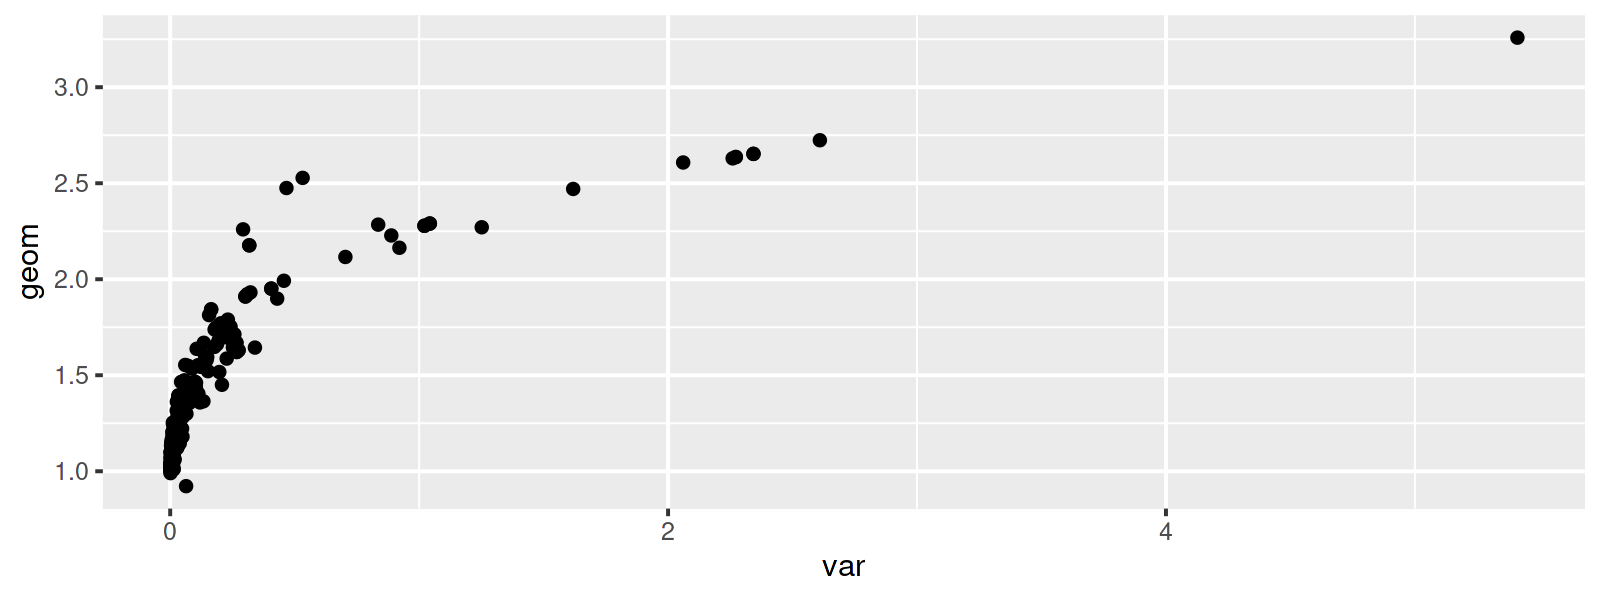

In [10]:
options(repr.plot.width=8,repr.plot.height=3,repr.plot.res = 200)

ggplot(df_summary,aes(x=var,y=geom))+geom_point()

Warning message:
“Removed 25378 row(s) containing missing values (geom_path).”


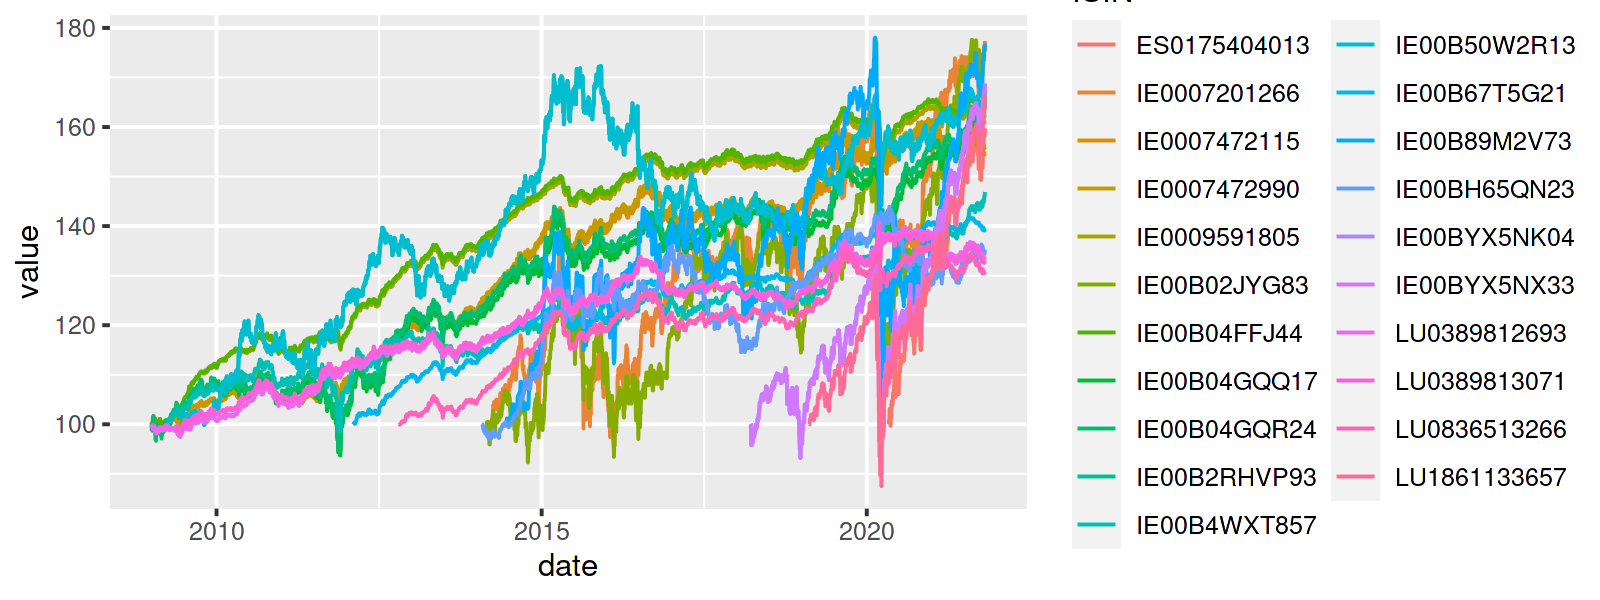

In [11]:
high_profit<-df_summary %>% filter(var<0.04) %>% filter(geom>1.2)
plot_funds(df_roi,funds=rownames(high_profit))

Warning message:
“Removed 6477 row(s) containing missing values (geom_path).”


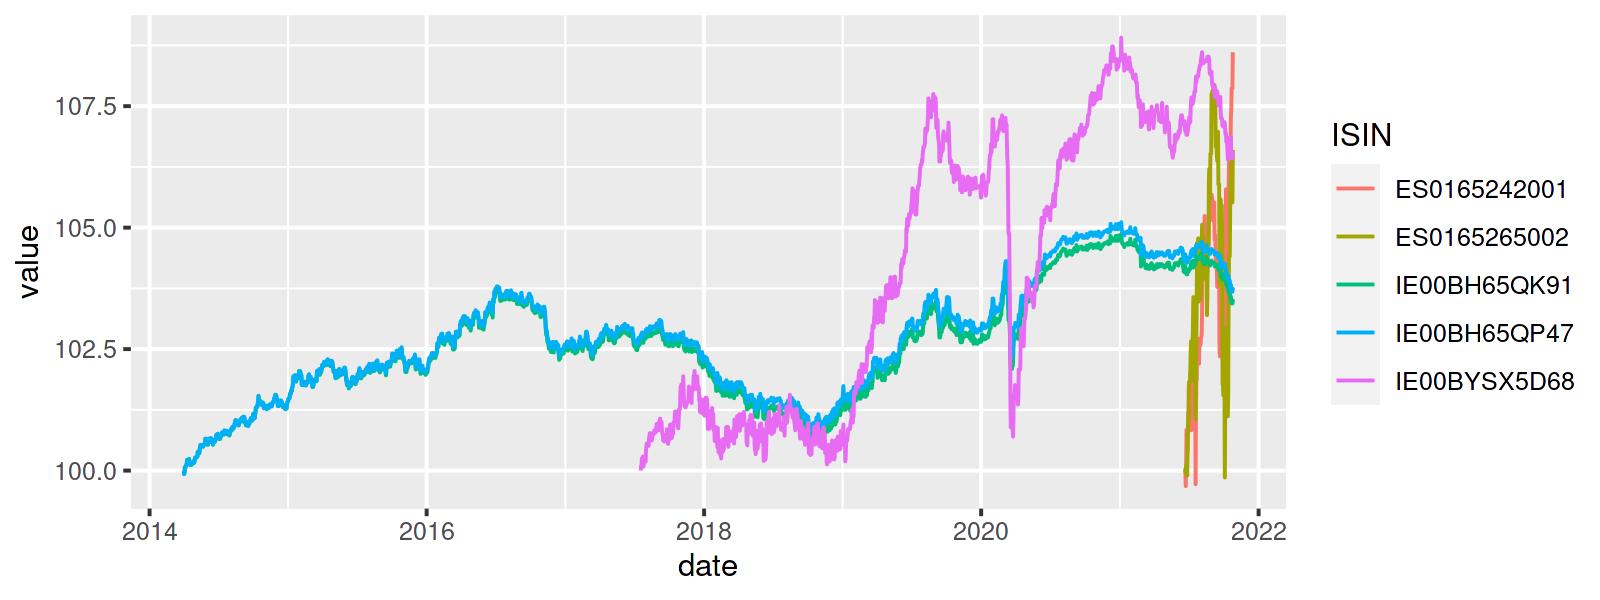

In [12]:
low_risk<-df_summary %>% filter(var<0.001) %>% filter(geom>1.02)
plot_funds(df_roi,funds=rownames(low_risk))

We can search for funds which have low perios ofs losses and high ROI:

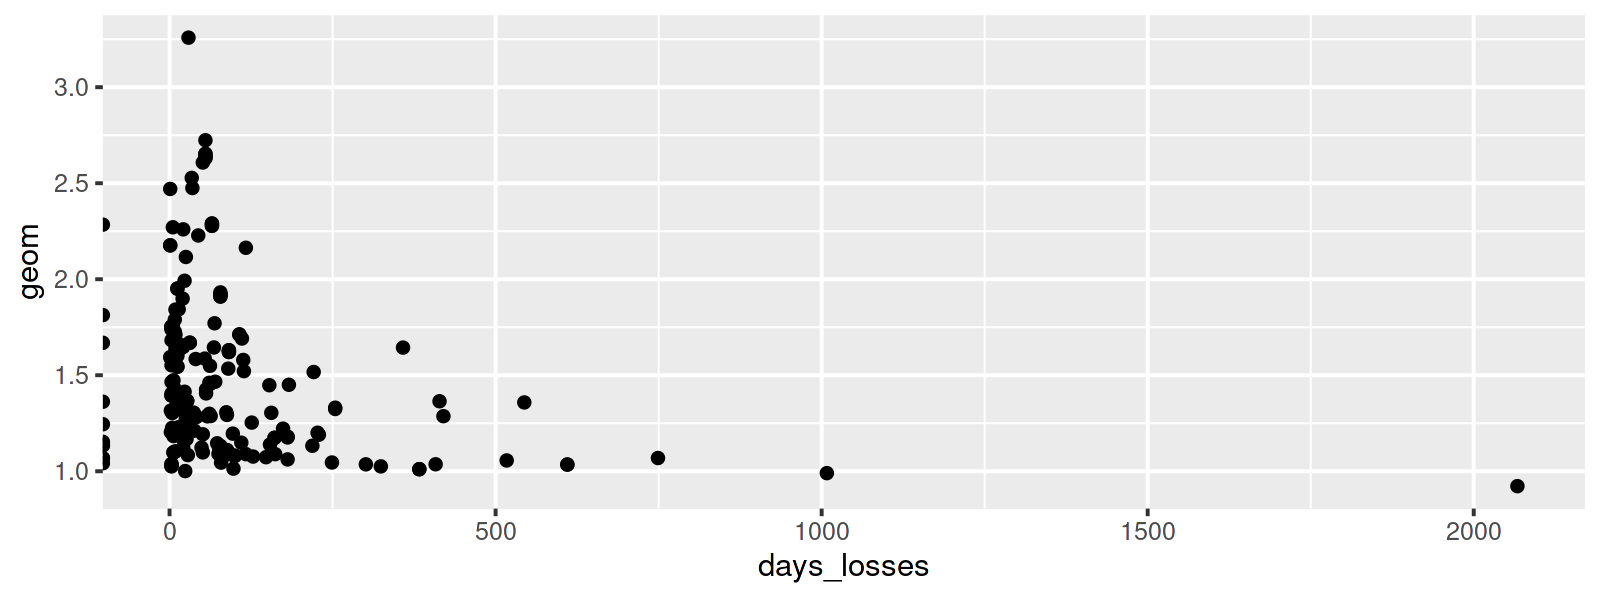

In [13]:
ggplot(df_summary,aes(x=days_losses,y=geom))+geom_point()

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<date>,<dbl>
ES0114105036,3.872119,3.258085,5.411797,2009-01-01,29
IE0002639668,3.014816,2.636196,2.271648,2009-01-01,55
IE0002639775,3.039871,2.652853,2.343095,2009-01-01,55
IE0032126645,3.039773,2.652785,2.342864,2009-01-01,55
IE0032620787,3.015269,2.636596,2.272313,2009-01-01,55
IE00B1W56J03,3.140995,2.723832,2.609763,2009-01-01,55
LU0389812347,2.954833,2.607947,2.060615,2009-01-01,51
LU0996177720,3.006615,2.629435,2.259423,2009-01-01,55


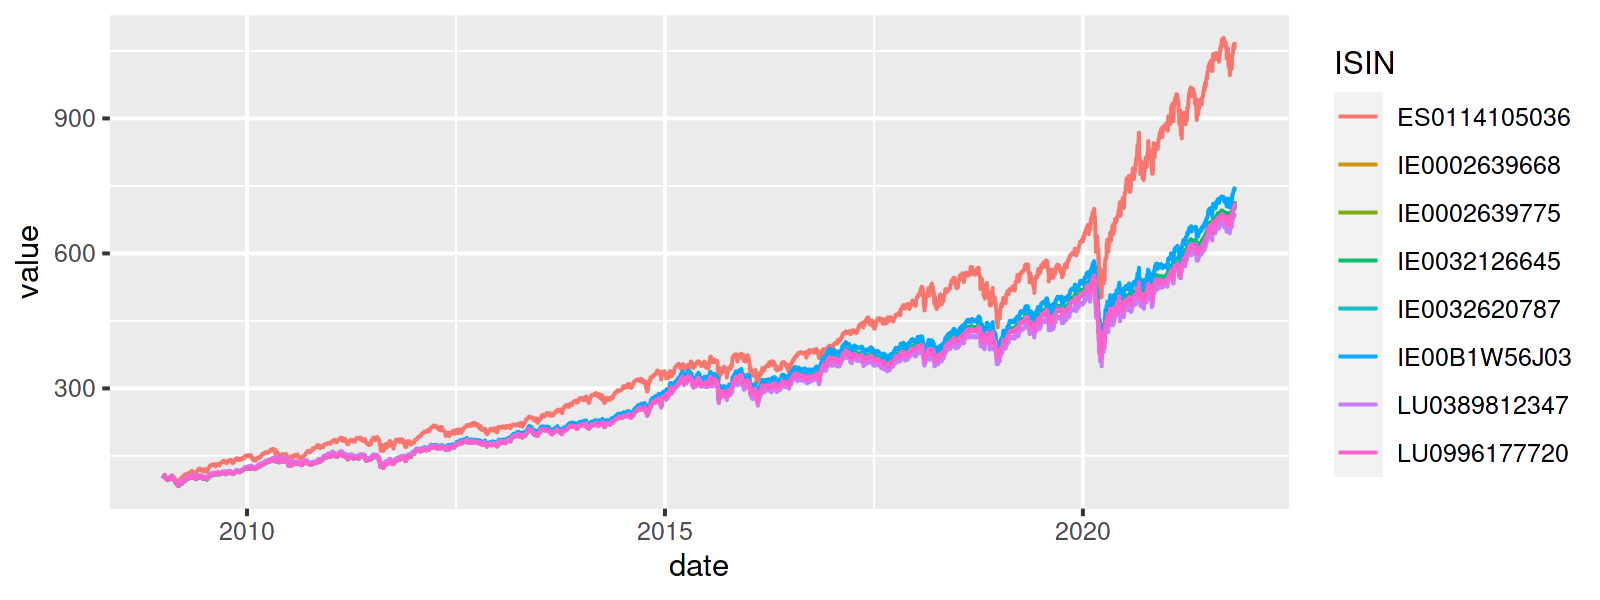

In [14]:
low_losses<-df_summary %>% filter(days_losses<100) %>% filter(geom>2.6)
low_losses
plot_funds(df_roi,funds=rownames(low_losses))

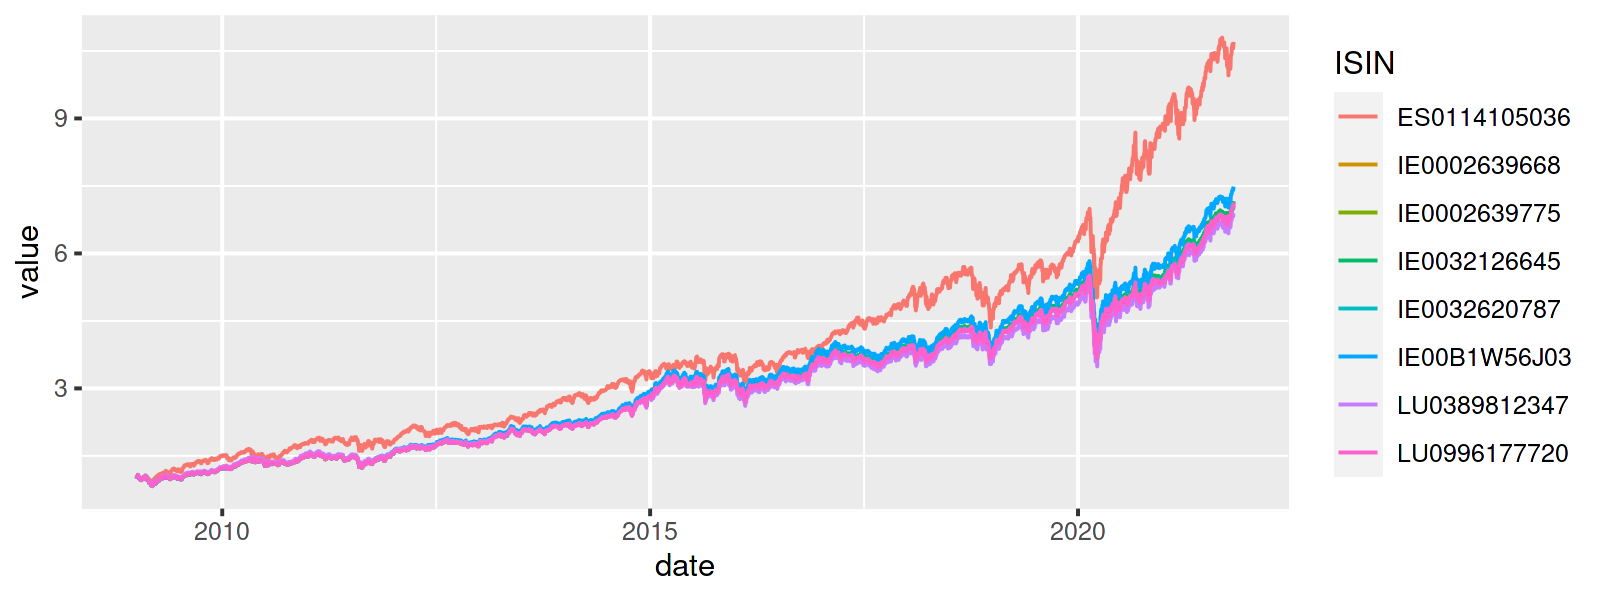

In [15]:
source('../src/R/rfunds.R')
plot_funds(df_values,funds=rownames(low_losses),start_date=max(low_losses$mindate))

We are going to look into the complete set of funds which have been working since 2016 and try to get the better combination of high ROI with low variance:

In [19]:
portfolio<- rownames(df_summary)[df_summary$mindate<'2016-01-01']
portfolio

[1] "ES0110182039" "ES0114105036" "IE0002639551" "IE0002639668" "IE0002639775"
  [6] "IE0007201266" "IE0007218849" "IE0007281425" "IE0007286036" "IE0007292083"
 [11] "IE0007292422" "IE0007471695" "IE0007471927" "IE0007472115" "IE0007472990"
 [16] "IE0007987690" "IE0007987708" "IE0008248795" "IE0008248803" "IE0009591805"
 [21] "IE0031786142" "IE0031786696" "IE0031787223" "IE0032125126" "IE0032126645"
 [26] "IE0032620787" "IE0033862917" "IE00B02JYG83" "IE00B03HCZ61" "IE00B03HD084"
 [31] "IE00B03HD191" "IE00B03HD209" "IE00B04FFJ44" "IE00B04GQQ17" "IE00B04GQR24"
 [36] "IE00B04GQT48" "IE00B04GQX83" "IE00B18GC888" "IE00B18GCB14" "IE00B1G3DH73"
 [41] "IE00B1S74Q32" "IE00B1S74W91" "IE00B1S75374" "IE00B1S75820" "IE00B1W56J03"
 [46] "IE00B1W56M32" "IE00B1W56S93" "IE00B246KL88" "IE00B2RHVP93" "IE00B2RHVR18"
 [51] "IE00B3B2KS38" "IE00B3D07F16" "IE00B3D07G23" "IE00B3X1LS57" "IE00B42LF923"
 [56] "IE00B42W3S00" "IE00B42W4L06" "IE00B4K9F548" "IE00B4WXT857" "IE00B4XCK338"
 [61] "IE00B4Z8LP80" "IE00B505V954" "IE00B50MZ948" "IE00B50W2R13" "IE00B51KVT96"
 [66] "IE00B51KW525" "IE00B523L081" "IE00B523L313" "IE00B526YN16" "IE00B5456744"
 [71] "IE00B56H2V49" "IE00B62C5H76" "IE00B67T5G21" "IE00B6RVWW34" "IE00B76VTL96"
 [76] "IE00B76VTM04" "IE00B76VTN11" "IE00B76VTR58" "IE00B83YJG36" "IE00B89M2V73"
 [81] "IE00B95W7137" "IE00B9M1BB17" "IE00BFRTD722" "IE00BFRTDB69" "IE00BFRTDC76"
 [86] "IE00BGCZ0826" "IE00BH65QG55" "IE00BH65QH62" "IE00BH65QK91" "IE00BH65QN23"
 [91] "IE00BH65QP47" "IE00BH65QQ53" "LU0148539108" "LU0261952682" "LU0389810994"
 [96] "LU0389811372" "LU0389811455" "LU0389811539" "LU0389811885" "LU0389811968"
[101] "LU0389812347" "LU0389812420" "LU0389812693" "LU0389812933" "LU0389813071"
[106] "LU0390717543" "LU0390718277" "LU0442407853" "LU0474966248" "LU0474966750"
[111] "LU0474966834" "LU0474967055" "LU0474967998" "LU0474968020" "LU0625737910"
[116] "LU0836512615" "LU0836512706" "LU0836512888" "LU0836512961" "LU0836513001"
[121] "LU0836513183" "LU0836513266" "LU0836513423" "LU0836513696" "LU0836513852"
[126] "LU0996175948" "LU0996176912" "LU0996177134" "LU0996177217" "LU0996177720"
[131] "LU0996178371" "LU0996178884" "LU0996178967" "LU0996179007" "LU0996179189"
[136] "LU0996180864" "LU0996180948" "LU0996181599" "LU0996182308" "LU0996182563"
[141] "LU0996182647" "LU1050469367" "LU1050469441" "LU1050469870" "LU1050470373"
[146] "LU1050470456" "LU1328852659" "LU1883867761"

In [24]:
coefs <- calc_optim(na.omit(df_roi[,portfolio]), variance_importance=10)


Iter: 1 fn: 0     	 Pars:  0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 0.006757 

This is the optimul ratio of coefficients for each fund:

In [25]:
coefs

named numeric(0)

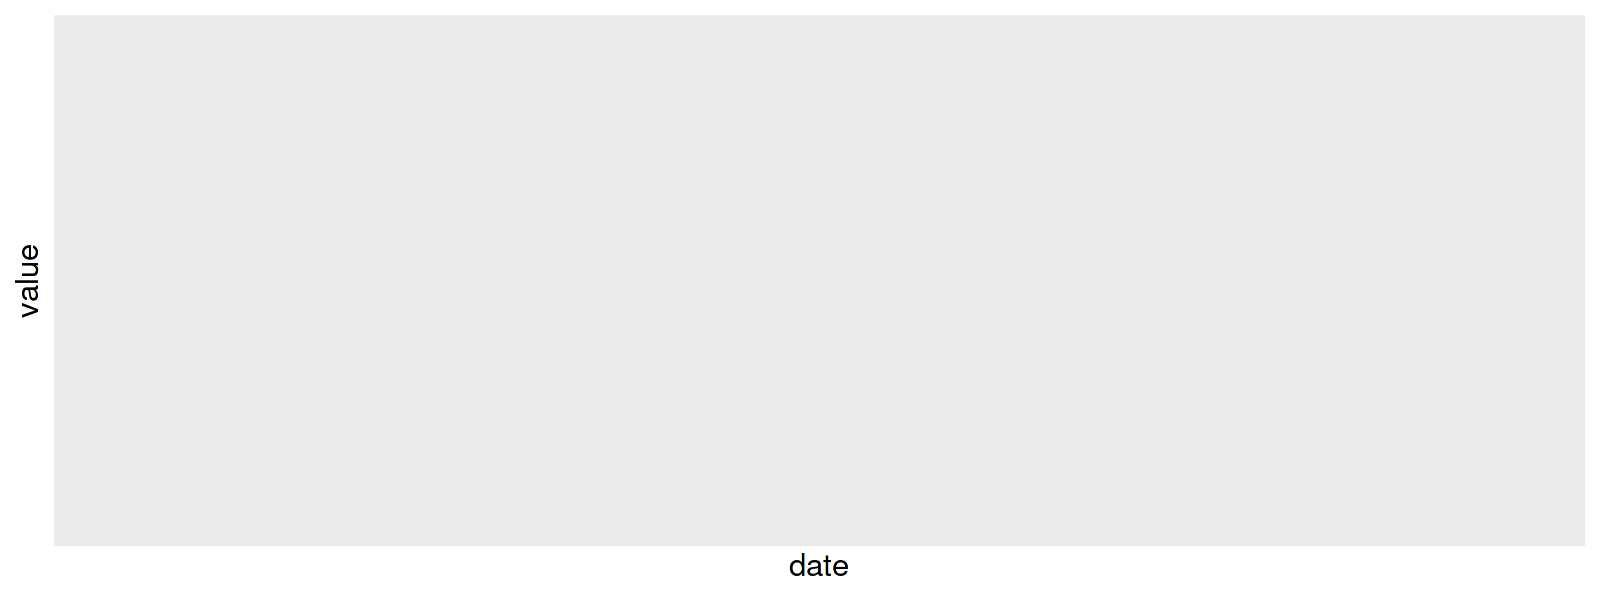

In [22]:
df_sim<-simulate_investment(df_values[,c("date",portfolio)],coefs)
plot_funds(df_sim,start_date = min(df_sim$date))

As show bellow our combined fund would have a APR of 7%. 
And would have been under 47 days of consecutive losses over a year.

In [17]:
calc_summary(df_sim,num_days = 365)

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.0712842,1.0703298,0.0020742329,2015-09-02,47
ES0114105036,1.1808029,1.1742622,0.0153966564,2015-09-02,49
ES0158967036,0.9994786,0.9880188,0.0231356390,2015-09-02,352
IE00B4XCK338,1.0171884,1.0167471,0.0008999990,2015-09-02,212
IE00BH65QK91,1.0024296,1.0023569,0.0001458798,2015-09-02,427


We could remove the fund ES0158967036 which performed quite pooly but in doing so we will slighly increase or variance:

In [18]:
coefs<-coefs[c("ES0114105036","IE00B4XCK338","IE00BH65QK91")]
coefs<-coefs/sum(coefs)

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.073795,1.072789,0.0022034243,2015-09-02,34
ES0114105036,1.180803,1.174262,0.0153966564,2015-09-02,49
IE00B4XCK338,1.017188,1.016747,0.0008999990,2015-09-02,212
IE00BH65QK91,1.002430,1.002357,0.0001458798,2015-09-02,427


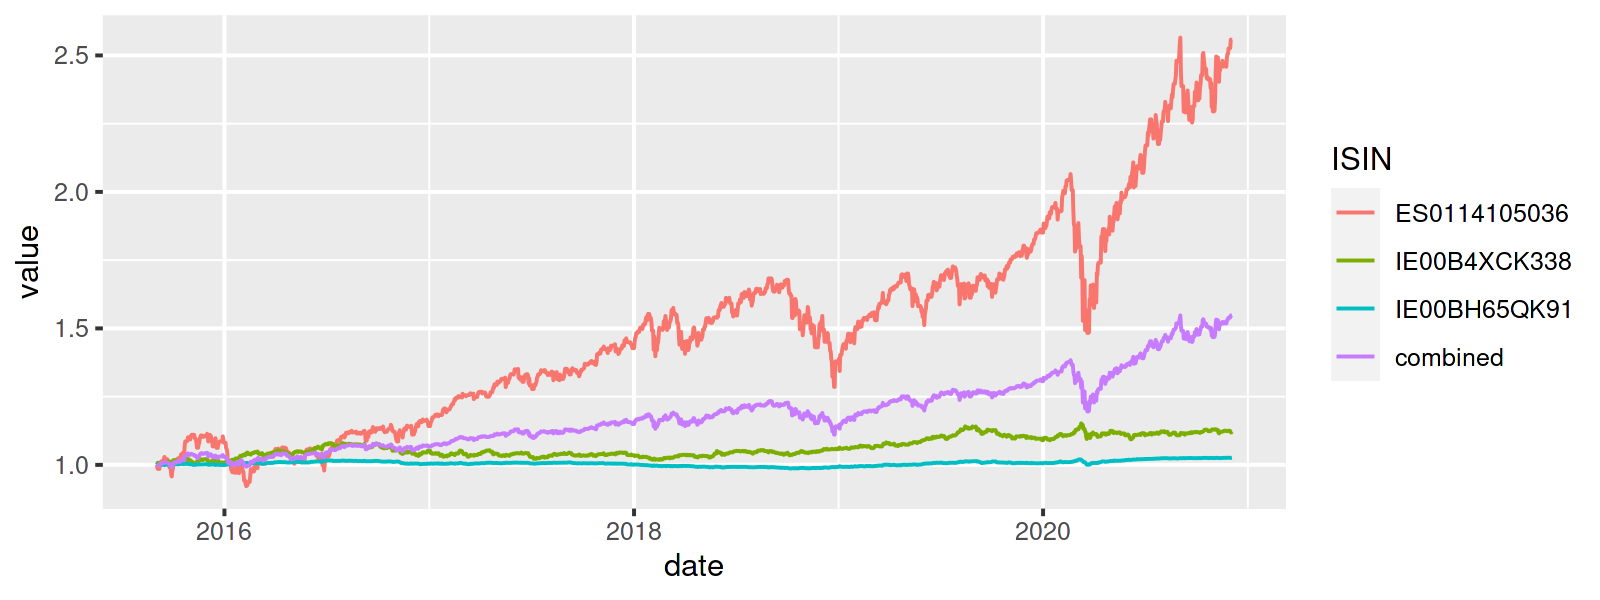

In [19]:
df_sim<-simulate_investment(df_values[,c("date",portfolio)],coefs)
plot_funds(df_sim,start_date = min(df_sim$date))
calc_summary(df_sim,num_days = 365)